In [1]:
state = 'IA' 
year = 2020
objective_types = ['cut_edges', 'perimeter', 'inverse_Polsby_Popper', 'average_Polsby_Popper', 'bottleneck_Polsby_Popper']
starting_deviation = 0.01 

In [2]:
import sys, os
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

In [3]:
filepath = '../../dat/' + str(year) + '/'
filename = state + '_county.json'
filename2 = state + '_county.shp'

In [4]:
from read import read_graph_from_json

G = read_graph_from_json(state, filepath + filename, year=year)
print(f"The state of {state} has {G._k} districts.")
G._ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

The state of IA has 4 districts.


In [5]:
#import warm starts
sys.path.append(os.path.abspath('../heuristic'))
from IA_plans_2020 import plans
print(f"Loaded {len(plans)} plans from file.")
warm_starts = plans

Loaded 53044 plans from file.


In [6]:
from epsilon_constraint import epsilon_constraint_method
from pareto import filter_and_sort_pareto
from metrics import scores

plans_dict = {}
for obj_type in objective_types:
    
    print(f"\n{'#' * 100}")
    print(f"Applying epsilon-constraint method for {state} with compactness objective {obj_type}")
    print(f"{'#' * 100}\n")
    
    plans_scores = [scores(G, plan, G._ideal_population, obj_type) for plan in warm_starts]
    _,_,nondominated_warm_starts_plans = filter_and_sort_pareto(plans=warm_starts, upper_bounds=plans_scores, obj_type=obj_type)
    print(f"Passing {len(nondominated_warm_starts_plans)} nondominated warm start plans")
    
    (new_plans, obj_bounds, deviations) = epsilon_constraint_method(
                G,                 
                obj_type,          
                contiguity ='lcut',                                             # {'lcut', 'scf', 'shir'} 
                cutoff=None,       
                verbose=True,
                warm_start_mode ='user',                                        # {'None', 'user', 'refinement'}
                warm_starts=nondominated_warm_starts_plans,                     # if you have user define warm starts else it is None
                starting_deviation=starting_deviation, 
                time_limit=7200, 
                sizes=None,      
                max_B=True,                                                      # If symmetry_breaking is 'orbitope' or you have warm_start, max_B should be True   
                symmetry_breaking='orbitope',                                    # {None, 'orbitope', 'rsum'} 
                state=state,
                year=year
            )
    plans_dict[(state, obj_type)] = list(zip(new_plans, obj_bounds, deviations))
    warm_starts += new_plans


####################################################################################################
Applying epsilon-constraint method for IA with compactness objective cut_edges
####################################################################################################

Passing 18 nondominated warm start plans
Initially, L = 789617 and U = 805568 and k = 4.

****************************************
Trying deviation = 7975.922500000001
****************************************
Using user-provided warm starts.
Selected warm_start = [[4, 6, 8, 10, 16, 17, 49, 93], [5, 7, 11, 13, 15, 29, 34, 36, 45, 50, 51, 56, 69, 74, 75, 77, 80, 82, 85, 87, 88, 90], [3, 12, 18, 24, 25, 26, 28, 38, 39, 44, 46, 47, 54, 61, 67, 72, 83, 86, 94, 95, 96, 97, 98], [0, 1, 2, 9, 14, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 37, 40, 41, 42, 43, 48, 52, 53, 55, 57, 58, 59, 60, 62, 63, 64, 65, 66, 68, 70, 71, 73, 76, 78, 79, 81, 84, 89, 91, 92]]
Objective value: 32
Deviation: 4089.75

******************

     0     0   11.90030    0  497   33.00000   11.90030  63.9%     -    1s
     0     0   11.90368    0  513   33.00000   11.90368  63.9%     -    1s
     0     0   11.90864    0  507   33.00000   11.90864  63.9%     -    1s
     0     0   11.90909    0  518   33.00000   11.90909  63.9%     -    1s
     0     0   11.90909    0  519   33.00000   11.90909  63.9%     -    1s
     0     0   11.92209    0  519   33.00000   11.92209  63.9%     -    1s
     0     0   11.92522    0  519   33.00000   11.92522  63.9%     -    1s
     0     0   11.92600    0  516   33.00000   11.92600  63.9%     -    1s
     0     0   11.92608    0  519   33.00000   11.92608  63.9%     -    1s
     0     0   11.92699    0  522   33.00000   11.92699  63.9%     -    1s
     0     0   11.93145    0  522   33.00000   11.93145  63.8%     -    1s
     0     2   11.94271    0  518   33.00000   11.94271  63.8%     -    1s
   379   335   30.15925   20  570   33.00000   15.85161  52.0%   288    5s
   985   587   27.66774  

 53493  8699 infeasible   31        35.00000   29.74462  15.0%   171  132s
 56033  8812   31.73367   25  336   35.00000   29.94968  14.4%   170  137s
 58714  8831 infeasible   31        35.00000   30.04624  14.2%   169  142s
 58914  8919 infeasible   30        35.00000   30.06439  14.1%   169  146s
 60503  9078   33.14020   26  450   35.00000   30.09819  14.0%   168  151s
 63415  9403 infeasible   21        35.00000   30.26701  13.5%   167  156s
 66546  9489   31.02586   25  297   35.00000   30.47784  12.9%   165  161s
 71454  9456   32.74382   30  368   35.00000   30.69606  12.3%   163  168s
 73241  9416 infeasible   29        35.00000   30.78033  12.1%   162  171s
 77511  9326   33.27673   38  214   35.00000   30.95735  11.6%   161  178s
 80636  9276     cutoff   24        35.00000   31.07168  11.2%   160  181s
 84684  9075 infeasible   32        35.00000   31.25834  10.7%   159  187s
 86803  8874 infeasible   42        35.00000   31.32289  10.5%   158  190s
 91027  8521   31.64537  

 66426 11333   33.73497   30  484   36.00000   30.93381  14.1%   207  171s
 69697 11615 infeasible   29        36.00000   31.07003  13.7%   205  176s
 72944 11712   33.69360   43  443   36.00000   31.21628  13.3%   203  181s
 75772 11850   34.52522   27  499   36.00000   31.33440  13.0%   202  186s
 79128 12040     cutoff   32        36.00000   31.46859  12.6%   200  191s
 82808 12388     cutoff   34        36.00000   31.59413  12.2%   197  197s
 86620 12470     cutoff   30        36.00000   31.73760  11.8%   195  202s
 90076 12616     cutoff   44        36.00000   31.85148  11.5%   193  208s
 93706 13002   33.94227   33  504   36.00000   31.96264  11.2%   191  213s
 97586 13080     cutoff   36        36.00000   32.07582  10.9%   188  218s
 101018 13241 infeasible   54        36.00000   32.15836  10.7%   187  224s
 104965 13335     cutoff   31        36.00000   32.27844  10.3%   184  230s
 108915 13328   33.54917   39  293   36.00000   32.38396  10.0%   182  236s
 115146 13288 infeasib

 63762 17964 infeasible   31        37.00000   29.45240  20.4%   167  159s
 64317 18318 infeasible   31        37.00000   29.47065  20.3%   168  163s
 66512 18805   34.38997   34  423   37.00000   29.51851  20.2%   167  168s
 69068 19243   32.86046   27  339   37.00000   29.64810  19.9%   167  173s
 71587 19614   35.36774   27  453   37.00000   29.73200  19.6%   167  177s
 73951 20025   34.03840   28  481   37.00000   29.81701  19.4%   166  181s
 76386 20359   35.38319   33  400   37.00000   29.90353  19.2%   166  186s
 78861 20674     cutoff   29        37.00000   29.97695  19.0%   166  190s
 81293 21020     cutoff   39        37.00000   30.03523  18.8%   166  195s
 86562 21809   33.64665   28  449   37.00000   30.17992  18.4%   164  203s
 88916 22166   31.87837   29  358   37.00000   30.24074  18.3%   164  208s
 91432 22387   33.61193   48  141   37.00000   30.30451  18.1%   164  212s
 93669 22688   34.59183   40  144   37.00000   30.35348  18.0%   164  216s
 96019 23006   32.99227  

 400679 41583 infeasible   31        37.00000   33.83115  8.56%   128  706s
 404785 41396 infeasible   53        37.00000   33.85674  8.50%   127  712s
 406794 41012     cutoff   32        37.00000   33.86043  8.49%   127  717s
 409052 40765 infeasible   55        37.00000   33.88023  8.43%   127  721s
 413737 40519     cutoff   43        37.00000   33.91380  8.34%   126  727s
 416045 40334     cutoff   41        37.00000   33.92882  8.30%   126  731s
 420462 39950   34.60070   57  179   37.00000   33.95318  8.23%   126  737s
 422584 39758     cutoff   47        37.00000   33.96760  8.20%   126  740s
 426641 39614     cutoff   50        37.00000   33.99315  8.13%   125  745s
 430735 39390   35.79034   35  491   37.00000   34.01206  8.08%   125  751s
 434714 39057   34.49122   46  203   37.00000   34.03282  8.02%   124  757s
 436785 38860   34.46013   62  106   37.00000   34.04301  7.99%   124  760s
 440961 38472 infeasible   43        37.00000   34.06486  7.93%   124  765s
 445204 3801

  9702  4230   29.77299   27  544   38.00000   22.93901  39.6%   191   40s
 11686  5363   34.55830   35  330   38.00000   23.76272  37.5%   188   45s
 13146  6090   34.48825   44  356   38.00000   24.09766  36.6%   188   50s
 15317  7113   35.54177   27  539   38.00000   24.54945  35.4%   186   55s
 17737  8005   34.30989   32  221   38.00000   25.20767  33.7%   187   61s
 20109  8913   31.08528   29  530   38.00000   25.47748  33.0%   186   66s
 21761  9460     cutoff   34        38.00000   25.72919  32.3%   186   70s
 24426 10613   32.65966   30  528   38.00000   26.15644  31.2%   186   76s
 26705 11330   29.78451   26  530   38.00000   26.41345  30.5%   185   81s
 29058 12006   30.55611   36  316   38.00000   26.70989  29.7%   186   86s
 31176 12941 infeasible   32        38.00000   26.93461  29.1%   186   92s
 32617 13477   34.41617   43  289   38.00000   27.11770  28.6%   186   95s
 35595 14248     cutoff   26        38.00000   27.37547  28.0%   185  102s
 37118 14737   34.92810  

 310384 75253   34.95065   42  335   37.00000   32.89507  11.1%   141  588s
 313659 75592   34.88337   45  252   37.00000   32.92055  11.0%   141  594s
 316733 75879   33.80649   40  164   37.00000   32.94847  11.0%   141  599s
 319597 76337   35.32479   41  135   37.00000   32.97198  10.9%   140  605s
 323073 76836   33.41136   53  227   37.00000   32.99802  10.8%   140  610s
 326506 77436   34.63165   31  501   37.00000   33.01475  10.8%   139  616s
 330112 77895     cutoff   73        37.00000   33.03789  10.7%   139  622s
 333638 78553   33.90614   38  205   37.00000   33.06232  10.6%   138  628s
 337285 78898   35.04056   39  295   37.00000   33.08585  10.6%   138  634s
 340599 79079   34.68368   37  212   37.00000   33.11216  10.5%   138  639s
 343628 79542   34.49087   31  429   37.00000   33.13279  10.5%   137  644s
 346716 79542   35.85466   29  260   37.00000   33.13798  10.4%   137  645s
 347036 79853   34.83118   34  411   37.00000   33.15302  10.4%   137  650s
 350362 8030

 666449 21802 infeasible   50        37.00000   35.03591  5.31%   114 1146s
 670791 18302 infeasible   74        37.00000   35.13460  5.04%   114 1151s
 675059 14335     cutoff   37        37.00000   35.24642  4.74%   114 1156s
 679731  9878     cutoff   43        37.00000   35.37847  4.38%   113 1161s
 685057  3983 infeasible   49        37.00000   35.55442  3.91%   113 1166s
 692305     0     cutoff   63        37.00000   35.91552  2.93%   112 1170s

Cutting planes:
  Lazy constraints: 5

Explored 692367 nodes (77685598 simplex iterations) in 1171.03 seconds (645.70 work units)
Thread count was 20 (of 20 available processors)

Solution count 2: 37 38 

Optimal solution found (tolerance 1.00e-07)
Best objective 3.700000000000e+01, best bound 3.700000000000e+01, gap 0.0000%

User-callback calls 1420270, time in user-callback 4.18 sec

****************************************
Optimal solution found! Gurobi status: 2
****************************************
plan = [[4, 8, 16, 17, 18, 49,

 100017 34748   33.43045   30  569   39.00000   30.42737  22.0%   163  226s
 102167 35509 infeasible   34        39.00000   30.45995  21.9%   163  230s
 104766 36196   34.83283   34  387   39.00000   30.51480  21.8%   163  235s
 109574 37316   36.65586   33  544   39.00000   30.63068  21.5%   163  243s
 111949 38149   36.22146   38  197   39.00000   30.65820  21.4%   162  248s
 114588 38794   33.62215   27  390   39.00000   30.72517  21.2%   162  252s
 116985 39359   36.00762   29  482   39.00000   30.78697  21.1%   162  257s
 119556 39941   33.67943   26  539   39.00000   30.84410  20.9%   161  261s
 121953 40610   36.44815   35  248   39.00000   30.89220  20.8%   161  265s
 124492 41258     cutoff   31        39.00000   30.93605  20.7%   161  270s
 129520 42462   36.98918   33  345   39.00000   31.02577  20.4%   161  278s
 131844 43004   34.65869   31  435   39.00000   31.06765  20.3%   161  282s
 134251 43367 infeasible   37        39.00000   31.10155  20.3%   160  287s
 136217 4411

 418696 121018   34.57132   59  196   39.00000   33.14778  15.0%   136  766s
 421863 121908   35.99930   35  389   39.00000   33.15993  15.0%   136  772s
 424962 122771   36.13255   47  187   39.00000   33.16984  14.9%   135  776s
 427953 123591 infeasible   42        39.00000   33.18099  14.9%   135  781s
 430754 124381 infeasible   49        39.00000   33.18939  14.9%   135  786s
 433666 125403   35.18534   33  268   39.00000   33.19579  14.9%   135  791s
 436870 126207 infeasible   39        39.00000   33.20882  14.8%   135  796s
 439695 127256   33.75139   44  299   39.00000   33.22038  14.8%   134  801s
 442788 127942   34.71145   30  322   39.00000   33.22821  14.8%   134  806s
 445437 128571 infeasible   33        39.00000   33.23833  14.8%   134  811s
 447722 129591   34.51000   43  255   39.00000   33.24647  14.8%   134  816s
 450804 130331     cutoff   34        39.00000   33.25527  14.7%   134  820s
 453695 131136     cutoff   35        39.00000   33.26430  14.7%   134  825s

 737921 213337   35.97481   56  257   39.00000   33.91234  13.0%   119 1348s
 741012 214126   36.95402   51  153   39.00000   33.91773  13.0%   119 1354s
 744045 214962   34.80984   56  313   39.00000   33.92456  13.0%   119 1360s
 747178 215647   37.78584   35  146   39.00000   33.92995  13.0%   119 1365s
 750111 216495     cutoff   69        39.00000   33.93776  13.0%   119 1371s
 753289 217255   35.57436   64  224   39.00000   33.94470  13.0%   119 1377s
 756180 218170   36.35539   46  233   39.00000   33.94972  12.9%   118 1382s
 759286 218996   36.69801   46  156   39.00000   33.95560  12.9%   118 1388s
 762170 219767   35.92135   55  185   39.00000   33.96099  12.9%   118 1393s
 765241 220371   37.28726   37  489   39.00000   33.96640  12.9%   118 1398s
 767220 221159   37.22766   43  113   39.00000   33.97025  12.9%   118 1404s
 770312 221581   35.24043   59  127   39.00000   33.97582  12.9%   118 1409s
 771893 222413   36.19906   58  101   39.00000   33.97660  12.9%   118 1414s

 1057713 301162   36.16780   74   69   39.00000   34.33032  12.0%   110 1991s
 1060641 302032   34.52606   40  394   39.00000   34.33391  12.0%   110 1998s
 1063717 302795   35.54835   48  141   39.00000   34.33751  12.0%   110 2004s
 1066706 303705   35.62725   74  271   39.00000   34.34061  11.9%   110 2011s
 1069902 304656   36.88566   63  129   39.00000   34.34406  11.9%   109 2018s
 1073171 305249   35.54886   42  188   39.00000   34.34660  11.9%   109 2024s
 1075986 306018   34.97596   50  258   39.00000   34.35025  11.9%   109 2031s
 1079211 306745   36.30208   44  170   39.00000   34.35392  11.9%   109 2037s
 1082259 307481   35.72568   66  234   39.00000   34.35742  11.9%   109 2043s
 1085253 308066 infeasible   40        39.00000   34.36050  11.9%   109 2049s
 1087971 308831   35.40728   48  292   39.00000   34.36328  11.9%   109 2055s
 1090956 309554 infeasible   36        39.00000   34.36586  11.9%   109 2062s
 1094109 310331 infeasible   57        39.00000   34.37048  11.9

 1366658 374518   36.37602   36  335   39.00000   34.62532  11.2%   104 2698s
 1369650 375098   36.71407   29  557   39.00000   34.62799  11.2%   104 2705s
 1372657 375747   34.66139   51  358   39.00000   34.63070  11.2%   104 2712s
 1375549 376490   36.43908   50  289   39.00000   34.63256  11.2%   104 2720s
 1378668 377060   36.71368   35  157   39.00000   34.63561  11.2%   104 2727s
 1381666 377772   36.18726   63   86   39.00000   34.63838  11.2%   104 2734s
 1382821 377772   37.10293   30  280   39.00000   34.63838  11.2%   104 2735s
 1384869 378387 infeasible   94        39.00000   34.64121  11.2%   104 2742s
 1387873 379194   35.02959   48  151   39.00000   34.64389  11.2%   104 2749s
 1390989 379904   36.25127   56  125   39.00000   34.64562  11.2%   104 2757s
 1394121 380560     cutoff   56        39.00000   34.64823  11.2%   103 2765s
 1397190 381106 infeasible   41        39.00000   34.65082  11.2%   103 2771s
 1399523 381847     cutoff   39        39.00000   34.65257  11.1

 1668038 438981     cutoff   44        39.00000   34.86319  10.6%   100 3477s
 1671177 439750   35.69617   53  153   39.00000   34.86533  10.6%   100 3485s
 1674340 440285   36.26835   38  387   39.00000   34.86764  10.6%  99.5 3493s
 1677320 440840 infeasible   46        39.00000   34.86892  10.6%  99.4 3501s
 1680202 441413     cutoff   32        39.00000   34.87182  10.6%  99.4 3508s
 1682641 442127 infeasible  107        39.00000   34.87322  10.6%  99.4 3517s
 1685799 442872   37.04806   39  222   39.00000   34.87553  10.6%  99.3 3525s
 1688873 443403   37.71968   33  456   39.00000   34.87796  10.6%  99.3 3533s
 1691903 444023   34.98062   33  161   39.00000   34.88037  10.6%  99.3 3542s
 1694963 444683   36.36603   40  254   39.00000   34.88296  10.6%  99.2 3550s
 1698142 445225     cutoff   76        39.00000   34.88486  10.6%  99.2 3558s
 1701192 445890     cutoff   32        39.00000   34.88731  10.5%  99.1 3566s
 1704287 446433   36.80553   48  225   39.00000   34.88952  10.5

 1974552 500015   35.39821   53  178   39.00000   35.05892  10.1%  95.9 4295s
 1977741 500618 infeasible   38        39.00000   35.06061  10.1%  95.9 4302s
 1980817 501406 infeasible   49        39.00000   35.06238  10.1%  95.9 4310s
 1984182 502035     cutoff   61        39.00000   35.06422  10.1%  95.8 4317s
 1987326 502661   36.02505   69   31   39.00000   35.06589  10.1%  95.8 4324s
 1990509 503257     cutoff   70        39.00000   35.06725  10.1%  95.8 4331s
 1993426 503580 infeasible   84        39.00000   35.06943  10.1%  95.7 4335s
 1994846 504201     cutoff   55        39.00000   35.07002  10.1%  95.7 4341s
 1997627 504559     cutoff   35        39.00000   35.07053  10.1%  95.7 4347s
 1999670 505203     cutoff   74        39.00000   35.07271  10.1%  95.7 4354s
 2002371 505203   35.74963   61  196   39.00000   35.07290  10.1%  95.6 4355s
 2002885 505784     cutoff   37        39.00000   35.07424  10.1%  95.6 4362s
 2005966 506295   35.37549   51  237   39.00000   35.07595  10.1

 2286632 552841     cutoff   71        39.00000   35.21868  9.70%  93.0 5048s
 2289890 553182   36.50083   66   53   39.00000   35.21988  9.69%  93.0 5055s
 2292851 553627     cutoff   68        39.00000   35.22177  9.69%  93.0 5063s
 2295880 554173   36.59388   44  113   39.00000   35.22314  9.68%  93.0 5071s
 2298863 554593   37.13882   48  137   39.00000   35.22448  9.68%  93.0 5079s
 2301895 554929   36.70032   61  134   39.00000   35.22591  9.68%  92.9 5086s
 2304939 555179     cutoff   62        39.00000   35.22772  9.67%  92.9 5094s
 2307740 555474     cutoff   48        39.00000   35.22883  9.67%  92.9 5101s
 2310811 555759   36.61113   53  143   39.00000   35.23063  9.67%  92.9 5108s
 2313623 556192     cutoff   47        39.00000   35.23176  9.66%  92.8 5116s
 2316610 556618   36.14648   48  134   39.00000   35.23356  9.66%  92.8 5124s
 2319568 556919   36.84832   66  158   39.00000   35.23520  9.65%  92.8 5130s
 2322289 557311 infeasible   49        39.00000   35.23667  9.65

 2588259 587393   36.12862   49  127   39.00000   35.36497  9.32%  91.1 5793s
 2589486 587582   36.83041   65  283   39.00000   35.36538  9.32%  91.0 5800s
 2592251 587828 infeasible   41        39.00000   35.36699  9.32%  91.0 5807s
 2595138 587968     cutoff   48        39.00000   35.36834  9.31%  91.0 5814s
 2597143 588124   37.11348   40  136   39.00000   35.36938  9.31%  91.0 5820s
 2599814 588364   36.29758   61  273   39.00000   35.37099  9.31%  91.0 5827s
 2602554 588622   36.27634   43  243   39.00000   35.37226  9.30%  91.0 5835s
 2605650 588981     cutoff   49        39.00000   35.37338  9.30%  91.0 5842s
 2608669 589430   36.89547   52   56   39.00000   35.37496  9.29%  90.9 5852s
 2612004 589709     cutoff   48        39.00000   35.37628  9.29%  90.9 5860s
 2615149 590108   37.04168   57   84   39.00000   35.37766  9.29%  90.9 5869s
 2618223 590476   37.16341   46  118   39.00000   35.37874  9.29%  90.9 5876s
 2621137 590802   36.41356   61  260   39.00000   35.38019  9.28

 2888725 611855   36.31953   48   36   39.00000   35.50001  8.97%  89.4 6539s
 2891753 611987 infeasible   57        39.00000   35.50125  8.97%  89.3 6543s
 2893704 612161     cutoff   40        39.00000   35.50230  8.97%  89.3 6550s
 2896632 612504   36.26786   71  217   39.00000   35.50333  8.97%  89.3 6558s
 2899792 612623   36.43505   45  260   39.00000   35.50445  8.96%  89.3 6565s
 2902852 612705     cutoff   52        39.00000   35.50608  8.96%  89.3 6572s
 2905712 612911   36.87296   75   48   39.00000   35.50697  8.96%  89.3 6580s
 2908729 613063     cutoff   53        39.00000   35.50848  8.95%  89.2 6588s
 2911663 613307   36.45054   46  297   39.00000   35.50963  8.95%  89.2 6594s
 2914624 613500   37.11013   46  211   39.00000   35.51069  8.95%  89.2 6602s
 2917657 613632   35.87668   62  319   39.00000   35.51210  8.94%  89.2 6609s
 2920720 613893   36.11676   62  148   39.00000   35.51335  8.94%  89.2 6617s
 2923716 613971   36.63682   35  157   39.00000   35.51457  8.94

Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 60
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  60
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 4751 rows, 4200 columns and 16291 nonzeros
Model fingerprint: 0x0324b128
Variable types: 1188 continuous, 3012 integer (3012 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]

 14631  8335   35.28664   29  520   43.00000   24.42245  43.2%   167   45s
 16907  9813   32.63550   26  541   43.00000   24.70013  42.6%   167   50s
 19792 11505   33.42355   28  587   43.00000   25.25878  41.3%   166   55s
 22337 12898   33.40004   29  389   43.00000   25.63483  40.4%   165   60s

Explored 23169 nodes (3812997 simplex iterations) in 60.14 seconds (50.93 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 43 

Time limit reached
Best objective 4.300000000000e+01, best bound 2.600000000000e+01, gap 39.5349%

User-callback calls 51294, time in user-callback 0.21 sec
Time limit reached! Best feasible solution found:

****************************************
No optimal solution found! Gurobi status: 9
****************************************
Time limit 60 reached. Subsequent deviations will use quick time limit 60.
plan = [[2, 8, 12, 21, 22, 41, 46, 48, 60, 68, 71, 76, 78, 86, 93, 94, 96], [6, 7, 11, 15, 29, 34, 45, 50, 51, 56, 61, 72, 75, 77, 

     0     0   11.14608    0  491   46.00000   11.14608  75.8%     -    0s
     0     0   11.77634    0  492   46.00000   11.77634  74.4%     -    0s
     0     0   11.89640    0  500   46.00000   11.89640  74.1%     -    0s
     0     0   11.90071    0  500   46.00000   11.90071  74.1%     -    1s
     0     0   11.90071    0  500   46.00000   11.90071  74.1%     -    1s
     0     0   11.90188    0  500   46.00000   11.90188  74.1%     -    1s
     0     0   12.06858    0  484   46.00000   12.06858  73.8%     -    1s
     0     0   12.11979    0  493   46.00000   12.11979  73.7%     -    1s
     0     0   12.11996    0  496   46.00000   12.11996  73.7%     -    1s
     0     0   12.21869    0  534   46.00000   12.21869  73.4%     -    1s
     0     0   12.24430    0  497   46.00000   12.24430  73.4%     -    1s
     0     0   12.24952    0  512   46.00000   12.24952  73.4%     -    2s
     0     0   12.25063    0  516   46.00000   12.25063  73.4%     -    2s
     0     0   12.25063  

Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 60
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  60
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 4751 rows, 4200 columns and 16291 nonzeros
Model fingerprint: 0x58717c29
Variable types: 1188 continuous, 3012 integer (3012 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]

  7007  4397   32.78567   26  572   52.00000   22.69881  56.3%   165   25s
  9409  6370   37.77250   34  416   52.00000   22.76274  56.2%   158   30s
 11945  8270   43.74633   31  489   52.00000   24.35333  53.2%   153   35s
 14648 10670   46.56028  125  192   52.00000   25.16502  51.6%   153   40s
 17999 13095   41.28337   37  325   52.00000   25.35408  51.2%   155   45s
 21684 16020   40.86630   31  486   52.00000   26.62869  48.8%   154   51s
 25152 19413   39.94284   43  378   52.00000   26.78607  48.5%   151   55s
 29125 22253   40.39032   29  135   52.00000   27.16128  47.8%   149   60s

Cutting planes:
  Gomory: 3
  Zero half: 12

Explored 30274 nodes (4455966 simplex iterations) in 60.15 seconds (47.03 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 52 

Time limit reached
Best objective 5.200000000000e+01, best bound 2.800000000000e+01, gap 46.1538%

User-callback calls 66879, time in user-callback 0.27 sec
Time limit reached! Best feasible solu

  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]

User MIP start produced solution with objective 55 (0.03s)
Loaded user MIP start with objective 55

Presolve removed 2229 rows and 1803 columns
Presolve time: 0.04s
Presolved: 2522 rows, 2397 columns, 9156 nonzeros
Variable types: 0 continuous, 2397 integer (2372 binary)

Root relaxation: objective 1.114621e+01, 2765 iterations, 0.13 seconds (0.11 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   11.14621    0  492   55.00000   11.14621  79.7%     -    0s
     0     0   11.72654    0  502   55.00000   11.72654  78.7%     -    0s
     0     0   11.82628    0  501   55.00000   11.82628  78.5%     -    0s
     0     0   11.82628    0  491   55.00000   11.82628  78.5%     -    0s
     0     0   12.24890    0  515   55.00000   12.24890  77.7%     -    0s
     0  

Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 60
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  60
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 4751 rows, 4200 columns and 16291 nonzeros
Model fingerprint: 0xbfa954d2
Variable types: 1188 continuous, 3012 integer (3012 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]


CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 4751 rows, 4200 columns and 16291 nonzeros
Model fingerprint: 0x2009cb59
Variable types: 1188 continuous, 3012 integer (3012 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+05]
  Objective range  [2e-02, 7e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]

User MIP start produced solution with objective 37.7211 (0.02s)
Loaded user MIP start with objective 37.7211

Presolve removed 2265 rows and 1826 columns
Presolve time: 0.05s
Presolved: 2486 rows, 2374 columns, 9054 nonzeros
Variable types: 0 continuous, 2374 integer (2360 binary)

Root relaxation: objective 2.541963e+01, 1370 iterations, 0.08 seconds (0.07 work units)

    Nodes    |    Current Node

     0     0   25.62610    0  487   37.89788   25.62610  32.4%     -    1s
     0     0   25.73693    0  488   37.89788   25.73693  32.1%     -    1s
     0     0   25.75819    0  493   37.89788   25.75819  32.0%     -    1s
     0     0   25.77297    0  493   37.89788   25.77297  32.0%     -    1s
     0     0   25.77330    0  493   37.89788   25.77330  32.0%     -    1s
     0     0   25.77966    0  496   37.89788   25.77966  32.0%     -    1s
     0     0   25.78600    0  499   37.89788   25.78600  32.0%     -    1s
     0     0   25.78642    0  500   37.89788   25.78642  32.0%     -    1s
     0     0   25.78642    0  501   37.89788   25.78642  32.0%     -    1s
     0     0   25.79131    0  502   37.89788   25.79131  31.9%     -    1s
     0     0   25.79131    0  503   37.89788   25.79131  31.9%     -    1s
     0     0   25.79131    0  500   37.89788   25.79131  31.9%     -    1s
     0     2   25.79902    0  499   37.89788   25.79902  31.9%     -    1s
   497   456   36.60531  

 18245  3986   35.86072   22  533   37.89788   33.59780  11.3%   214   75s
 20326  4270   36.99074   22  536   37.89788   33.96953  10.4%   211   80s
 22667  4530   37.64632   32  224   37.89788   34.24797  9.63%   208   85s
 25566  4735   36.43344   23  441   37.89788   34.53680  8.87%   206   91s
 27674  4855   37.88779   26  434   37.89788   34.70856  8.42%   205   96s
 30076  4937   37.40754   26  418   37.89788   34.87196  7.98%   203  101s
 32434  4995   37.09005   21  427   37.89788   35.05499  7.50%   201  106s
 34950  4989 infeasible   29        37.89788   35.22201  7.06%   200  112s
 37711  4954 infeasible   26        37.89788   35.38164  6.64%   198  117s
 40484  4827     cutoff   25        37.89788   35.55239  6.19%   197  122s
 41898  4723   37.11777   23  566   37.89788   35.61638  6.02%   196  125s
 44983  4390 infeasible   30        37.89788   35.79548  5.55%   195  132s
 46707  4185 infeasible   25        37.89788   35.90877  5.25%   195  135s
 50203  3585     cutoff  

Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 7200
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 4751 rows, 4200 columns and 16291 nonzeros
Model fingerprint: 0x320a60c7
Variable types: 1188 continuous, 3012 integer (3012 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+05]
  Objective range  [2e-02, 7e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e

     0     0   25.62560    0  492   38.47021   25.62560  33.4%     -    1s
     0     2   25.63130    0  492   38.47021   25.63130  33.4%     -    1s
   513   455   37.30451   17  597   38.47021   28.92503  24.8%   231    5s
  1473   835   34.28965   11  430   38.47021   31.60097  17.9%   220   10s
  2622  1150     cutoff   15        38.47021   32.53173  15.4%   225   15s
  3501  1339     cutoff   12        38.47021   33.07424  14.0%   238   20s
  4346  1474   36.10343   10  461   38.47021   33.37293  13.2%   241   25s
  5462  1573   37.56448   16  477   38.47021   33.62222  12.6%   246   30s
  6208  1635   35.19204   11  594   38.47021   33.89881  11.9%   254   35s
  6928  1889   36.45641   24  494   38.47021   34.05024  11.5%   256   40s
  8065  2119   34.05024   21  446   38.47021   34.05024  11.5%   243   45s
  9914  2373   37.64727   29  403   38.47021   34.05024  11.5%   225   50s
 11664  2451 infeasible   26        38.47021   34.05024  11.5%   213   55s
 13547  3145   38.41056  

 29683  6970     cutoff   30        38.90544   34.83912  10.5%   222   92s
 30902  7118 infeasible   34        38.90544   34.96757  10.1%   222   95s
 33403  7414     cutoff   29        38.90544   35.13300  9.70%   224  101s
 34569  7440   38.02351   27  534   38.90544   35.19915  9.53%   224  105s
 35163  7528   37.62503   28  424   38.90544   35.23555  9.43%   224  112s
 36046  7626   37.66536   29  372   38.90544   35.23766  9.43%   224  116s
 37059  7732   38.26149   30  381   38.90544   35.27048  9.34%   224  120s
 40028  8029   38.33553   24  415   38.90544   35.47023  8.83%   224  128s
 41916  8125   37.79660   25  461   38.90544   35.56272  8.59%   224  133s
 43844  8274   38.29141   31  486   38.90544   35.63894  8.40%   224  137s
 46012  8307   38.31829   28  575   38.90544   35.75147  8.11%   223  142s
 48085  8388     cutoff   31        38.90544   35.85472  7.84%   224  147s
 50327  8530   37.26524   24  354   38.90544   35.97486  7.53%   224  153s
 52684  8604   38.14351  

 41938 12996     cutoff   76        40.65369   35.38084  13.0%   183  122s
 43838 13410   38.82141   29  269   40.65369   35.48534  12.7%   183  126s
 45932 13979     cutoff   28        40.65369   35.58138  12.5%   183  131s
 48086 14524 infeasible   33        40.65369   35.68116  12.2%   182  135s
 50194 14810     cutoff   28        40.65369   35.75200  12.1%   183  140s
 52192 15362 infeasible   27        40.65369   35.81195  11.9%   183  145s
 54720 15841     cutoff   30        40.65369   35.88481  11.7%   182  150s
 57125 16263   39.86017   65  125   40.65369   35.96504  11.5%   182  155s
 59518 16555   40.33823   32  531   40.65369   36.03197  11.4%   182  160s
 61674 17245   40.16668   31  434   40.65369   36.08443  11.2%   182  165s
 64228 17818   37.19597   25  566   40.65369   36.17365  11.0%   182  170s
 66746 18417   39.14551   28  392   40.65369   36.24447  10.8%   181  175s
 69317 18936   37.15942   26  427   40.65369   36.31023  10.7%   180  180s
 71693 19316   39.09642  

 341148 56026 infeasible   35        40.65369   38.62433  4.99%   147  674s
 344300 56263     cutoff   39        40.65369   38.63738  4.96%   146  680s
 347390 56565   39.47773   43  142   40.65369   38.64582  4.94%   146  686s
 350561 56820   39.94588   28  485   40.65369   38.66020  4.90%   146  691s
 353574 57119 infeasible   31        40.65369   38.67067  4.88%   145  697s
 356771 57425   39.64913   29  532   40.65369   38.68304  4.85%   145  704s
 359958 57545     cutoff   27        40.65369   38.69518  4.82%   145  709s
 362754 57854   40.54051   27  164   40.65369   38.70504  4.79%   145  715s
 365966 58078 infeasible   40        40.65369   38.71693  4.76%   144  721s
 369081 58279   40.50005   31  352   40.65369   38.72767  4.74%   144  726s
 372172 58430   39.35206   47   97   40.65369   38.73852  4.71%   144  732s
 375352 58652     cutoff   29        40.65369   38.75137  4.68%   143  738s
 378589 59002   39.22456   34  240   40.65369   38.76582  4.64%   143  744s
 381833 5937

 657201 41754 infeasible   55        40.65369   39.61166  2.56%   125 1256s
 661083 40527   40.40187   30  184   40.65369   39.62783  2.52%   125 1262s
 663130 39867     cutoff   68        40.65369   39.63315  2.51%   125 1266s
 665226 39293   39.91610   45  282   40.65369   39.64014  2.49%   125 1270s
 669518 37921   40.15413   30  262   40.65369   39.65626  2.45%   125 1276s
 671480 37426     cutoff   31        40.65369   39.66215  2.44%   125 1280s
 675316 35962 infeasible   35        40.65369   39.67522  2.41%   124 1287s
 677592 35205     cutoff   45        40.65369   39.68423  2.38%   124 1291s
 680273 34448   39.92248   42  329   40.65369   39.69052  2.37%   124 1296s
 681967 33637   39.73357   40  251   40.65369   39.69454  2.36%   124 1300s
 686402 31715 infeasible   34        40.65369   39.71822  2.30%   124 1307s
 688582 30765   40.03877   42  351   40.65369   39.72635  2.28%   124 1312s
 690970 29927 infeasible   32        40.65369   39.73704  2.25%   124 1315s
 695305 2809

 56089 18539   38.39969   29  507   40.66677   35.47636  12.8%   177  152s
 58534 19184   36.42210   28  559   40.66677   35.56064  12.6%   177  158s
 60989 19727   37.85718   30  340   40.66677   35.61531  12.4%   177  163s
 63520 20149   40.39080   25  504   40.66677   35.70452  12.2%   177  168s
 65756 20611   40.40295   26  495   40.66677   35.75497  12.1%   176  173s
 68123 21067   39.14563   27  379   40.66677   35.80803  11.9%   177  178s
 70519 21527     cutoff   40        40.66677   35.87617  11.8%   176  182s
 72983 21939   40.52800   31  477   40.66677   35.92113  11.7%   176  187s
 75349 22284   39.49556   26  335   40.66677   35.97308  11.5%   176  192s
 77450 22719     cutoff   31        40.66677   36.01344  11.4%   176  197s
 79782 23090   39.77679   23  406   40.66677   36.05607  11.3%   176  202s
 82118 23469   38.81651   28  263   40.66677   36.11783  11.2%   176  207s
 84614 23795   40.22847   27  432   40.66677   36.14436  11.1%   176  211s
 86953 24157   39.71216  

 348423 60046   40.01171   34  367   40.66677   38.39662  5.58%   149  707s
 351500 60556   38.64360   55  155   40.66677   38.40853  5.55%   149  713s
 354858 60939   39.59164   33  273   40.66677   38.42111  5.52%   149  718s
 358031 61387     cutoff   33        40.66677   38.43141  5.50%   148  724s
 360317 61387   38.65624   53  187   40.66677   38.43339  5.49%   148  725s
 361218 61800     cutoff   32        40.66677   38.44255  5.47%   148  730s
 364346 62348     cutoff   32        40.66677   38.45595  5.44%   148  736s
 367541 62703   39.58459   32  360   40.66677   38.46588  5.41%   147  741s
 370514 63063   38.84436   37  313   40.66677   38.47839  5.38%   147  747s
 373615 63375   40.23494   30  336   40.66677   38.48834  5.36%   147  752s
 376709 63661 infeasible   48        40.66677   38.49862  5.33%   147  758s
 380043 64065   40.20953   32  223   40.66677   38.51081  5.30%   146  764s
 383174 64397   40.23003   32  289   40.66677   38.52353  5.27%   146  770s
 385950 6470

 677171 74630   39.50498   46  283   40.66677   39.29611  3.37%   127 1305s
 681295 74254   39.50528   48  194   40.66677   39.30438  3.35%   126 1312s
 683412 74082     cutoff   62        40.66677   39.31001  3.34%   126 1315s
 687639 73711   40.30403   26  253   40.66677   39.31796  3.32%   126 1322s
 689525 73413 infeasible   51        40.66677   39.32318  3.30%   126 1326s
 693151 72980     cutoff   55        40.66677   39.33181  3.28%   126 1332s
 695309 72899 infeasible   43        40.66677   39.33754  3.27%   126 1335s
 698209 72440 infeasible   43        40.66677   39.34300  3.26%   126 1343s
 700509 72209     cutoff   53        40.66677   39.34922  3.24%   126 1347s
 702701 71956   40.18373   47  196   40.66677   39.35443  3.23%   125 1351s
 704915 71712     cutoff   50        40.66677   39.35898  3.22%   125 1355s
 709188 71303   39.84103   43  337   40.66677   39.36830  3.19%   125 1363s
 711291 71129   39.63608   51  214   40.66677   39.37329  3.18%   125 1367s
 713353 7096

Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 7200
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 4751 rows, 4200 columns and 16291 nonzeros
Model fingerprint: 0xc56f6df0
Variable types: 1188 continuous, 3012 integer (3012 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+05]
  Objective range  [2e-02, 7e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e

 173378 48458   39.14044   32  482   41.26977   36.57727  11.4%   175  406s
 175553 48803   41.10626   28  436   41.26977   36.59301  11.3%   175  411s
 177740 49163 infeasible   33        41.26977   36.61085  11.3%   175  416s
 179941 49162     cutoff   34        41.26977   36.63722  11.2%   175  421s
 179982 49205   37.44125   31  383   41.26977   36.64007  11.2%   175  425s
 180233 49331   37.47006   32  286   41.26977   36.64007  11.2%   175  430s
 181245 49699   38.96406   28  379   41.26977   36.64039  11.2%   175  435s
 183096 50151   39.83011   31  433   41.26977   36.64214  11.2%   175  440s
 185467 50518   39.43046   36  382   41.26977   36.68109  11.1%   174  445s
 187780 50905   39.97167   35  298   41.26977   36.70602  11.1%   174  450s
 189867 51300   40.92484   31  333   41.26977   36.73169  11.0%   174  455s
 192241 51647   38.59232   25  466   41.26977   36.75122  10.9%   174  460s
 194681 52062   39.08780   26  537   41.26977   36.77292  10.9%   174  465s
 196948 5253

 432656 87896   39.86527   31  364   41.26977   38.06558  7.76%   162  950s
 435041 88270   38.98614   26  418   41.26977   38.07356  7.74%   162  955s
 437482 88531   40.39160   30  457   41.26977   38.08266  7.72%   162  960s
 439755 88944   39.86280   30  385   41.26977   38.09158  7.70%   162  965s
 442463 89312   40.65960   32  399   41.26977   38.09844  7.68%   162  970s
 445112 89767   40.80644   38  553   41.26977   38.10684  7.66%   162  975s
 447806 90265 infeasible   33        41.26977   38.11818  7.64%   162  980s
 450613 90647     cutoff   38        41.26977   38.12623  7.62%   161  985s
 453279 90961   38.58452   28  430   41.26977   38.13480  7.60%   161  990s
 455850 91218   41.09561   30  423   41.26977   38.14253  7.58%   161  995s
 458279 91611   39.92319   36  147   41.26977   38.15121  7.56%   161 1000s
 460941 91886   39.04015   32  517   41.26977   38.15883  7.54%   161 1006s
 463263 92333   40.78098   32  295   41.26977   38.16633  7.52%   161 1011s
 466031 9260

 720634 126255   40.14272   30  533   41.26977   38.80944  5.96%   149 1549s
 721904 126535 infeasible   42        41.26977   38.80976  5.96%   149 1555s
 724684 126746     cutoff   38        41.26977   38.81594  5.95%   149 1562s
 727538 127177   39.31989   34  509   41.26977   38.82146  5.93%   149 1569s
 730544 127432     cutoff   36        41.26977   38.82772  5.92%   149 1575s
 733499 127744   39.48413   57  193   41.26977   38.83414  5.90%   149 1582s
 736367 128144     cutoff   34        41.26977   38.83894  5.89%   149 1589s
 739421 128495     cutoff   43        41.26977   38.84365  5.88%   148 1596s
 742496 128783   40.72098   59   93   41.26977   38.85007  5.86%   148 1602s
 745442 129213     cutoff   33        41.26977   38.85631  5.85%   148 1609s
 748621 129656   39.64364   47  285   41.26977   38.86216  5.83%   148 1616s
 751601 129982   40.82832   34  550   41.26977   38.86820  5.82%   148 1623s
 754693 130426   40.76620   31  332   41.26977   38.87347  5.81%   148 1630s

 1027964 159882   40.27290   54  213   41.26977   39.31115  4.75%   138 2244s
 1031003 160215   40.24598   47  476   41.26977   39.31583  4.73%   138 2251s
 1034294 160436   40.11666   57  204   41.26977   39.31993  4.72%   138 2258s
 1037211 160697   40.58536   36  467   41.26977   39.32382  4.72%   138 2265s
 1040471 160792   40.15479   36  168   41.26977   39.32785  4.71%   138 2270s
 1042550 160955 infeasible   31        41.26977   39.32935  4.70%   138 2277s
 1045671 161197 infeasible   33        41.26977   39.33561  4.69%   137 2284s
 1048901 161397   40.06959   63  357   41.26977   39.33987  4.68%   137 2291s
 1052054 161657   40.05060   61  215   41.26977   39.34434  4.67%   137 2298s
 1055241 161920     cutoff   54        41.26977   39.34849  4.66%   137 2305s
 1058412 162087 infeasible   36        41.26977   39.35304  4.64%   137 2312s
 1061577 162324 infeasible   32        41.26977   39.35776  4.63%   137 2320s
 1064811 162732 infeasible   37        41.26977   39.36271  4.62

 1344101 172848   40.40386   37  178   41.26977   39.70153  3.80%   129 2951s
 1347334 172777   40.67897   39  159   41.26977   39.70514  3.79%   129 2958s
 1350580 172674     cutoff   54        41.26977   39.70855  3.78%   129 2962s
 1352657 172631 infeasible   37        41.26977   39.71090  3.78%   129 2966s
 1354296 172562 infeasible   56        41.26977   39.71340  3.77%   129 2970s
 1358576 172399     cutoff   53        41.26977   39.71749  3.76%   129 2978s
 1360744 172362   40.06185   56  226   41.26977   39.72003  3.76%   129 2982s
 1363013 172359   40.09369   41  320   41.26977   39.72254  3.75%   129 2986s
 1365118 172493   40.97126   31  377   41.26977   39.72443  3.74%   129 2990s
 1367384 172387   40.36718   46  292   41.26977   39.72703  3.74%   129 2997s
 1370702 172384 infeasible   42        41.26977   39.73124  3.73%   129 3001s
 1372674 172187   40.08345   38  240   41.26977   39.73367  3.72%   129 3005s
 1376609 172073 infeasible   34        41.26977   39.73762  3.71

 1640494 148718 infeasible   42        41.26977   40.02589  3.01%   124 3491s
 1644065 148427   40.27232   47  263   41.26977   40.02784  3.01%   124 3495s
 1646761 147653     cutoff   36        41.26977   40.03251  3.00%   124 3502s
 1648847 147283     cutoff   30        41.26977   40.03432  2.99%   124 3506s
 1652040 146772     cutoff   39        41.26977   40.03773  2.99%   123 3512s
 1654001 146282   40.34688   54  179   41.26977   40.03817  2.98%   123 3516s
 1656163 145886     cutoff   60        41.26977   40.04264  2.97%   123 3520s
 1660467 145203   40.70711   33  321   41.26977   40.04754  2.96%   123 3528s
 1662759 144840   40.31692   36  258   41.26977   40.04983  2.96%   123 3532s
 1664845 144452   41.23764   29  338   41.26977   40.05233  2.95%   123 3535s
 1668473 143794 infeasible   66        41.26977   40.05619  2.94%   123 3542s
 1670694 143446   40.45086   43  249   41.26977   40.05827  2.94%   123 3546s
 1672851 142982 infeasible   50        41.26977   40.06036  2.93

 1935264 61437     cutoff   41        41.26977   40.40268  2.10%   119 4020s
 1939509 59517     cutoff   37        41.26977   40.41009  2.08%   119 4028s
 1941548 58548     cutoff   55        41.26977   40.41420  2.07%   119 4031s
 1943562 57559   40.72886   42  245   41.26977   40.41770  2.06%   119 4035s
 1947804 55454     cutoff   44        41.26977   40.42602  2.04%   119 4042s
 1949881 54468   40.77092   47   81   41.26977   40.43019  2.03%   119 4045s
 1954103 52355     cutoff   35        41.26977   40.43823  2.01%   119 4052s
 1956174 51216 infeasible   45        41.26977   40.44178  2.01%   119 4056s
 1960437 49043   40.65946   47  133   41.26977   40.45055  1.99%   119 4063s
 1962471 47958     cutoff   47        41.26977   40.45534  1.97%   119 4066s
 1964488 46881 infeasible   44        41.26977   40.45950  1.96%   119 4070s
 1968641 44672     cutoff   58        41.26977   40.46870  1.94%   119 4076s
 1970678 43571   40.81183   52   52   41.26977   40.47419  1.93%   119 4080s

 53957 20656   39.29185   32  436   41.67653   36.54682  12.3%   193  121s
 54002 21062   39.47184   33  418   41.67653   36.54682  12.3%   193  125s
 55311 21926   39.62759   34  418   41.67653   36.55464  12.3%   193  130s
 60188 23341   41.02361   37  366   41.67653   36.71586  11.9%   192  139s
 62690 24109   41.26771   35  431   41.67653   36.76995  11.8%   192  143s
 65266 24976   40.71140   35  232   41.67653   36.81815  11.7%   191  148s
 67971 25950     cutoff   30        41.67653   36.87873  11.5%   190  152s
 70649 26789   41.33022   60  133   41.67653   36.92243  11.4%   189  157s
 73204 27541   41.30212   34  430   41.67653   36.96688  11.3%   189  161s
 75665 28211   41.13110   38  273   41.67653   37.00275  11.2%   189  166s
 77912 28962   40.29991   29  483   41.67653   37.04560  11.1%   188  170s
 83114 30691   39.94253   34  233   41.67653   37.12605  10.9%   187  179s
 85640 31450   41.33396   34  205   41.67653   37.16321  10.8%   186  183s
 88189 32002   40.21766  

 350852 101909   41.00186   49  272   41.67653   38.70775  7.12%   156  670s
 353534 102582 infeasible   33        41.67653   38.71420  7.11%   156  676s
 356158 103431 infeasible   32        41.67653   38.72241  7.09%   156  681s
 359017 103966   39.04650   32  290   41.67653   38.73175  7.07%   155  686s
 361683 104623   41.18727   32  389   41.67653   38.73678  7.05%   155  692s
 364523 105267   40.65303   48  217   41.67653   38.74495  7.03%   155  697s
 367325 105964   41.13550   34  293   41.67653   38.75375  7.01%   155  703s
 370192 106779 infeasible   37        41.67653   38.76038  7.00%   154  708s
 372925 107453   40.95055   35  380   41.67653   38.76714  6.98%   154  713s
 375691 108080 infeasible   36        41.67653   38.77400  6.96%   154  718s
 378266 108896   41.04481   32  301   41.67653   38.78065  6.95%   154  724s
 381173 109405   41.27846   33  447   41.67653   38.78901  6.93%   154  729s
 383663 109986   41.05308   40  317   41.67653   38.79535  6.91%   154  734s

 642372 167938   40.67991   31  358   41.67653   39.29200  5.72%   140 1280s
 645054 168504   41.37270   34  364   41.67653   39.29637  5.71%   140 1286s
 647890 169013   41.07866   38  270   41.67653   39.30014  5.70%   140 1293s
 650735 169558   39.53391   35  427   41.67653   39.30428  5.69%   140 1298s
 653419 170009   40.28189   72   96   41.67653   39.30800  5.68%   140 1304s
 656056 170706   41.00580   37  391   41.67653   39.31287  5.67%   140 1311s
 659049 171269   39.82360   43  261   41.67653   39.31562  5.66%   140 1317s
 661870 171894   39.88487   49  173   41.67653   39.31864  5.66%   139 1323s
 664790 172435     cutoff   33        41.67653   39.32304  5.65%   139 1329s
 667523 172988 infeasible   71        41.67653   39.32682  5.64%   139 1335s
 670552 173463   39.70517   38  266   41.67653   39.32982  5.63%   139 1342s
 673367 174089   39.93750   42  184   41.67653   39.33376  5.62%   139 1348s
 676362 174696   41.32671   59   63   41.67653   39.33956  5.61%   139 1354s

 936009 219181   40.13414   39  254   41.67653   39.64320  4.88%   131 1958s
 938966 219661   40.18834   42  324   41.67653   39.64660  4.87%   131 1965s
 942176 220196     cutoff   74        41.67653   39.64929  4.86%   131 1972s
 945148 220378   40.78418   61  290   41.67653   39.65243  4.86%   130 1977s
 946417 220801   39.93804   43  188   41.67653   39.65306  4.86%   130 1982s
 949236 221145   40.35999   29  587   41.67653   39.65639  4.85%   130 1989s
 952060 221612     cutoff   34        41.67653   39.65932  4.84%   130 1996s
 955030 222059 infeasible   30        41.67653   39.66268  4.83%   130 2003s
 957879 222444   41.01382   55   90   41.67653   39.66619  4.82%   130 2010s
 960781 222810     cutoff   37        41.67653   39.66926  4.82%   130 2016s
 963642 223371   40.36487   69  154   41.67653   39.67121  4.81%   130 2023s
 966750 223870   40.75282   51  200   41.67653   39.67461  4.80%   130 2030s
 969643 224358   40.83516   56  106   41.67653   39.67808  4.80%   130 2037s

 1224448 252827   40.41125   40  401   41.67653   39.90339  4.25%   124 2665s
 1226669 253196   41.65206   37  447   41.67653   39.90527  4.25%   124 2671s
 1229514 253496     cutoff   53        41.67653   39.90738  4.24%   124 2678s
 1232361 253811 infeasible   51        41.67653   39.90968  4.24%   124 2685s
 1235344 254037 infeasible   52        41.67653   39.91211  4.23%   124 2692s
 1238308 254149     cutoff   36        41.67653   39.91417  4.23%   124 2699s
 1241222 254318   40.78768   42  142   41.67653   39.91700  4.22%   124 2706s
 1244167 254493     cutoff   56        41.67653   39.91911  4.22%   124 2713s
 1247016 254669   40.28697   49  195   41.67653   39.92183  4.21%   124 2720s
 1249927 254968     cutoff   34        41.67653   39.92382  4.21%   124 2726s
 1252802 255193   40.70936   34  266   41.67653   39.92650  4.20%   124 2734s
 1255723 255402     cutoff   38        41.67653   39.92853  4.19%   124 2740s
 1258704 255543   40.10882   53  288   41.67653   39.93108  4.19

 1535419 264728   41.01682   41  130   41.67653   40.13549  3.70%   119 3397s
 1538157 264774 infeasible   31        41.67653   40.13731  3.69%   119 3401s
 1540345 264778     cutoff   39        41.67653   40.13892  3.69%   119 3405s
 1544536 264700 infeasible   50        41.67653   40.14157  3.68%   119 3415s
 1547471 264700   40.20979   55  156   41.67653   40.14358  3.68%   119 3420s
 1551735 264752   40.31954   74  160   41.67653   40.14741  3.67%   119 3431s
 1554815 264745   41.10122   56  113   41.67653   40.14920  3.66%   119 3435s
 1555606 264272   40.57952   36  102   41.67653   40.14952  3.66%   119 3462s
 1563432 264282 infeasible   76        41.67653   40.15418  3.65%   119 3468s
 1565638 264237   40.82275   49  111   41.67653   40.15508  3.65%   119 3475s
 1569741 264236   41.04334   80  216   41.67653   40.15838  3.64%   119 3483s
 1572108 264258   40.39932   45  247   41.67653   40.15972  3.64%   119 3490s
 1576954 264088   40.97699   34  264   41.67653   40.16310  3.63

 1813813 250977   41.07025   43  419   41.67653   40.32936  3.23%   116 3970s
 1817779 250574   41.30808   41  214   41.67653   40.33193  3.23%   116 3978s
 1819705 250396   41.33369   53  196   41.67653   40.33333  3.22%   116 3982s
 1821934 250252   40.70417   47  250   41.67653   40.33458  3.22%   116 3986s
 1823871 249967 infeasible   51        41.67653   40.33614  3.22%   116 3990s
 1825961 249763     cutoff   41        41.67653   40.33755  3.21%   116 3995s
 1830274 249319   40.40384   45  311   41.67653   40.34053  3.21%   116 4003s
 1832307 249113   40.88905   42  129   41.67653   40.34222  3.20%   116 4008s
 1834436 248945   40.67155   41  238   41.67653   40.34342  3.20%   116 4012s
 1836743 248724   40.68147   51  106   41.67653   40.34477  3.20%   116 4017s
 1837667 248490 infeasible   34        41.67653   40.34537  3.19%   116 4021s
 1839754 248286     cutoff   49        41.67653   40.34694  3.19%   116 4026s
 1842098 248008   41.40928   49  138   41.67653   40.34861  3.19

 2062867 213771   41.47800   38  426   41.67653   40.50188  2.82%   114 4501s
 2065078 213321     cutoff   58        41.67653   40.50348  2.81%   114 4505s
 2067075 212969 infeasible   36        41.67653   40.50509  2.81%   114 4510s
 2071109 212075   41.29470   60  139   41.67653   40.50789  2.80%   114 4518s
 2073342 211568   40.78424   44  278   41.67653   40.50940  2.80%   114 4522s
 2075357 211088   40.60224   43  305   41.67653   40.51089  2.80%   114 4527s
 2077436 210690   40.70282   33  344   41.67653   40.51258  2.79%   114 4531s
 2079469 210385   41.13060   32  206   41.67653   40.51378  2.79%   114 4535s
 2083442 209452     cutoff   29        41.67653   40.51656  2.78%   114 4543s
 2085545 209036     cutoff   55        41.67653   40.51818  2.78%   114 4547s
 2087708 208535 infeasible   38        41.67653   40.51988  2.78%   113 4552s
 2089758 208062   40.54033   44  221   41.67653   40.52107  2.77%   113 4556s
 2091975 207528     cutoff   45        41.67653   40.52271  2.77

 2314013 125921 infeasible   54        41.56832   40.71782  2.05%   111 5020s
 2316390 124696   40.94553   52  195   41.56832   40.72070  2.04%   111 5025s
 2321175 122361     cutoff   33        41.56832   40.72554  2.03%   111 5034s
 2323383 121208 infeasible   43        41.56832   40.72841  2.02%   111 5038s
 2325514 120083     cutoff   45        41.56832   40.73076  2.01%   111 5042s
 2327639 118876     cutoff   44        41.56832   40.73288  2.01%   111 5046s
 2329825 117680     cutoff   40        41.56832   40.73549  2.00%   111 5050s
 2334146 115243   40.87252   61   21   41.56832   40.74095  1.99%   111 5058s
 2336362 114065     cutoff   45        41.56832   40.74336  1.98%   111 5062s
 2338571 112976   40.75804   39  113   41.56832   40.74587  1.98%   111 5066s
 2340662 111944     cutoff   67        41.56832   40.74811  1.97%   111 5070s
 2343729 110732     cutoff   54        41.56832   40.75056  1.97%   111 5075s
 2346998 108437   41.33327   44  135   41.56832   40.75526  1.96


Root relaxation: objective 2.517304e+01, 1687 iterations, 0.12 seconds (0.10 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   25.17304    0  484   41.67653   25.17304  39.6%     -    0s
     0     0   25.42975    0  500   41.67653   25.42975  39.0%     -    0s
     0     0   25.43287    0  500   41.67653   25.43287  39.0%     -    0s
     0     0   25.62224    0  499   41.67653   25.62224  38.5%     -    0s
     0     0   25.66829    0  499   41.67653   25.66829  38.4%     -    0s
     0     0   25.68242    0  502   41.67653   25.68242  38.4%     -    0s
     0     0   25.68530    0  505   41.67653   25.68530  38.4%     -    0s
     0     0   25.68707    0  511   41.67653   25.68707  38.4%     -    0s
     0     0   25.68736    0  512   41.67653   25.68736  38.4%     -    0s
     0     0   25.68765    0  512   41.67653   25.68765  38.4%     -    0s
     0  

 216379 64347     cutoff   38        41.67653   37.65813  9.64%   161  483s
 218873 64904     cutoff   29        41.67653   37.67067  9.61%   161  488s
 221433 65447   38.68437   28  491   41.67653   37.68538  9.58%   161  493s
 223869 66129   40.42592   31  604   41.67653   37.70058  9.54%   161  497s
 226293 66756   40.87699   36  352   41.67653   37.71679  9.50%   161  502s
 228712 67374   40.54452   29  485   41.67653   37.72472  9.48%   160  507s
 231230 68025   39.49908   25  497   41.67653   37.74273  9.44%   160  512s
 233851 68590   40.64421   42  426   41.67653   37.75661  9.41%   160  516s
 236333 69130   40.48871   36  360   41.67653   37.77279  9.37%   160  521s
 238799 69527   38.77972   29  352   41.67653   37.78481  9.34%   160  526s
 240949 69751 infeasible   34        41.67653   37.79476  9.31%   160  531s
 241840 70406     cutoff   31        41.67653   37.79638  9.31%   159  536s
 244493 70889   39.98716   40  306   41.67653   37.81381  9.27%   159  541s
 246856 7149

 500199 130118   40.68965   44  233   41.67653   38.68475  7.18%   142 1041s
 501701 130835   39.84448   33  312   41.67653   38.68661  7.17%   142 1046s
 504522 131550 infeasible   60        41.67653   38.69334  7.16%   142 1052s
 507421 132116     cutoff   67        41.67653   38.70013  7.14%   142 1057s
 510107 132696 infeasible   42        41.67653   38.70600  7.13%   142 1063s
 512867 133283   40.40075   37  489   41.67653   38.71120  7.12%   142 1069s
 515580 133997   41.33707   37  323   41.67653   38.71736  7.10%   142 1074s
 516156 133997     cutoff   35        41.67653   38.71736  7.10%   141 1075s
 518577 134614   40.59937   27  397   41.67653   38.72189  7.09%   141 1080s
 521519 135399   39.79415   33  241   41.67653   38.72835  7.07%   141 1087s
 524721 136111 infeasible   43        41.67653   38.73506  7.06%   141 1093s
 527835 136799     cutoff   33        41.67653   38.74182  7.04%   141 1100s
 531011 137454   39.89399   39  345   41.67653   38.74841  7.03%   141 1106s

 799042 196807     cutoff   41        41.67653   39.17094  6.01%   129 1674s
 802031 197409   41.32730   31  415   41.67653   39.17538  6.00%   129 1680s
 804990 198060   40.89790   40  163   41.67653   39.17814  5.99%   129 1686s
 807952 198760   40.50501   55  230   41.67653   39.18290  5.98%   129 1692s
 811077 199300 infeasible   48        41.67653   39.18731  5.97%   129 1698s
 813992 199910   39.92824   32  480   41.67653   39.19164  5.96%   128 1704s
 816964 200607   40.47399   43  166   41.67653   39.19534  5.95%   128 1711s
 820067 201381   40.90375   35  373   41.67653   39.19842  5.95%   128 1717s
 823331 201978   40.55095   52  169   41.67653   39.20254  5.94%   128 1724s
 826263 202655 infeasible   33        41.67653   39.20561  5.93%   128 1730s
 829287 203246   40.56507   27  362   41.67653   39.20965  5.92%   128 1736s
 832397 203781   40.45201   50  130   41.67653   39.21318  5.91%   128 1742s
 835140 204039 infeasible   54        41.67653   39.21745  5.90%   128 1747s

 1113532 257766     cutoff   58        41.67653   39.49928  5.22%   120 2372s
 1116516 258370 infeasible   40        41.67653   39.50127  5.22%   120 2380s
 1119662 258729 infeasible   40        41.67653   39.50435  5.21%   120 2386s
 1122402 259174     cutoff   33        41.67653   39.50714  5.21%   120 2393s
 1125482 259705   40.84737   63   83   41.67653   39.50948  5.20%   120 2399s
 1126997 259705   40.56880   50  103   41.67653   39.50982  5.20%   120 2400s
 1128461 260276   40.62330   45  193   41.67653   39.51204  5.19%   120 2406s
 1131560 260706 infeasible   47        41.67653   39.51463  5.19%   119 2413s
 1134475 261222 infeasible   44        41.67653   39.51728  5.18%   119 2420s
 1137187 261778   40.03032   35  172   41.67653   39.52000  5.17%   119 2426s
 1140293 262120 infeasible   45        41.67653   39.52209  5.17%   119 2432s
 1142161 262607   40.03916   44  216   41.67653   39.52303  5.17%   119 2438s
 1145026 263317   39.74199   30  268   41.67653   39.52668  5.16

 1419337 304685   41.11076   44  216   41.67653   39.73475  4.66%   114 3066s
 1422515 304964   40.96391   44  374   41.67653   39.73678  4.65%   114 3071s
 1424680 305534   41.17123   78  117   41.67653   39.73871  4.65%   114 3078s
 1427759 305823     cutoff   38        41.67653   39.74040  4.65%   114 3085s
 1430754 306219   40.53179   51  280   41.67653   39.74274  4.64%   114 3092s
 1433832 306644     cutoff   32        41.67653   39.74506  4.63%   113 3099s
 1436900 307110   40.76032   57  275   41.67653   39.74687  4.63%   113 3106s
 1440087 307513 infeasible   36        41.67653   39.74904  4.62%   113 3113s
 1443336 307841   41.06536   35  313   41.67653   39.75071  4.62%   113 3120s
 1445979 308195 infeasible   37        41.67653   39.75271  4.62%   113 3126s
 1448930 308584   41.21609   35  466   41.67653   39.75445  4.61%   113 3133s
 1452091 308881   40.45458   37  244   41.67653   39.75661  4.61%   113 3140s
 1455097 309121     cutoff   42        41.67653   39.75875  4.60

 1726631 336569   41.11765   43  128   41.67653   39.92709  4.20%   109 3817s
 1729669 336873     cutoff   53        41.67653   39.92913  4.19%   109 3825s
 1732983 337115   41.07927   33  282   41.67653   39.93130  4.19%   109 3833s
 1736176 337330   40.93575   47  125   41.67653   39.93328  4.18%   109 3841s
 1739171 337599   40.78454   61  189   41.67653   39.93500  4.18%   109 3848s
 1742218 337839     cutoff   45        41.67653   39.93651  4.18%   109 3856s
 1745374 338006   41.35470   35  375   41.67653   39.93793  4.17%   109 3863s
 1748379 338274   40.94914   46  131   41.67653   39.93964  4.17%   109 3872s
 1751581 338405   41.32091   32  352   41.67653   39.94140  4.16%   109 3880s
 1754655 338639 infeasible   57        41.67653   39.94339  4.16%   109 3888s
 1757644 338769     cutoff   39        41.67653   39.94540  4.15%   109 3894s
 1759900 339130 infeasible   53        41.67653   39.94634  4.15%   109 3901s
 1763044 339368   40.17108   31  356   41.67653   39.94845  4.15

 2024019 351739   41.19426   35  424   41.67653   40.08933  3.81%   106 4569s
 2027042 351732   40.88209   40  204   41.67653   40.09103  3.80%   106 4573s
 2029072 351785 infeasible   69        41.67653   40.09202  3.80%   106 4578s
 2031171 351879   41.52621   54  121   41.67653   40.09306  3.80%   106 4585s
 2034215 351998   40.56172   47  226   41.67653   40.09437  3.80%   106 4592s
 2037323 352051   40.76911   51  158   41.67653   40.09588  3.79%   106 4600s
 2042328 352135   40.81576   65  346   41.67653   40.09882  3.79%   106 4611s
 2045429 352273   41.23926   33  381   41.67653   40.10028  3.78%   106 4616s
 2047443 352291     cutoff   39        41.67653   40.10103  3.78%   106 4622s
 2050296 352457   40.41486   41  413   41.67653   40.10262  3.78%   106 4629s
 2053007 352423     cutoff   55        41.67653   40.10400  3.77%   106 4636s
 2056039 352362   40.98937   41  127   41.67653   40.10545  3.77%   106 4640s
 2059898 352431 infeasible   62        41.67653   40.10776  3.76

 2308985 349218   41.48608   38  169   41.67653   40.23245  3.46%   103 5180s
 2311611 349044 infeasible   48        41.67653   40.23485  3.46%   103 5187s
 2313689 348951     cutoff   51        41.67653   40.23594  3.46%   103 5191s
 2315748 348829   40.55700   38  313   41.67653   40.23688  3.45%   103 5195s
 2319898 348522   40.72398   53  183   41.67653   40.23892  3.45%   103 5203s
 2321981 348412     cutoff   34        41.67653   40.24014  3.45%   103 5207s
 2324126 348256   40.80454   56  122   41.67653   40.24148  3.44%   103 5214s
 2327207 348256   40.34268   40  288   41.67653   40.24285  3.44%   103 5218s
 2329334 348118     cutoff   68        41.67653   40.24405  3.44%   103 5222s
 2331271 348045   40.64367   52   60   41.67653   40.24490  3.44%   103 5226s
 2333845 347957     cutoff   46        41.67653   40.24600  3.43%   103 5230s
 2337284 347736 infeasible   55        41.67653   40.24800  3.43%   103 5237s
 2339341 347676     cutoff   56        41.67653   40.24893  3.43

 2580250 328973     cutoff   43        41.67653   40.36669  3.14%   101 5721s
 2582284 328755   41.56190   34  398   41.67653   40.36785  3.14%   101 5725s
 2585932 328241 infeasible   50        41.67653   40.36945  3.14%   101 5733s
 2587997 328018     cutoff   35        41.67653   40.37029  3.13%   101 5737s
 2590117 327749   40.98973   45  375   41.67653   40.37159  3.13%   101 5741s
 2592152 327483   41.17967   45  204   41.67653   40.37259  3.13%   101 5745s
 2594290 327264 infeasible   57        41.67653   40.37354  3.13%   101 5750s
 2597193 326970     cutoff   46        41.67653   40.37487  3.12%   101 5755s
 2599053 326692     cutoff   37        41.67653   40.37522  3.12%   101 5760s
 2603418 326063 infeasible   47        41.67653   40.37804  3.12%   101 5768s
 2605633 325762 infeasible   84        41.67653   40.37923  3.11%   101 5772s
 2607829 325552   41.58136   44  144   41.67653   40.38032  3.11%   101 5776s
 2609917 325259     cutoff   57        41.67653   40.38142  3.11

 2873318 281242   41.16584   53  130   41.67653   40.51614  2.78%   100 6252s
 2875283 280879 infeasible   44        41.67653   40.51707  2.78%   100 6256s
 2879422 280111     cutoff   37        41.67653   40.51919  2.78%   100 6262s
 2880968 279675 infeasible   68        41.67653   40.52006  2.77%   100 6266s
 2883164 279305   40.78638   44  133   41.67653   40.52117  2.77%   100 6270s
 2887582 278385   41.37610   58   86   41.67653   40.52338  2.77%   100 6277s
 2889659 277989   40.82405   53  271   41.67653   40.52432  2.76%   100 6281s
 2893963 277062   41.11016   35  323   41.67653   40.52669  2.76%   100 6288s
 2895962 276589 infeasible   54        41.67653   40.52765  2.76%   100 6291s
 2900072 275750   41.00951   40  191   41.67653   40.53001  2.75%   100 6298s
 2902102 275346 infeasible   43        41.67653   40.53108  2.75%   100 6302s
 2904199 274841     cutoff   45        41.67653   40.53215  2.75%   100 6305s
 2908364 273916 infeasible   35        41.67653   40.53408  2.74

 3184457 196372 infeasible   44        41.67653   40.68986  2.37%  98.2 6781s
 3187837 194863     cutoff   42        41.67653   40.69116  2.36%  98.2 6788s
 3190127 194099 infeasible   64        41.67653   40.69322  2.36%  98.2 6793s
 3192419 193374     cutoff   37        41.67653   40.69484  2.36%  98.2 6796s
 3194572 192631 infeasible   42        41.67653   40.69612  2.35%  98.2 6800s
 3198898 191035 infeasible   58        41.67653   40.69893  2.35%  98.1 6808s
 3201005 190359   40.94407   46  126   41.67653   40.70037  2.34%  98.1 6811s
 3203040 189592 infeasible   49        41.67653   40.70136  2.34%  98.1 6815s
 3207228 187983 infeasible   43        41.67653   40.70413  2.33%  98.1 6822s
 3209203 187124   41.11562   45  220   41.67653   40.70563  2.33%  98.1 6825s
 3213461 185447   41.18982   49  277   41.67653   40.70854  2.32%  98.1 6833s
 3215611 184774   40.78393   47  176   41.67653   40.70983  2.32%  98.1 6836s
 3217681 183995     cutoff   57        41.67653   40.71140  2.32

Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 60
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  60
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 4751 rows, 4200 columns and 16291 nonzeros
Model fingerprint: 0x9cdc88b3
Variable types: 1188 continuous, 3012 integer (3012 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+05]
  Objective range  [2e-02, 7e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]

Time limit reached! Best feasible solution found:

****************************************
No optimal solution found! Gurobi status: 9
****************************************
Time limit 60 reached. Subsequent deviations will use quick time limit 60.
plan = [[0, 4, 8, 16, 30, 36, 43, 49, 50, 57, 64, 66, 70, 74, 81], [3, 10, 12, 18, 24, 25, 26, 38, 39, 44, 45, 46, 47, 48, 54, 61, 67, 83, 86, 94, 95, 96, 97, 98], [1, 2, 9, 14, 17, 19, 20, 21, 22, 23, 27, 31, 32, 33, 35, 37, 40, 41, 42, 52, 53, 55, 58, 59, 60, 62, 63, 65, 68, 71, 73, 76, 78, 79, 84, 89, 91, 92, 93], [5, 6, 7, 11, 13, 15, 28, 29, 34, 51, 56, 69, 72, 75, 77, 80, 82, 85, 87, 88, 90]]

****************************************
Trying deviation = 190.125
****************************************
Using user-provided warm starts.
Selected warm_start = [[2, 8, 18, 41, 48, 60, 68, 71, 76, 78, 86, 93, 94, 96], [0, 1, 4, 9, 14, 17, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 37, 40, 42, 43, 49, 52, 53, 55, 58, 59, 62, 63, 64, 65, 66,

     0     0   25.71319    0  517   43.02215   25.71319  40.2%     -    1s
     0     0   25.71620    0  512   43.02215   25.71620  40.2%     -    1s
     0     0   25.75532    0  501   43.02215   25.75532  40.1%     -    1s
     0     0   25.76545    0  508   43.02215   25.76545  40.1%     -    1s
     0     0   25.76545    0  508   43.02215   25.76545  40.1%     -    1s
     0     0   25.77132    0  527   43.02215   25.77132  40.1%     -    1s
     0     0   25.77686    0  512   43.02215   25.77686  40.1%     -    1s
     0     0   25.77892    0  530   43.02215   25.77892  40.1%     -    1s
     0     0   25.77954    0  524   43.02215   25.77954  40.1%     -    1s
     0     0   25.79201    0  506   43.02215   25.79201  40.0%     -    1s
     0     0   25.84585    0  526   43.02215   25.84585  39.9%     -    1s
     0     0   25.84728    0  531   43.02215   25.84728  39.9%     -    1s
     0     0   25.84728    0  530   43.02215   25.84728  39.9%     -    1s
     0     0   25.84746  

Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 60
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  60
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 4751 rows, 4200 columns and 16291 nonzeros
Model fingerprint: 0x043d5df7
Variable types: 1188 continuous, 3012 integer (3012 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+05]
  Objective range  [2e-02, 7e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]


Explored 24879 nodes (4374618 simplex iterations) in 60.08 seconds (48.70 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 44.8183 

Time limit reached
Best objective 4.481832441470e+01, best bound 3.462397826656e+01, gap 22.7459%

User-callback calls 54977, time in user-callback 0.23 sec
Time limit reached! Best feasible solution found:

****************************************
No optimal solution found! Gurobi status: 9
****************************************
Time limit 60 reached. Subsequent deviations will use quick time limit 60.
plan = [[4, 8, 10, 17, 18, 46, 48, 78, 94], [5, 6, 7, 11, 13, 16, 29, 34, 36, 49, 50, 51, 56, 69, 74, 75, 77, 80, 81, 82, 85, 88, 90], [0, 1, 9, 14, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 37, 40, 41, 42, 43, 52, 53, 55, 57, 58, 59, 62, 63, 64, 65, 66, 68, 70, 73, 76, 79, 84, 89, 91, 92, 93], [2, 3, 12, 15, 24, 25, 26, 28, 38, 39, 44, 45, 47, 54, 60, 61, 67, 71, 72, 83, 86, 87, 95, 96, 97, 98]]

***********************


    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   25.55083    0  480   46.30635   25.55083  44.8%     -    0s
     0     0   25.72864    0  501   46.30635   25.72864  44.4%     -    0s
     0     0   25.86681    0  508   46.30635   25.86681  44.1%     -    0s
     0     0   25.90050    0  499   46.30635   25.90050  44.1%     -    0s
     0     0   25.94734    0  510   46.30635   25.94734  44.0%     -    0s
     0     0   25.94808    0  518   46.30635   25.94808  44.0%     -    0s
     0     0   25.94808    0  512   46.30635   25.94808  44.0%     -    1s
     0     0   25.94878    0  520   46.30635   25.94878  44.0%     -    1s
     0     0   25.95875    0  512   46.30635   25.95875  43.9%     -    1s
     0     0   25.96247    0  526   46.30635   25.96247  43.9%     -    1s
     0     0   25.96247    0  511   46.30635   25.96247  43.9%     -    1s
     0     0   25.96247

Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 60
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  60
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 4751 rows, 4200 columns and 16291 nonzeros
Model fingerprint: 0xbf68fc13
Variable types: 1188 continuous, 3012 integer (3012 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+05]
  Objective range  [2e-02, 7e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]

 19845 14973   47.49395   60  268   50.09854   32.82882  34.5%   128   40s
 23740 18147   48.01100   43  338   50.09854   33.21584  33.7%   124   45s
 26832 20452   38.48178   24  528   50.09854   33.58778  33.0%   123   50s
 31738 24525   48.45051   91   57   50.09854   33.81178  32.5%   121   56s
 35235 27506   37.18681   27  442   50.09854   34.01545  32.1%   118   60s

Cutting planes:
  Gomory: 5
  Zero half: 5

Explored 37101 nodes (4327510 simplex iterations) in 60.18 seconds (49.26 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 50.0985 

Time limit reached
Best objective 5.009853553586e+01, best bound 3.401709872669e+01, gap 32.0996%

User-callback calls 79803, time in user-callback 0.35 sec
Time limit reached! Best feasible solution found:

****************************************
No optimal solution found! Gurobi status: 9
****************************************
Time limit 60 reached. Subsequent deviations will use quick time limit 60.
plan = 

Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 60
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  60
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 4751 rows, 4200 columns and 16291 nonzeros
Model fingerprint: 0xf86c6fdb
Variable types: 1188 continuous, 3012 integer (3012 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+05]
  Objective range  [2e-02, 7e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]

 21350 17344   43.06091   35  456   55.79972   32.51254  41.7%   106   40s
 25573 21360   47.48396   44   91   55.79972   33.00162  40.9%   107   46s
 29386 24921   52.81642   80   62   55.79972   33.00162  40.9%   105   50s
 33800 28864   44.18332   40  435   55.79972   33.00162  40.9%   102   55s
 39817 32452   37.01104   24  463   55.79972   34.03258  39.0%   100   60s

Cutting planes:
  Gomory: 6

Explored 39941 nodes (3987346 simplex iterations) in 60.08 seconds (46.29 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 55.7997 

Time limit reached
Best objective 5.579971669221e+01, best bound 3.413116638909e+01, gap 38.8327%

User-callback calls 85399, time in user-callback 0.34 sec
Time limit reached! Best feasible solution found:

****************************************
No optimal solution found! Gurobi status: 9
****************************************
Time limit 60 reached. Subsequent deviations will use quick time limit 60.
plan = [[0, 4, 8, 17, 

  7824  1533     cutoff   25         2.02946    1.71696  15.4%   278   60s
  9184  1492    1.89956   26  360    2.02946    1.75016  13.8%   279   65s
 10347  1379     cutoff   21         2.02946    1.78106  12.2%   276   70s
 11645  1145    2.01507   26  463    2.02946    1.80845  10.9%   276   75s
 13105   782     cutoff   22         2.02946    1.84719  8.98%   275   81s
 14282    35     cutoff   31         2.02946    1.90636  6.07%   271   85s

Cutting planes:
  Gomory: 23
  Clique: 1
  Zero half: 21
  Mod-K: 6
  RLT: 3
  BQP: 1

Explored 15219 nodes (4007315 simplex iterations) in 86.10 seconds (74.25 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 2.02946 

Optimal solution found (tolerance 1.00e-07)
Best objective 2.029455697127e+00, best bound 2.029455697127e+00, gap 0.0000%

User-callback calls 36455, time in user-callback 0.15 sec

****************************************
Optimal solution found! Gurobi status: 2
**********************************

Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 4759 rows, 4212 columns and 18615 nonzeros
Model fingerprint: 0xafb13773
Model has 4 quadratic constraints
Variable types: 1200 continuous, 3012 integer (3012 binary)
Coefficient statistics:
  Matrix range     [2e-02, 5e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]

User MIP start produced solution with objective 2.06928 (0.04s)
Loaded user MIP start with objective 2.06928

Presolve removed 2223 rows and 1798 columns
Presolve time: 0.05s
Presolved: 2536 rows, 2414 columns, 11458 nonzeros
Presolved model has 4 quadratic constraint(s)
Variable types: 12 continuous, 2402 integer (2375 binary)

Root relaxation: objective 0.000000e+00, 819 iterations, 0.02 seconds (0.01 work units)

  


User MIP start produced solution with objective 2.12459 (0.03s)
Loaded user MIP start with objective 2.12459

Presolve removed 2264 rows and 1825 columns
Presolve time: 0.04s
Presolved: 2495 rows, 2387 columns, 11335 nonzeros
Presolved model has 4 quadratic constraint(s)
Variable types: 12 continuous, 2375 integer (2362 binary)

Root relaxation: objective 0.000000e+00, 687 iterations, 0.01 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   29    2.12459    0.00000   100%     -    0s
     0     0    0.54061    0  466    2.12459    0.54061  74.6%     -    0s
     0     0    0.83353    0  468    2.12459    0.83353  60.8%     -    1s
     0     0    0.83439    0  469    2.12459    0.83439  60.7%     -    1s
     0     0    0.91311    0  480    2.12459    0.91311  57.0%     -    1s
     0     0    0.91350    0  480    2.12459    0.913

     0     0    0.91002    0  483    2.33396    0.91002  61.0%     -    1s
     0     0    0.91033    0  481    2.33396    0.91033  61.0%     -    1s
     0     0    0.91065    0  486    2.33396    0.91065  61.0%     -    1s
     0     0    0.91065    0  486    2.33396    0.91065  61.0%     -    2s
     0     0    0.91093    0  476    2.33396    0.91093  61.0%     -    2s
     0     2    0.91186    0  476    2.33396    0.91186  60.9%     -    2s
   253   270    1.64635   21  321    2.33396    1.07997  53.7%   335    5s
   717   624    2.17895   33  523    2.33396    1.15192  50.6%   237   10s
   727   630    1.70627   10  574    2.33396    1.15192  50.6%   234   15s
   740   648    1.15192   18  655    2.33396    1.15192  50.6%   249   20s
  1283   913    1.90233   29  422    2.33396    1.31812  43.5%   279   25s
  2102  1005    2.21404   49   54    2.33396    1.45947  37.5%   250   30s
  2988  1219    2.21203   40  319    2.33396    1.56091  33.1%   243   35s
  4326  1859    2.05890  


****************************************
Optimal solution found! Gurobi status: 2
****************************************
plan = [[1, 2, 8, 14, 20, 21, 22, 27, 41, 59, 60, 65, 68, 71, 76, 78, 79, 84, 92], [5, 7, 11, 13, 15, 25, 34, 51, 56, 69, 72, 77, 80, 82, 85, 87, 88, 90], [3, 6, 10, 12, 18, 24, 26, 28, 29, 38, 39, 44, 45, 46, 47, 48, 54, 61, 67, 75, 83, 86, 94, 95, 96, 97, 98], [0, 4, 9, 16, 17, 19, 23, 30, 31, 32, 33, 35, 36, 37, 40, 42, 43, 49, 50, 52, 53, 55, 57, 58, 62, 63, 64, 66, 70, 73, 74, 81, 89, 91, 93]]

****************************************
Trying deviation = 475.625
****************************************
Using user-provided warm starts.
Selected warm_start = [[1, 2, 8, 21, 22, 27, 41, 48, 53, 59, 60, 68, 71, 76, 78, 79, 86, 92, 93], [3, 12, 18, 24, 26, 28, 38, 39, 44, 46, 47, 54, 61, 67, 83, 88, 94, 95, 96, 97, 98], [0, 5, 7, 11, 13, 15, 25, 29, 34, 36, 50, 51, 56, 57, 64, 69, 72, 74, 75, 77, 80, 81, 82, 87, 90], [4, 6, 9, 10, 14, 16, 17, 19, 20, 23, 30, 31, 32,

 74870 25891     cutoff   32         2.41219    1.91084  20.8%   194  273s
 76608 26108    2.33380   32  492    2.41219    1.91569  20.6%   194  280s
 78281 26570    2.36009   34  576    2.41219    1.91737  20.5%   195  286s
 80503 26916     cutoff   34         2.41219    1.92326  20.3%   195  293s
 82367 27246     cutoff   27         2.41219    1.92570  20.2%   195  299s
 84324 27592    2.08615   32  522    2.41219    1.92925  20.0%   195  306s
 86020 28054     cutoff   34         2.41219    1.93216  19.9%   195  313s
 88421 28523 infeasible   31         2.41219    1.93602  19.7%   194  320s
 90451 28982    2.23544   36  133    2.41219    1.93874  19.6%   194  327s
 92620 29305    2.34433   34  434    2.41219    1.94259  19.5%   194  334s
 94389 29702    2.27750   31  529    2.41219    1.94591  19.3%   194  341s
 96288 30284    2.34222   62  293    2.41219    1.94903  19.2%   194  348s
 98836 30593    2.35300   33  500    2.41219    1.95211  19.1%   193  355s
 100845 31092    2.31376 

 322432 71432    2.23379   58  173    2.41219    2.13311  11.6%   169  960s
 325160 72036     cutoff   35         2.41219    2.13410  11.5%   169  966s
 328583 72314 infeasible   36         2.41219    2.13540  11.5%   168  972s
 331166 72810     cutoff   35         2.41219    2.13638  11.4%   168  978s
 333829 73344     cutoff   34         2.41219    2.13771  11.4%   167  984s
 336634 73563    2.25853   47  129    2.41219    2.13859  11.3%   167  990s
 338833 73923    2.34307   40  457    2.41219    2.13975  11.3%   167  996s
 341291 74200     cutoff   36         2.41219    2.14084  11.2%   167 1002s
 343704 74708     cutoff   35         2.41219    2.14217  11.2%   167 1008s
 346366 75466 infeasible   39         2.41219    2.14314  11.2%   166 1014s
 349883 75958    2.21041   31  428    2.41219    2.14432  11.1%   166 1020s
 352612 76339     cutoff   33         2.41219    2.14551  11.1%   166 1026s
 355113 76788    2.22107   38  455    2.41219    2.14666  11.0%   165 1032s
 357763 7732

 632024 109055     cutoff   37         2.41219    2.22902  7.59%   145 1566s
 635019 109176    2.30297   39  321    2.41219    2.22973  7.56%   145 1571s
 637955 109332    2.29475   46  353    2.41219    2.23041  7.54%   145 1577s
 641050 109470     cutoff   36         2.41219    2.23095  7.51%   144 1582s
 643993 109724    2.32138   42  332    2.41219    2.23190  7.47%   144 1587s
 647212 110043     cutoff   35         2.41219    2.23266  7.44%   144 1593s
 650487 110036    2.32989   52  147    2.41219    2.23318  7.42%   144 1598s
 653423 110167    2.33057   53  265    2.41219    2.23387  7.39%   144 1603s
 656497 110343    2.35387   60  129    2.41219    2.23466  7.36%   143 1609s
 659797 110479     cutoff   57         2.41219    2.23528  7.33%   143 1614s
 662828 110600 infeasible   59         2.41219    2.23607  7.30%   143 1619s
 665837 110677     cutoff   35         2.41219    2.23670  7.28%   143 1625s
 670961 110755    2.34837   48  227    2.41219    2.23793  7.22%   143 1633s

 951891 79650     cutoff   46         2.41219    2.29741  4.76%   131 2107s
 954071 79039     cutoff   37         2.41219    2.29778  4.74%   131 2110s
 958122 77731     cutoff   39         2.41219    2.29869  4.71%   131 2117s
 960158 77017    2.33701   46  359    2.41219    2.29915  4.69%   131 2120s
 964417 75708     cutoff   62         2.41219    2.30014  4.65%   130 2126s
 968499 74367     cutoff   39         2.41219    2.30105  4.61%   130 2133s
 970576 73711     cutoff   49         2.41219    2.30159  4.58%   130 2136s
 972604 72886    2.33375   54  159    2.41219    2.30206  4.57%   130 2140s
 976655 71568    2.34269   56  171    2.41219    2.30301  4.53%   130 2146s
 978812 70850     cutoff   43         2.41219    2.30349  4.51%   130 2150s
 982840 69361    2.32359   62   71    2.41219    2.30442  4.47%   130 2156s
 986953 67824     cutoff   48         2.41219    2.30545  4.43%   130 2162s
 989061 67010     cutoff   43         2.41219    2.30595  4.40%   130 2166s
 993230 6546

   895   795    2.09269   26  576    2.41224    1.17138  51.4%   223   15s
   905   805    1.17138   15  551    2.41224    1.17138  51.4%   227   20s
  1546  1137    1.75852   29  597    2.41224    1.26333  47.6%   251   25s
  2745  1552    2.14320   33  309    2.41224    1.33313  44.7%   223   30s
  4103  2122    1.67354   26  591    2.41224    1.38198  42.7%   209   35s
  5296  2818    1.76250   26  555    2.41224    1.49009  38.2%   209   40s
  6753  3664    2.39947   34  467    2.41224    1.59718  33.8%   209   45s
  8191  4270    1.80599   28  469    2.41224    1.60952  33.3%   206   50s
  9913  4955    1.90736   25  581    2.41224    1.64615  31.8%   203   56s
 11409  5736 infeasible   38         2.41224    1.68063  30.3%   204   61s
 12943  6321     cutoff   37         2.41224    1.69808  29.6%   201   65s
 14331  7067    2.27259   31  407    2.41224    1.72106  28.7%   201   71s
 16290  7809 infeasible   32         2.41224    1.74184  27.8%   198   76s
 17497  8357    1.92843  

 225805 55149     cutoff   42         2.41224    2.12774  11.8%   167  659s
 228217 55598    2.17940   34  560    2.41224    2.12926  11.7%   167  665s
 230716 56365    2.22142   23  415    2.41224    2.13085  11.7%   166  671s
 233864 56833 infeasible   40         2.41224    2.13203  11.6%   166  677s
 236223 57411    2.30282   33  303    2.41224    2.13353  11.6%   166  683s
 238862 58103    2.30919   33  526    2.41224    2.13490  11.5%   165  689s
 242475 58720    2.20927   35  363    2.41224    2.13667  11.4%   164  695s
 245066 59144    2.31617   32  477    2.41224    2.13849  11.3%   164  700s
 247570 59785    2.25108   43  143    2.41224    2.13937  11.3%   164  706s
 251064 60281     cutoff   36         2.41224    2.14143  11.2%   163  712s
 253714 60845     cutoff   36         2.41224    2.14313  11.2%   163  718s
 256419 61716    2.29504   43  130    2.41224    2.14435  11.1%   162  724s
 260044 62215 infeasible   36         2.41224    2.14583  11.0%   162  730s
 262584 6257

 543841 96819    2.33448   50  334    2.41224    2.24478  6.94%   135 1253s
 546934 96919    2.32456   65  229    2.41224    2.24556  6.91%   135 1259s
 549960 96867    2.35061   45  371    2.41224    2.24634  6.88%   135 1263s
 552659 96844 infeasible   40         2.41224    2.24719  6.84%   135 1267s
 554888 96759    2.28657   56  460    2.41224    2.24783  6.82%   135 1271s
 559240 96621     cutoff   38         2.41224    2.24911  6.76%   134 1277s
 561314 96576    2.34144   37  244    2.41224    2.24961  6.74%   134 1280s
 565229 96398     cutoff   47         2.41224    2.25075  6.69%   134 1287s
 567350 96268 infeasible   47         2.41224    2.25147  6.66%   134 1292s
 570171 96127     cutoff   52         2.41224    2.25214  6.64%   134 1295s
 572370 96091 infeasible   37         2.41224    2.25272  6.61%   134 1300s
 574128 95980    2.34996   43  196    2.41224    2.25321  6.59%   134 1305s
 579059 95810     cutoff   44         2.41224    2.25460  6.54%   133 1313s
 582135 9568

Selected warm_start = [[0, 4, 8, 16, 30, 36, 43, 49, 50, 57, 64, 66, 70, 74, 81], [1, 2, 9, 14, 17, 19, 20, 21, 22, 23, 27, 31, 32, 33, 35, 37, 40, 41, 42, 52, 53, 55, 58, 59, 60, 62, 63, 65, 68, 71, 73, 76, 78, 79, 84, 89, 91, 92, 93], [5, 6, 7, 11, 13, 15, 28, 29, 34, 51, 56, 69, 72, 75, 77, 80, 82, 85, 87, 88, 90], [3, 10, 12, 18, 24, 25, 26, 38, 39, 44, 45, 46, 47, 48, 54, 61, 67, 83, 86, 94, 95, 96, 97, 98]]
Objective value: 2.4973582540635983
Deviation: 190.25

****************************************
Running labeling model!
****************************************
L = 797319 and U = 797865 and k = 4
sizes =  [1, 1, 1, 1]
Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 7200
Gurobi Optimizer version 12.0.0 build

 88939 32661 infeasible   29         2.49736    2.02567  18.9%   240  449s
 90668 33146    2.15543   29  482    2.49736    2.02925  18.7%   240  458s
 92546 33626    2.20643   24  602    2.49736    2.03247  18.6%   240  468s
 94386 34086 infeasible   33         2.49736    2.03485  18.5%   240  478s
 96388 34599    2.43022   31  541    2.49736    2.03781  18.4%   240  486s
 98203 35155    2.34825   28  608    2.49736    2.04028  18.3%   240  495s
 100187 35651 infeasible   35         2.49736    2.04279  18.2%   240  505s
 102016 36347    2.35354   33  467    2.49736    2.04535  18.1%   240  514s
 104002 36977    2.30161   28  430    2.49736    2.04844  18.0%   239  523s
 105945 37452     cutoff   28         2.49736    2.05074  17.9%   239  533s
 107671 37927    2.18761   33  574    2.49736    2.05229  17.8%   239  542s
 109566 38396     cutoff   40         2.49736    2.05438  17.7%   239  551s
 111522 39049    2.21121   27  594    2.49736    2.05667  17.6%   239  560s
 113519 39624     

 285845 83476    2.46192   39  166    2.49736    2.17702  12.8%   228 1482s
 287694 83892    2.22605   37  404    2.49736    2.17766  12.8%   228 1493s
 289469 84279    2.35249   34  362    2.49736    2.17836  12.8%   228 1503s
 291173 84684     cutoff   47         2.49736    2.17900  12.7%   228 1513s
 293169 85205    2.32308   25  383    2.49736    2.17969  12.7%   228 1524s
 295212 85452     cutoff   40         2.49736    2.18040  12.7%   227 1534s
 296947 85808 infeasible   25         2.49736    2.18128  12.7%   227 1544s
 298159 85808     cutoff   42         2.49736    2.18146  12.6%   227 1545s
 298537 86113    2.41069   24  703    2.49736    2.18192  12.6%   227 1555s
 300194 86519     cutoff   28         2.49736    2.18265  12.6%   227 1566s
 302072 87025    2.38931   36  328    2.49736    2.18348  12.6%   227 1576s
 303907 87382     cutoff   31         2.49736    2.18418  12.5%   227 1587s
 305604 87646    2.45727   46  103    2.49736    2.18472  12.5%   227 1597s
 307224 8792

 470192 117282    2.36426   44  425    2.49736    2.23890  10.3%   222 2651s
 471841 117557    2.37844   36  460    2.49736    2.23938  10.3%   222 2663s
 473666 117728    2.27670   37  437    2.49736    2.23986  10.3%   222 2674s
 475327 118109    2.43089   49  121    2.49736    2.24030  10.3%   222 2686s
 477442 118297     cutoff   31         2.49736    2.24093  10.3%   222 2697s
 479197 118432    2.44435   53   76    2.49736    2.24135  10.3%   222 2709s
 480851 118799    2.36639   42  364    2.49736    2.24192  10.2%   222 2720s
 482758 119096    2.35587   41  534    2.49736    2.24237  10.2%   222 2732s
 484599 119401 infeasible   29         2.49736    2.24306  10.2%   222 2743s
 486468 119610    2.42672   29  480    2.49736    2.24352  10.2%   222 2755s
 488077 119801    2.33058   27  674    2.49736    2.24405  10.1%   222 2767s
 489883 120120    2.32413   33  568    2.49736    2.24446  10.1%   222 2779s
 491756 120411     cutoff   32         2.49736    2.24487  10.1%   222 2790s

 667261 137818     cutoff   32         2.49736    2.28675  8.43%   216 3903s
 669264 137923    2.32741   38  430    2.49736    2.28719  8.42%   216 3915s
 671240 138014    2.44408   32  107    2.49736    2.28754  8.40%   216 3927s
 673144 138060    2.42379   34  526    2.49736    2.28803  8.38%   216 3939s
 675076 138256    2.34233   39  328    2.49736    2.28845  8.37%   216 3951s
 677095 138357    2.39463   29  365    2.49736    2.28893  8.35%   216 3964s
 679118 138622     cutoff   36         2.49736    2.28934  8.33%   216 3976s
 681185 138763     cutoff   32         2.49736    2.28980  8.31%   216 3988s
 683250 138879    2.44979   29  297    2.49736    2.29030  8.29%   216 4000s
 685172 139095    2.31602   51  393    2.49736    2.29070  8.28%   216 4013s
 687157 139241    2.41675   31  571    2.49736    2.29108  8.26%   216 4025s
 689198 139411     cutoff   33         2.49736    2.29151  8.24%   216 4037s
 691326 139524    2.46017   46  441    2.49736    2.29193  8.23%   216 4049s

 880614 140627 infeasible   46         2.49736    2.32854  6.76%   209 5225s
 882626 140548    2.44779   35  266    2.49736    2.32889  6.75%   209 5236s
 884812 140330    2.41954   38  282    2.49736    2.32926  6.73%   209 5248s
 886761 140230     cutoff   49         2.49736    2.32963  6.72%   209 5260s
 888794 140200    2.38788   49  212    2.49736    2.32963  6.72%   209 5272s
 890964 140150    2.38941   57  328    2.49736    2.32963  6.72%   209 5285s
 893033 140005    2.40190   38  550    2.49736    2.32963  6.72%   209 5297s
 894847 139803     cutoff   83         2.49736    2.32963  6.72%   209 5310s
 896942 139655    2.44418   32  492    2.49736    2.32963  6.72%   209 5323s
 899225 139513     cutoff   52         2.49736    2.32963  6.72%   209 5336s
 901400 139455     cutoff   46         2.49736    2.32963  6.72%   209 5348s
 903595 139275     cutoff   44         2.49736    2.32963  6.72%   209 5361s
 905571 139170    2.39628   34  413    2.49736    2.32963  6.72%   209 5374s

 1090239 112069 infeasible   35         2.49736    2.32963  6.72%   203 6450s
 1092321 111558     cutoff   41         2.49736    2.32963  6.72%   203 6462s
 1094267 111065    2.39187   36  237    2.49736    2.32963  6.72%   203 6474s
 1096372 110552    2.43073   58  179    2.49736    2.32963  6.72%   203 6486s
 1098401 110005    2.45368   43  119    2.49736    2.32963  6.72%   203 6498s
 1100524 109481     cutoff   46         2.49736    2.32963  6.72%   203 6510s
 1102550 108906    2.44275   44  415    2.49736    2.32963  6.72%   203 6522s
 1104690 108444     cutoff   70         2.49736    2.32963  6.72%   203 6534s
 1106696 107989    2.39839   43  310    2.49736    2.32963  6.72%   202 6545s
 1108814 107565     cutoff   47         2.49736    2.32963  6.72%   202 6557s
 1110722 106984    2.38484   42  325    2.49736    2.32963  6.72%   202 6569s
 1112871 106429    2.41900   36  300    2.49736    2.32963  6.72%   202 6580s
 1115039 105909    2.45243   32  310    2.49736    2.32963  6.72

Presolved model has 4 quadratic constraint(s)
Variable types: 12 continuous, 2374 integer (2363 binary)

Root relaxation: objective 0.000000e+00, 676 iterations, 0.01 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   36    2.59192    0.00000   100%     -    0s
     0     0    0.52451    0  470    2.59192    0.52451  79.8%     -    0s
     0     0    0.81623    0  475    2.59192    0.81623  68.5%     -    1s
     0     0    0.82034    0  474    2.59192    0.82034  68.4%     -    1s
     0     0    0.91138    0  482    2.59192    0.91138  64.8%     -    1s
     0     0    0.91299    0  485    2.59192    0.91299  64.8%     -    1s
     0     0    0.91778    0  484    2.59192    0.91778  64.6%     -    1s
     0     0    0.91825    0  484    2.59192    0.91825  64.6%     -    1s
     0     0    0.91827    0  487    2.59192    0.91827

Thread count was 20 (of 20 available processors)

Solution count 1: 2.70189 

Time limit reached
Best objective 2.701891422815e+00, best bound 1.532171091777e+00, gap 43.2926%

User-callback calls 23157, time in user-callback 0.12 sec
Time limit reached! Best feasible solution found:

****************************************
No optimal solution found! Gurobi status: 9
****************************************
Time limit 60 reached. Subsequent deviations will use quick time limit 60.
plan = [[1, 2, 3, 8, 12, 21, 22, 38, 41, 46, 48, 54, 60, 67, 71, 76, 78, 86, 94, 95, 96], [15, 24, 25, 26, 39, 44, 47, 61, 72, 88, 97, 98], [4, 5, 6, 7, 10, 11, 13, 16, 18, 28, 29, 34, 36, 45, 49, 50, 51, 56, 69, 75, 77, 80, 82, 83, 85, 87, 90], [0, 9, 14, 17, 19, 20, 23, 27, 30, 31, 32, 33, 35, 37, 40, 42, 43, 52, 53, 55, 57, 58, 59, 62, 63, 64, 65, 66, 68, 70, 73, 74, 79, 81, 84, 89, 91, 92, 93]]

****************************************
Trying deviation = 85.125
****************************************
Us


Root relaxation: objective 0.000000e+00, 761 iterations, 0.01 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   30    2.90281    0.00000   100%     -    0s
     0     0    0.45323    0  496    2.90281    0.45323  84.4%     -    0s
     0     0    0.74495    0  503    2.90281    0.74495  74.3%     -    1s
     0     0    0.74542    0  506    2.90281    0.74542  74.3%     -    1s
     0     0    0.88402    0  501    2.90281    0.88402  69.5%     -    1s
     0     0    0.89357    0  493    2.90281    0.89357  69.2%     -    2s
     0     0    0.89357    0  501    2.90281    0.89357  69.2%     -    2s
     0     0    0.89362    0  499    2.90281    0.89362  69.2%     -    2s
     0     0    0.89368    0  502    2.90281    0.89368  69.2%     -    2s
     0     0    0.89368    0  494    2.90281    0.89368  69.2%     -    2s
     0   

Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 60
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  60
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 4759 rows, 4212 columns and 18615 nonzeros
Model fingerprint: 0x399e077d
Model has 4 quadratic constraints
Variable types: 1200 continuous, 3012 integer (3012 binary)
Coefficient statistics:
  Matrix range     [2e-02, 5e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [3e-01, 3e-01]

  1124  1081    1.59605    9  511    3.10665    1.10959  64.3%   173   10s
  1328  1220    2.35613   19  519    3.10665    1.16084  62.6%   178   15s
  1336  1225    2.00786   27  568    3.10665    1.16084  62.6%   176   20s
  1343  1230    2.64700   44  583    3.10665    1.16084  62.6%   176   25s
  1508  1381    1.47677   21  579    3.10665    1.18753  61.8%   219   30s
  2006  1712    1.78309   29  373    3.10665    1.29377  58.4%   228   35s
  2828  2020    2.55393   45  241    3.10665    1.32621  57.3%   211   40s
  3636  2308     cutoff   74         3.10665    1.34844  56.6%   202   45s
  4909  2809    1.95618   29  602    3.10665    1.38649  55.4%   192   50s
  5984  3596    2.78065   47  363    3.10665    1.47818  52.4%   191   55s
  6911  4265    2.86029   43  522    3.10665    1.47818  52.4%   190   60s

Cutting planes:
  Gomory: 11
  Cover: 1
  Clique: 1
  Flow cover: 1
  Inf proof: 1
  Zero half: 33
  RLT: 1

Explored 7180 nodes (1368554 simplex iterations) in 60.11 seconds


CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  60
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 4759 rows, 4212 columns and 18615 nonzeros
Model fingerprint: 0xe0acdff7
Model has 4 quadratic constraints
Variable types: 1200 continuous, 3012 integer (3012 binary)
Coefficient statistics:
  Matrix range     [2e-02, 5e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]

User MIP start produced solution with objective 3.2581 (0.04s)
Loaded user MIP start with objective 3.2581

Presolve removed 2229 rows and 1803 columns
Presolve time: 0.06s
Presolved: 2530 rows, 2409 columns, 11435 nonzeros
Presolved model has 4 quadratic constraint(s)
Variable types: 12 continuous, 2397 integer (2372 binary)

Root rel

  1813  1648    1.58890   21  542    3.56921    1.15793  67.6%   202   30s
  2759  2304    2.96718   40  224    3.56921    1.21045  66.1%   190   35s
  4036  2836    2.20972   23  592    3.56921    1.33715  62.5%   174   40s
  5412  3566    3.20457   38  372    3.56921    1.35722  62.0%   164   45s
  7042  4989    3.27930  118   42    3.56921    1.35722  62.0%   155   50s
  8738  6208    2.20148   28  664    3.56921    1.38194  61.3%   152   55s
 10321  7446    2.34333   24  444    3.56921    1.47051  58.8%   149   60s

Cutting planes:
  Gomory: 7
  Clique: 4
  Zero half: 39
  Mod-K: 2
  RLT: 2

Explored 10618 nodes (1584333 simplex iterations) in 60.13 seconds (42.31 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 3.56921 

Time limit reached
Best objective 3.569213384670e+00, best bound 1.470505659491e+00, gap 58.8003%

User-callback calls 26245, time in user-callback 0.17 sec
Time limit reached! Best feasible solution found:

*************************

Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 60
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  60
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 4759 rows, 4212 columns and 18615 nonzeros
Model fingerprint: 0x8e457365
Model has 4 quadratic constraints
Variable types: 1200 continuous, 3012 integer (3012 binary)
Coefficient statistics:
  Matrix range     [2e-02, 5e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]

User MIP start produced solution with

  3530  2909    2.81276   54  111    4.41427    1.28286  70.9%   172   40s
  5626  4011    3.18247   91   85    4.41427    1.28286  70.9%   143   45s
  7393  4991    1.95820   25  532    4.41427    1.28286  70.9%   140   50s
  8952  6383    2.84846   39  484    4.41427    1.33629  69.7%   137   55s

Cutting planes:
  Gomory: 23
  Clique: 1
  Zero half: 22
  Mod-K: 1
  RLT: 1

Explored 10837 nodes (1470239 simplex iterations) in 60.09 seconds (41.95 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 4.41427 

Time limit reached
Best objective 4.414273959244e+00, best bound 1.436480220447e+00, gap 67.4583%

User-callback calls 27138, time in user-callback 0.17 sec
Time limit reached! Best feasible solution found:

****************************************
No optimal solution found! Gurobi status: 9
****************************************
Time limit 60 reached. Subsequent deviations will use quick time limit 60.
plan = [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 6

  3329  1383 infeasible   25         0.51256    0.99157  93.5%   514   71s
  3760  1540    0.62291   35  456    0.51256    0.99106  93.4%   497   76s
  4192  1734    0.86526   28  603    0.51256    0.93463  82.3%   475   80s
  4947  2028    0.65301   31  386    0.51256    0.93282  82.0%   449   86s
  5489  2218    0.53804   37  311    0.51256    0.92817  81.1%   436   90s
  6055  2456    0.57744   44  467    0.51256    0.92706  80.9%   425   96s
  6638  2819    0.65538   31  498    0.51256    0.87500  70.7%   416  101s
  7285  3222    0.71737   35  490    0.51256    0.87433  70.6%   408  107s
  7592  3418 infeasible   49         0.51256    0.87433  70.6%   407  110s
  8252  3810    0.55003   60  426    0.51256    0.87363  70.4%   403  116s
  9135  4238 infeasible   31         0.51256    0.87361  70.4%   393  122s
  9445  4368    0.68707   33  536    0.51256    0.87361  70.4%   388  126s
 10331  4745    0.52292   57  547    0.51256    0.87288  70.3%   384  133s
 10666  4910    0.74873  

 179241 73548    0.65292   40  493    0.51256    0.74670  45.7%   326 1315s
 181522 74205    0.56121   40  531    0.51256    0.74664  45.7%   325 1327s
 183630 74956 infeasible   53         0.51256    0.74659  45.7%   325 1340s
 185816 75684    0.59365   38  603    0.51256    0.74652  45.6%   325 1354s
 188123 76362 infeasible   39         0.51256    0.74642  45.6%   325 1367s
 190176 77081    0.62197   38  649    0.51256    0.74636  45.6%   325 1379s
 192157 77760    0.71503   35  522    0.51256    0.74627  45.6%   325 1393s
 194345 78536    0.54532   43  391    0.51256    0.74622  45.6%   325 1407s
 196754 79337    0.65337   33  642    0.51256    0.74612  45.6%   324 1421s
 199008 79950    0.51544   44  584    0.51256    0.74602  45.5%   324 1433s
 200827 80687 infeasible   45         0.51256    0.74599  45.5%   324 1446s
 203074 81499    0.59223   38  593    0.51256    0.74583  45.5%   324 1461s
 205475 82240    0.68384   32  542    0.51256    0.74571  45.5%   323 1474s
 207697 8291

 410214 146237    0.56218   31  427    0.51256    0.68595  33.8%   312 2680s
 412397 146911 infeasible   45         0.51256    0.68593  33.8%   312 2693s
 414542 147648 infeasible   40         0.51256    0.68591  33.8%   312 2707s
 416901 148555    0.62277   42  521    0.51256    0.68589  33.8%   312 2720s
 419429 149327    0.65318   32  565    0.51256    0.68587  33.8%   311 2732s
 421579 150083    0.65463   33  486    0.51256    0.68585  33.8%   311 2744s
 423959 150768 infeasible   40         0.51256    0.68582  33.8%   311 2756s
 426171 151593    0.52965   47  416    0.51256    0.68580  33.8%   311 2768s
 428560 152295    0.65407   37  613    0.51256    0.68579  33.8%   311 2780s
 430880 152862 infeasible   45         0.51256    0.68577  33.8%   311 2792s
 432659 153653    0.68405   35  511    0.51256    0.68575  33.8%   311 2804s
 434935 154445    0.68434   33  528    0.51256    0.68573  33.8%   310 2817s
 437356 155197    0.56123   33  504    0.51256    0.68571  33.8%   310 2830s

 647849 209174    0.51327   50  670    0.51256    0.68396  33.4%   302 4014s
 649920 209704    0.68374   32  670    0.51256    0.68394  33.4%   302 4027s
 652054 210186    0.59186   44  407    0.51256    0.68391  33.4%   302 4039s
 652762 210186    0.62196   37  509    0.51256    0.68391  33.4%   302 4040s
 654295 210650    0.57643   42  597    0.51256    0.68389  33.4%   302 4052s
 656433 211202    0.53068   49  544    0.51256    0.68387  33.4%   302 4063s
 658726 211574     cutoff   44         0.51256    0.68385  33.4%   302 4074s
 660288 211574     cutoff   51         0.51256    0.68384  33.4%   302 4075s
 660667 212083    0.52909   40  485    0.51256    0.68383  33.4%   302 4086s
 663013 212528 infeasible   47         0.51256    0.68379  33.4%   302 4098s
 665372 213063    0.54527   41  582    0.51256    0.68376  33.4%   302 4110s
 667621 213487 infeasible   46         0.51256    0.68373  33.4%   302 4122s
 669883 213921    0.56043   38  553    0.51256    0.68370  33.4%   301 4134s

 876840 264810    0.62212   44  278    0.51256    0.65479  27.7%   295 5209s
 879005 265507    0.56140   41  485    0.51256    0.65478  27.7%   295 5219s
 881370 266155    0.62333   37  576    0.51256    0.65477  27.7%   295 5230s
 883572 266781    0.65431   38  430    0.51256    0.65476  27.7%   295 5241s
 885879 267379    0.61963   35  598    0.51256    0.65475  27.7%   295 5252s
 887862 267903    0.65261   43  312    0.51256    0.65474  27.7%   295 5265s
 889782 268465 infeasible   46         0.51256    0.65474  27.7%   295 5275s
 891923 269013    0.51498   52  394    0.51256    0.65472  27.7%   295 5286s
 894008 269707 infeasible   37         0.51256    0.65472  27.7%   295 5297s
 896285 270270    0.59190   39  680    0.51256    0.65471  27.7%   295 5308s
 898391 270960     cutoff   46         0.51256    0.65469  27.7%   295 5318s
 900752 271597 infeasible   44         0.51256    0.65469  27.7%   295 5329s
 902926 272080    0.65323   43  543    0.51256    0.65467  27.7%   295 5339s

 1105418 321492    0.52927   45  328    0.51256    0.65398  27.6%   292 6353s
 1107676 321901 infeasible   45         0.51256    0.65397  27.6%   291 6364s
 1109718 322408    0.62137   49  695    0.51256    0.65397  27.6%   291 6374s
 1111856 322862 infeasible   40         0.51256    0.65396  27.6%   291 6385s
 1114088 323314    0.52897   44  431    0.51256    0.65395  27.6%   291 6397s
 1116057 323905 infeasible   51         0.51256    0.65395  27.6%   291 6407s
 1118380 324291    0.51390   49  494    0.51256    0.65394  27.6%   291 6418s
 1120219 324695 infeasible   52         0.51256    0.65393  27.6%   291 6428s
 1122242 325107 infeasible   48         0.51256    0.65393  27.6%   291 6440s
 1124412 325555 infeasible   50         0.51256    0.65392  27.6%   291 6451s
 1126576 326013    0.57584   49  581    0.51256    0.65391  27.6%   291 6462s
 1128569 326493 infeasible   31         0.51256    0.65391  27.6%   291 6473s
 1130678 326952    0.54470   47  610    0.51256    0.65390  27.6

Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 60
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  60
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 5003 rows, 4372 columns and 19255 nonzeros
Model fingerprint: 0x4362b62f
Model has 4 quadratic constraints
Variable types: 1280 continuous, 3092 integer (3092 binary)
Coefficient statistics:
  Matrix range     [1e-06, 5e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [2e-07, 1e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]

User MIP start produced solution with

   815   347    0.69899   23  527    0.48461    0.90467  86.7%   595   26s
   822   355    0.90467   14  555    0.48461    0.90467  86.7%   603   30s
   852   393    0.90467   18  557    0.48461    0.90467  86.7%   730   36s
  1036   514    0.81135   23  544    0.48461    0.90467  86.7%   757   40s
  1334   640    0.86917   29  533    0.48461    0.90467  86.7%   698   45s
  1589   695    0.90467   20  553    0.48461    0.90467  86.7%   667   50s
  1885   740    0.68385   31  593    0.48461    0.90467  86.7%   649   55s
  2169   872    0.49849   44  494    0.48461    0.90467  86.7%   631   60s

Cutting planes:
  Gomory: 3
  Cover: 1
  Flow cover: 14
  Inf proof: 1
  Zero half: 5
  RLT: 14

Explored 2215 nodes (1404922 simplex iterations) in 60.08 seconds (53.26 work units)
Thread count was 20 (of 20 available processors)

Solution count 3: 0.484605 0.483232 0.467607 

Time limit reached
Best objective 4.846050739288e-01, best bound 9.046720159042e-01, gap 86.6823%

User-callback calls 8


Non-default parameters:
TimeLimit  60
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 5003 rows, 4372 columns and 19255 nonzeros
Model fingerprint: 0x26b4e877
Model has 4 quadratic constraints
Variable types: 1280 continuous, 3092 integer (3092 binary)
Coefficient statistics:
  Matrix range     [1e-06, 5e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [2e-07, 1e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]

User MIP start produced solution with objective 0.465881 (0.05s)
User MIP start produced solution with objective 0.473693 (0.06s)
User MIP start produced solution with objective 0.476249 (0.07s)
Loaded user MIP start with objective 0.476249

Presolve removed 2220 rows and 1795 columns
Presolve time: 0.05s
Presolved: 2783 rows, 2577 columns, 12101 nonzeros
Presolved model has 4 quadratic constraint(s)
Variable types: 92 continuous, 2485 integer (2456 binary)

Root relaxation: objective 9.999990e-01,

  2573  1129 infeasible   27         0.45458    0.99551   119%   550   60s

Cutting planes:
  Gomory: 2
  Flow cover: 14
  Inf proof: 1
  Zero half: 2
  RLT: 12

Explored 2594 nodes (1447444 simplex iterations) in 60.10 seconds (49.30 work units)
Thread count was 20 (of 20 available processors)

Solution count 3: 0.454583 0.452028 0.444216 

Time limit reached
Best objective 4.545834076407e-01, best bound 9.955075910039e-01, gap 118.9934%

User-callback calls 9054, time in user-callback 0.09 sec
Time limit reached! Best feasible solution found:

****************************************
No optimal solution found! Gurobi status: 9
****************************************
Time limit 60 reached. Subsequent deviations will use quick time limit 60.
plan = [[0, 4, 8, 10, 16, 17, 18, 43, 49, 50, 66], [5, 6, 7, 11, 13, 15, 29, 34, 45, 51, 56, 69, 72, 75, 77, 80, 82, 85, 87, 88, 90], [3, 12, 24, 25, 26, 28, 38, 39, 44, 46, 47, 48, 54, 61, 67, 68, 76, 78, 83, 86, 94, 95, 96, 97, 98], [1, 2, 9, 14

  QMatrix range    [1e+00, 1e+01]
  Objective range  [2e-07, 1e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]

User MIP start produced solution with objective 0.423241 (0.06s)
User MIP start produced solution with objective 0.431054 (0.06s)
User MIP start produced solution with objective 0.434659 (0.07s)
Loaded user MIP start with objective 0.434659

Presolve removed 2229 rows and 1803 columns
Presolve time: 0.07s
Presolved: 2774 rows, 2569 columns, 12075 nonzeros
Presolved model has 4 quadratic constraint(s)
Variable types: 92 continuous, 2477 integer (2452 binary)

Root relaxation: objective 9.999990e-01, 683 iterations, 0.01 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.00000    0   34    0.43466    1.00000   130%     -    0s
     0     0    1.00000    0  531    0.43466    1.00000   130%     -    0s
     0    


Solution count 3: 0.43315 0.429545 0.421732 

Time limit reached
Best objective 4.331502914429e-01, best bound 9.976167101630e-01, gap 130.3165%

User-callback calls 7465, time in user-callback 0.07 sec
Time limit reached! Best feasible solution found:

****************************************
No optimal solution found! Gurobi status: 9
****************************************
Time limit 60 reached. Subsequent deviations will use quick time limit 60.
plan = [[1, 2, 8, 21, 22, 27, 41, 48, 53, 59, 60, 68, 71, 76, 78, 79, 86, 92, 93], [3, 12, 18, 24, 26, 28, 38, 39, 44, 46, 47, 54, 61, 67, 83, 88, 94, 95, 96, 97, 98], [0, 4, 9, 10, 14, 16, 17, 19, 20, 23, 30, 31, 32, 33, 35, 37, 40, 42, 43, 45, 49, 50, 52, 55, 58, 62, 63, 64, 65, 66, 70, 73, 84, 89, 91], [5, 6, 7, 11, 13, 15, 25, 29, 34, 36, 51, 56, 57, 69, 72, 74, 75, 77, 80, 81, 82, 85, 87, 90]]

****************************************
Trying deviation = 273.625
****************************************
Using user-provided warm starts.

  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]

User MIP start produced solution with objective 0.394097 (0.06s)
User MIP start produced solution with objective 0.409722 (0.06s)
User MIP start produced solution with objective 0.416894 (0.07s)
Loaded user MIP start with objective 0.416894

Presolve removed 2229 rows and 1803 columns
Presolve time: 0.05s
Presolved: 2774 rows, 2569 columns, 12075 nonzeros
Presolved model has 4 quadratic constraint(s)
Variable types: 92 continuous, 2477 integer (2452 binary)

Root relaxation: objective 9.999990e-01, 681 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.00000    0   34    0.41689    1.00000   140%     -    0s
     0     0    1.00000    0  658    0.41689    1.00000   140%     -    0s
     0     0    1.00000    0  625    0.41689    1.00000   140%     -    1s
   

Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 60
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  60
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 5003 rows, 4372 columns and 19255 nonzeros
Model fingerprint: 0x0ca04d2f
Model has 4 quadratic constraints
Variable types: 1280 continuous, 3092 integer (3092 binary)
Coefficient statistics:
  Matrix range     [1e-06, 5e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [2e-07, 1e-01]

   865   564    0.90476   22  578    0.38729    0.99802   158%   867   35s
  1080   667    0.93470   28  633    0.38729    0.99802   158%   816   40s
  1361   699    0.99592   21  598    0.38729    0.99740   158%   759   45s
  1664   783    0.62411   31  670    0.38729    0.99682   157%   701   50s
  1984   944    0.53065   39  670    0.38729    0.99667   157%   672   55s
  2319  1134    0.44514   49  526    0.38729    0.99632   157%   644   60s

Cutting planes:
  Gomory: 4
  Cover: 1
  Flow cover: 28
  Zero half: 2
  RLT: 14

Explored 2385 nodes (1552421 simplex iterations) in 60.10 seconds (52.65 work units)
Thread count was 20 (of 20 available processors)

Solution count 3: 0.387287 0.380115 0.36449 

Time limit reached
Best objective 3.872866630554e-01, best bound 9.963219767225e-01, gap 157.2570%

User-callback calls 8344, time in user-callback 0.08 sec
Time limit reached! Best feasible solution found:

****************************************
No optimal solution found! Gurobi sta

Model fingerprint: 0xd54fe1c1
Model has 4 quadratic constraints
Variable types: 1280 continuous, 3092 integer (3092 binary)
Coefficient statistics:
  Matrix range     [1e-06, 5e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [2e-07, 1e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]

User MIP start produced solution with objective 0.34244 (0.05s)
User MIP start produced solution with objective 0.358065 (0.06s)
User MIP start produced solution with objective 0.365237 (0.06s)
Loaded user MIP start with objective 0.365237

Presolve removed 2229 rows and 1803 columns
Presolve time: 0.06s
Presolved: 2774 rows, 2569 columns, 12075 nonzeros
Presolved model has 4 quadratic constraint(s)
Variable types: 92 continuous, 2477 integer (2452 binary)

Root relaxation: objective 9.999990e-01, 684 iterations, 0.02 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd  

  Flow cover: 27
  Zero half: 2
  RLT: 9

Explored 2476 nodes (1480791 simplex iterations) in 60.09 seconds (52.16 work units)
Thread count was 20 (of 20 available processors)

Solution count 5: 0.321671 0.321671 0.321668 ... 0.298871

Time limit reached
Best objective 3.216714859009e-01, best bound 9.976108223480e-01, gap 210.1334%

User-callback calls 8742, time in user-callback 0.09 sec
Time limit reached! Best feasible solution found:

****************************************
No optimal solution found! Gurobi status: 9
****************************************
Time limit 60 reached. Subsequent deviations will use quick time limit 60.
plan = [[8, 14, 17, 37, 43, 48, 53, 60, 66, 68, 71, 76, 78, 79, 93], [3, 18, 28, 34, 38, 45, 46, 54, 67, 75, 83, 85, 88, 94, 95, 98], [0, 1, 2, 4, 6, 9, 10, 16, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 40, 41, 42, 49, 50, 52, 55, 58, 59, 62, 63, 64, 65, 70, 73, 81, 84, 89, 91, 92], [5, 7, 11, 12, 13, 15, 24, 25, 26, 29, 36, 39, 44, 47, 51, 56, 57, 61

Loaded user MIP start with objective 0.289285

Presolve removed 2229 rows and 1803 columns
Presolve time: 0.05s
Presolved: 2774 rows, 2569 columns, 12075 nonzeros
Presolved model has 4 quadratic constraint(s)
Variable types: 92 continuous, 2477 integer (2452 binary)

Root relaxation: objective 9.999990e-01, 685 iterations, 0.02 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.00000    0   34    0.28928    1.00000   246%     -    0s
     0     0    1.00000    0  633    0.28928    1.00000   246%     -    0s
     0     0    1.00000    0  541    0.28928    1.00000   246%     -    1s
     0     0    1.00000    0  464    0.28928    1.00000   246%     -    3s
     0     0    1.00000    0  465    0.28928    1.00000   246%     -    3s
     0     0    1.00000    0  426    0.28928    1.00000   246%     -    4s
     0     0    1.00000    0  634    0.289

Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 60
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  60
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 5003 rows, 4372 columns and 19255 nonzeros
Model fingerprint: 0xb11cc50c
Model has 4 quadratic constraints
Variable types: 1280 continuous, 3092 integer (3092 binary)
Coefficient statistics:
  Matrix range     [1e-06, 5e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [2e-07, 1e-01]


CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 4763 rows, 4213 columns and 18623 nonzeros
Model fingerprint: 0x347cddb3
Model has 4 quadratic constraints
Variable types: 1201 continuous, 3012 integer (3012 binary)
Coefficient statistics:
  Matrix range     [2e-02, 5e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]

User MIP start produced solution with objective 2.26879 (0.05s)
Loaded user MIP start with objective 2.26879

Presolve removed 2265 rows and 1826 columns
Presolve time: 0.05s
Presolved: 2498 rows, 2387 columns, 11345 nonzeros
Presolved model has 4 quadratic constraint(s)
Variable types: 13 continuous, 2374 integer (2360 binary)

Root

   395   361    1.86930    6  528    2.29809    1.36509  40.6%   608   10s
   541   441    2.24707   13  535    2.29809    1.36509  40.6%   530   15s
   553   449    1.92916   10  576    2.29809    1.36509  40.6%   518   20s
   565   462    1.36509   15  552    2.29809    1.36509  40.6%   526   25s
   744   573    2.16760   21  537    2.29809    1.53821  33.1%   680   30s
H  928   554                       2.2980897    1.53821  33.1%   668   32s
  1261   626 infeasible   36         2.29809    1.64724  28.3%   614   35s
  1795   646    2.04896   36  260    2.29809    1.71132  25.5%   560   40s
  2356   769    2.29681   32  292    2.29809    1.75121  23.8%   539   45s
  3007   954    2.18655   21  432    2.29809    1.80306  21.5%   514   50s
  3537  1095    2.28444   28  413    2.29809    1.86141  19.0%   502   55s
  4192  1272    2.22512   42  178    2.29809    1.90771  17.0%   489   60s
  4982  1404    1.98153   25  296    2.29809    1.93083  16.0%   476   65s
  5669  1550    2.24046  

 12341  3135    2.09032   33  188    2.35109    2.08295  11.4%   338  115s
 13669  3322    2.12952   30  371    2.35109    2.09039  11.1%   330  122s
 14326  3320 infeasible   29         2.35109    2.10135  10.6%   327  125s
 15537  3434     cutoff   35         2.35109    2.11162  10.2%   325  133s
 16253  3484     cutoff   35         2.35109    2.12027  9.82%   324  137s
 16971  3531    2.21710   41  316    2.35109    2.12349  9.68%   322  141s
 17788  3600     cutoff   42         2.35109    2.12915  9.44%   320  145s
 19292  3669    2.21477   30  468    2.35109    2.13616  9.14%   319  153s
 20290  3685    2.18146   28  412    2.35109    2.14429  8.80%   317  157s
 21296  3699     cutoff   39         2.35109    2.15383  8.39%   316  161s
 22075  3658    2.27406   51  159    2.35109    2.15840  8.20%   313  165s
 23849  3519    2.33206   40   45    2.35109    2.17324  7.56%   310  173s
 24655  3461    2.20877   30  478    2.35109    2.17901  7.32%   311  178s
 25429  3308    2.22627  

 19616  3817    2.21968   26  524    2.35109    2.14869  8.61%   303  145s
 20358  3944 infeasible   25         2.35109    2.15319  8.42%   302  150s
 21186  4193    2.17231   29  675    2.35109    2.15797  8.21%   303  155s
 22042  4205    2.33743   25  370    2.35109    2.15805  8.21%   304  160s
 22711  4166    2.27830   36  588    2.35109    2.15806  8.21%   307  165s
 23391  4281     cutoff   39         2.35109    2.15806  8.21%   309  172s
 24464  4236    2.26690   67  313    2.35109    2.15806  8.21%   309  178s
 25353  4072    2.23781   34  356    2.35109    2.16824  7.78%   310  184s
 26426  4016 infeasible   32         2.35109    2.18225  7.18%   310  190s
 27821  3958     cutoff   40         2.35109    2.19095  6.81%   308  196s
 29062  3849    2.24297   29  284    2.35109    2.20147  6.36%   307  202s
 30253  3593 infeasible   48         2.35109    2.20719  6.12%   307  208s
 31348  3295    2.31245   48  204    2.35109    2.21393  5.83%   307  215s
 32708  2821    2.24957  

  9443  2735    2.04398   21  274    2.38331    2.02438  15.1%   373   97s
  9802  2820    2.32748   27  315    2.38331    2.02519  15.0%   375  100s
 10603  2912     cutoff   27         2.38331    2.04920  14.0%   373  105s
 11578  3035 infeasible   25         2.38331    2.06258  13.5%   368  110s
 12683  3254    2.37215   24  159    2.38331    2.07316  13.0%   364  117s
 13208  3419     cutoff   31         2.38331    2.07500  12.9%   362  120s
 14287  3624    2.27112   28  391    2.38331    2.08459  12.5%   357  127s
 14954  3764     cutoff   27         2.38331    2.09876  11.9%   353  131s
 15686  3905    2.24581   26  432    2.38331    2.10224  11.8%   350  135s
 17140  4077    2.21054   35  255    2.38331    2.11477  11.3%   346  142s
 17841  4190    2.24752   30  228    2.38331    2.12244  10.9%   344  147s
 18535  4178    2.24416   30  388    2.38331    2.12952  10.6%   343  151s
 19266  4317 infeasible   32         2.38331    2.13739  10.3%   344  155s
 20238  4368    2.24530  

 15006  6146    2.25923   42  275    2.54461    2.07198  18.6%   332  110s
 16159  6765    2.14328   63  297    2.54461    2.07764  18.4%   325  116s
 16753  7068    2.40123   53  258    2.54461    2.08376  18.1%   323  120s
 18168  7644    2.43541   31  436    2.54461    2.08813  17.9%   322  127s
 18998  7894    2.43759   28  359    2.54461    2.09404  17.7%   320  131s
 19793  8328    2.29060   85  325    2.54461    2.09772  17.6%   319  135s
 21628  8815    2.42636   37  402    2.54461    2.10512  17.3%   315  143s
 22553  9318    2.46884   56  359    2.54461    2.11350  16.9%   313  148s
 23684  9586    2.45954   30  558    2.54461    2.11731  16.8%   311  153s
 24635  9918    2.19199   46  400    2.54461    2.12354  16.5%   310  158s
 25510 10273    2.53694   71   88    2.54461    2.12720  16.4%   311  163s
 26745 10501 infeasible   68         2.54461    2.13234  16.2%   309  168s
 27678 10951    2.37608   28  575    2.54461    2.13660  16.0%   308  174s
 28863 11345 infeasible  

 187633 20372     cutoff   44         2.54461    2.39618  5.83%   342 1483s
 189524 19901    2.45289   43  297    2.54461    2.39932  5.71%   343 1504s
 191392 19410 infeasible   51         2.54461    2.40071  5.66%   343 1525s
 193515 18900     cutoff   57         2.54461    2.40314  5.56%   343 1545s
 195526 18400 infeasible   59         2.54461    2.40571  5.46%   344 1565s
 197786 17795    2.45955   43  286    2.54461    2.40818  5.36%   344 1585s
 199867 17455 infeasible   46         2.54461    2.41026  5.28%   344 1605s
 202004 17118 infeasible   52         2.54461    2.41214  5.21%   344 1624s
 203175 17118 infeasible   52         2.54461    2.41214  5.21%   344 1625s
 204349 16870    2.53596   33  209    2.54461    2.41355  5.15%   344 1643s
 206401 16303 infeasible   36         2.54461    2.41410  5.13%   345 1662s
 208490 15609    2.45539   38  280    2.54461    2.41729  5.00%   345 1683s
 210746 14939 infeasible   52         2.54461    2.42023  4.89%   344 1702s
 212835 1421

 15886  8104    2.48183   41  290    2.57648    1.99404  22.6%   363  136s
 16522  8447    2.28621   26  377    2.57648    1.99653  22.5%   361  140s
 17927  8995 infeasible   57         2.57648    2.00417  22.2%   357  148s
 18734  9313    2.52976   31  512    2.57648    2.00417  22.2%   355  152s
 19498  9609     cutoff   37         2.57648    2.01201  21.9%   352  156s
 20282  9925    2.27154   32  343    2.57648    2.01475  21.8%   352  161s
 21096 10187    2.11659   27  365    2.57648    2.02218  21.5%   351  166s
 21777 10513    2.32272   19  440    2.57648    2.02484  21.4%   351  171s
 22583 10805    2.40101   27  421    2.57648    2.02861  21.3%   350  176s
 23387 11289     cutoff   37         2.57648    2.02861  21.3%   350  181s
 24391 11591     cutoff   30         2.57648    2.04375  20.7%   347  187s
 25305 11914    2.47412   29  424    2.57648    2.04797  20.5%   347  193s
 26201 12402    2.18168   30  458    2.57648    2.05414  20.3%   347  199s
 27324 12821    2.24026  

 178898 47276 infeasible   30         2.57648    2.27911  11.5%   360 1500s
 180459 47460    2.46205   53  384    2.57648    2.28116  11.5%   360 1516s
 182078 47622    2.42094   31  458    2.57648    2.28252  11.4%   360 1532s
 183703 47851    2.39246   24  501    2.57648    2.28412  11.3%   360 1548s
 185392 47997    2.45211   38  356    2.57648    2.28549  11.3%   360 1565s
 186871 48138 infeasible   47         2.57648    2.28676  11.2%   360 1582s
 188311 48269     cutoff   44         2.57648    2.28797  11.2%   360 1599s
 189837 48499 infeasible   54         2.57648    2.28849  11.2%   360 1616s
 191482 48691    2.45502   33  459    2.57648    2.29044  11.1%   360 1633s
 193071 48907    2.38670   35  474    2.57648    2.29197  11.0%   361 1649s
 194722 48974 infeasible   32         2.57648    2.29311  11.0%   361 1666s
 196287 49173    2.43101   34  382    2.57648    2.29459  10.9%   361 1683s
 197947 49365     cutoff   37         2.57648    2.29598  10.9%   361 1700s
 199584 4957

 369543 52880    2.50454   39  464    2.57648    2.39651  6.99%   367 3689s
 372290 52944     cutoff   46         2.57648    2.39749  6.95%   366 3711s
 374247 52913    2.47273   44  327    2.57648    2.39786  6.93%   367 3736s
 376529 52766    2.43771   37  315    2.57648    2.39786  6.93%   366 3759s
 378681 52790     cutoff   47         2.57648    2.39930  6.88%   366 3781s
 380677 52808    2.53665   47  148    2.57648    2.39981  6.86%   366 3804s
 383004 52752     cutoff   50         2.57648    2.40033  6.84%   366 3826s
 385222 52520 infeasible   47         2.57648    2.40088  6.82%   366 3846s
 386903 52300    2.52512   59  358    2.57648    2.40202  6.77%   366 3868s
 388978 52019     cutoff   45         2.57648    2.40268  6.75%   366 3890s
 391064 51794    2.51042   90  430    2.57648    2.40394  6.70%   366 3911s
 393122 51603 infeasible   49         2.57648    2.40511  6.65%   366 3933s
 394954 51382 infeasible   33         2.57648    2.40524  6.65%   366 3955s
 397061 5111

Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 7200
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 4763 rows, 4213 columns and 18623 nonzeros
Model fingerprint: 0x16abc7f6
Model has 4 quadratic constraints
Variable types: 1201 continuous, 3012 integer (3012 binary)
Coefficient statistics:
  Matrix range     [2e-02, 5e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [1e+00, 1e

 93101 44116    2.31364   34  572    2.73137    2.17049  20.5%   323  606s
 94942 45271     cutoff   46         2.73137    2.17306  20.4%   323  618s
 97254 46143     cutoff   36         2.73137    2.17558  20.3%   322  630s
 99087 46827    2.61727   33  367    2.73137    2.17698  20.3%   322  641s
 100691 47575 infeasible   51         2.73137    2.17908  20.2%   322  654s
 102402 48322    2.54660   50  212    2.73137    2.18140  20.1%   322  666s
 104030 49092    2.67985   51  357    2.73137    2.18262  20.1%   322  679s
 106021 49571    2.54145   33  476    2.73137    2.18452  20.0%   321  691s
 107605 50057    2.44232   45  465    2.73137    2.18623  20.0%   322  703s
 109250 50657    2.54197   38  505    2.73137    2.18650  19.9%   323  716s
 110997 51290    2.67344   37  385    2.73137    2.18835  19.9%   323  728s
 112592 51826     cutoff   38         2.73137    2.19056  19.8%   323  740s
 114111 52484    2.54820   39  304    2.73137    2.19205  19.7%   324  753s
 115731 53086   

 273339 110035    2.52240   49  416    2.73137    2.28680  16.3%   334 2064s
 274829 110726    2.45184   54  349    2.73137    2.28733  16.3%   334 2080s
 276719 111271 infeasible   37         2.73137    2.28810  16.2%   334 2095s
 278388 111859    2.51399   35  464    2.73137    2.28848  16.2%   334 2110s
 280087 112401     cutoff   37         2.73137    2.28931  16.2%   334 2126s
 281657 112870 infeasible  102         2.73137    2.29005  16.2%   335 2141s
 283228 113310     cutoff   38         2.73137    2.29066  16.1%   335 2157s
 284768 113883    2.63986   53  221    2.73137    2.29124  16.1%   335 2173s
 286462 114575    2.48273   30  620    2.73137    2.29202  16.1%   335 2189s
 288141 115108    2.52631   28  335    2.73137    2.29226  16.1%   335 2205s
 289693 115825    2.56973   32  534    2.73137    2.29303  16.0%   335 2220s
 291308 116154     cutoff   38         2.73137    2.29339  16.0%   335 2236s
 292739 116636    2.48451   30  523    2.73137    2.29417  16.0%   335 2252s

 452324 162161    2.35537   38  362    2.73137    2.34278  14.2%   342 3775s
 454124 162596 infeasible   45         2.73137    2.34305  14.2%   342 3793s
 455792 163278    2.55129   42  620    2.73137    2.34351  14.2%   342 3809s
 457745 163666     cutoff   58         2.73137    2.34400  14.2%   342 3826s
 459423 164094    2.60647   37  445    2.73137    2.34439  14.2%   342 3843s
 461159 164463    2.55611   42  507    2.73137    2.34465  14.2%   342 3859s
 462810 164869 infeasible   49         2.73137    2.34483  14.2%   342 3875s
 464637 165270    2.55610   56  215    2.73137    2.34567  14.1%   342 3892s
 466353 165709     cutoff   38         2.73137    2.34610  14.1%   342 3909s
 468192 166124     cutoff   41         2.73137    2.34647  14.1%   342 3925s
 470000 166583    2.59175   38  416    2.73137    2.34686  14.1%   342 3942s
 471736 167060    2.66414   73  278    2.73137    2.34735  14.1%   342 3959s
 473615 167428    2.49886   36  395    2.73137    2.34778  14.0%   342 3975s

 642001 207211    2.46656   38  234    2.73137    2.38072  12.8%   346 5567s
 643924 207673    2.59527   44  372    2.73137    2.38102  12.8%   346 5585s
 645791 208119    2.65660   28  634    2.73137    2.38138  12.8%   346 5602s
 647726 208460    2.41466   38  397    2.73137    2.38163  12.8%   346 5620s
 649527 208935    2.56936   50  434    2.73137    2.38204  12.8%   346 5637s
 651541 209430    2.61005   39  302    2.73137    2.38237  12.8%   346 5654s
 653577 209808     cutoff   41         2.73137    2.38268  12.8%   346 5671s
 655347 210335    2.65499   61  229    2.73137    2.38292  12.8%   346 5688s
 657416 210812    2.56822   35  530    2.73137    2.38329  12.7%   346 5706s
 659457 211312    2.53415   65  210    2.73137    2.38358  12.7%   346 5723s
 661424 211705    2.41954   40  421    2.73137    2.38392  12.7%   346 5740s
 663192 212131    2.53379   42  440    2.73137    2.38423  12.7%   346 5757s
 665191 212632     cutoff   45         2.73137    2.38453  12.7%   346 5774s

Selected warm_start = [[1, 2, 4, 8, 17, 21, 22, 27, 41, 59, 60, 68, 71, 76, 78, 79, 92], [0, 9, 14, 16, 19, 20, 23, 30, 31, 32, 33, 35, 36, 37, 40, 42, 43, 49, 50, 52, 53, 55, 57, 58, 62, 63, 64, 65, 66, 70, 73, 74, 81, 84, 89, 91, 93], [5, 6, 7, 11, 13, 15, 28, 29, 34, 51, 56, 69, 72, 75, 77, 80, 82, 85, 87, 88, 90], [3, 10, 12, 18, 24, 25, 26, 38, 39, 44, 45, 46, 47, 48, 54, 61, 67, 83, 86, 94, 95, 96, 97, 98]]
Objective value: 0.35064169146911256
Deviation: 190.25

****************************************
Running labeling model!
****************************************
L = 797311 and U = 797873 and k = 4
sizes =  [1, 1, 1, 1]
Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 60
Gurobi Optimizer version 12.0.0 build 

  1736  1290    2.49858   35  233    2.91656    1.60242  45.1%   472   30s
  2225  1433    2.54689   55  116    2.91656    1.73327  40.6%   451   35s
  2815  1581    2.82238   29  334    2.91656    1.76712  39.4%   435   40s
  3387  1855    2.11286   26  320    2.91656    1.83013  37.3%   429   45s
  4357  2261    2.42014   45  322    2.91656    1.84629  36.7%   397   50s
  5070  2710    2.82005   62  241    2.91656    1.84688  36.7%   386   55s
  6331  3390    2.72845   38  286    2.91656    1.89524  35.0%   360   60s

Cutting planes:
  Gomory: 4
  Cover: 1
  MIR: 2
  StrongCG: 3
  Flow cover: 1
  Zero half: 10
  RLT: 2

Explored 6506 nodes (2336900 simplex iterations) in 60.11 seconds (51.00 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 2.91656 

Time limit reached
Best objective 2.916556669806e+00, best bound 1.895237986439e+00, gap 35.0180%

User-callback calls 16759, time in user-callback 0.12 sec
Time limit reached! Best feasible solution found:


Selected warm_start = [[1, 2, 3, 8, 12, 21, 22, 38, 41, 46, 48, 54, 60, 67, 71, 76, 78, 86, 94, 95, 96], [0, 9, 14, 17, 19, 20, 23, 27, 30, 31, 32, 33, 35, 37, 40, 42, 43, 52, 53, 55, 57, 58, 59, 62, 63, 64, 65, 66, 68, 70, 73, 74, 79, 81, 84, 89, 91, 92, 93], [4, 5, 6, 7, 10, 11, 13, 16, 18, 28, 29, 34, 36, 45, 49, 50, 51, 56, 69, 75, 77, 80, 82, 83, 85, 87, 90], [15, 24, 25, 26, 39, 44, 47, 61, 72, 88, 97, 98]]
Objective value: 0.3201547573640306
Deviation: 85.25

****************************************
Running labeling model!
****************************************
L = 797472 and U = 797712 and k = 4
sizes =  [1, 1, 1, 1]
Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 60
Gurobi Optimizer version 12.0.0 build v1

     0     0    1.03155    0  516    3.14778    1.03155  67.2%     -    2s
     0     0    1.03552    0  501    3.14778    1.03552  67.1%     -    2s
     0     0    1.03552    0  504    3.14778    1.03552  67.1%     -    3s
     0     0    1.03552    0  511    3.14778    1.03552  67.1%     -    3s
     0     0    1.03552    0  497    3.14778    1.03552  67.1%     -    3s
     0     0    1.03552    0  458    3.14778    1.03552  67.1%     -    3s
     0     2    1.03781    0  422    3.14778    1.03781  67.0%     -    4s
     7    16    1.53566    3  586    3.14778    1.25846  60.0%  2268    5s
   409   454    2.50394   57  166    3.14778    1.37849  56.2%   629   10s
   867   769    2.00864    6  492    3.14778    1.41837  54.9%   456   15s
   872   773    3.08366   82  534    3.14778    1.41837  54.9%   453   20s
   878   777    2.02450   14  599    3.14778    1.41837  54.9%   450   25s
   884   781    2.74007   12  564    3.14778    1.41837  54.9%   447   30s
   937   856    1.77598  

Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 60
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  60
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 4763 rows, 4213 columns and 18623 nonzeros
Model fingerprint: 0xd5329f60
Model has 4 quadratic constraints
Variable types: 1201 continuous, 3012 integer (3012 binary)
Coefficient statistics:
  Matrix range     [2e-02, 5e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [1e+00, 1e+00]

     0     0    0.96413    0  506    3.54448    0.96413  72.8%     -    2s
     0     0    0.96629    0  512    3.54448    0.96629  72.7%     -    2s
     0     0    0.96629    0  514    3.54448    0.96629  72.7%     -    2s
     0     0    0.96654    0  508    3.54448    0.96654  72.7%     -    2s
     0     0    0.96802    0  510    3.54448    0.96802  72.7%     -    2s
     0     0    0.96802    0  508    3.54448    0.96802  72.7%     -    2s
     0     0    0.97007    0  507    3.54448    0.97007  72.6%     -    2s
     0     0    0.97390    0  520    3.54448    0.97390  72.5%     -    2s
     0     0    0.98017    0  516    3.54448    0.98017  72.3%     -    3s
     0     0    0.98415    0  517    3.54448    0.98415  72.2%     -    3s
     0     0    0.98415    0  512    3.54448    0.98415  72.2%     -    3s
     0     0    0.98415    0  512    3.54448    0.98415  72.2%     -    3s
     0     0    0.98415    0  521    3.54448    0.98415  72.2%     -    3s
     0     0    0.98415  

Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 60
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  60
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 4763 rows, 4213 columns and 18623 nonzeros
Model fingerprint: 0xb7d66c55
Model has 4 quadratic constraints
Variable types: 1201 continuous, 3012 integer (3012 binary)
Coefficient statistics:
  Matrix range     [2e-02, 5e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]

User MIP start produced solution with

   667   709    3.72011   74  166    4.11813    1.34078  67.4%   543   15s
  1212  1103    2.33135    9  489    4.11813    1.37500  66.6%   462   20s
  1218  1107    3.48387   99  531    4.11813    1.37500  66.6%   460   25s
  1227  1113    3.30999   49  539    4.11813    1.37500  66.6%   457   30s
  1235  1118    2.49753   41  599    4.11813    1.37500  66.6%   454   35s
  1244  1133    1.37500   18  577    4.11813    1.37500  66.6%   479   41s
  1377  1265    1.78421   23  599    4.11813    1.45944  64.6%   567   45s
  1859  1587    2.57986   30  306    4.11813    1.45944  64.6%   562   50s
  2451  1943    2.69014   47   62    4.11813    1.51159  63.3%   512   55s
  3131  2263    1.84377   21  555    4.11813    1.53503  62.7%   468   60s

Cutting planes:
  Gomory: 15
  Cover: 1
  Clique: 3
  Flow cover: 2
  Zero half: 42

Explored 3206 nodes (1517537 simplex iterations) in 60.12 seconds (48.68 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 4.11813 

T


Non-default parameters:
TimeLimit  60
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 4763 rows, 4213 columns and 18623 nonzeros
Model fingerprint: 0x6c4819e7
Model has 4 quadratic constraints
Variable types: 1201 continuous, 3012 integer (3012 binary)
Coefficient statistics:
  Matrix range     [2e-02, 5e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]

User MIP start produced solution with objective 4.51329 (0.04s)
Loaded user MIP start with objective 4.51329

Presolve removed 2229 rows and 1803 columns
Presolve time: 0.07s
Presolved: 2534 rows, 2410 columns, 11443 nonzeros
Presolved model has 4 quadratic constraint(s)
Variable types: 13 continuous, 2397 integer (2372 binary)

Root relaxation: objective 0.000000e+00, 1479 iterations, 0.07 seconds (0.05 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Une

Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 60
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  60
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 4763 rows, 4213 columns and 18623 nonzeros
Model fingerprint: 0x4d378f15
Model has 4 quadratic constraints
Variable types: 1201 continuous, 3012 integer (3012 binary)
Coefficient statistics:
  Matrix range     [2e-02, 5e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [1e+00, 1e+00]

     0     0    0.97704    0  520    5.43176    0.97704  82.0%     -    2s
     0     0    0.97717    0  521    5.43176    0.97717  82.0%     -    2s
     0     0    0.97789    0  507    5.43176    0.97789  82.0%     -    3s
     0     0    0.98071    0  517    5.43176    0.98071  81.9%     -    3s
     0     0    0.98148    0  529    5.43176    0.98148  81.9%     -    3s
     0     0    0.98225    0  534    5.43176    0.98225  81.9%     -    3s
     0     0    0.98225    0  534    5.43176    0.98225  81.9%     -    3s
     0     0    0.98225    0  534    5.43176    0.98225  81.9%     -    3s
     0     2    0.98312    0  533    5.43176    0.98312  81.9%     -    4s
     7    16    1.42939    3  539    5.43176    1.17668  78.3%   812    5s
   155   181    2.43040   11  500    5.43176    1.34718  75.2%  1091   10s
  1099  1121    3.72900   54  186    5.43176    1.34718  75.2%   363   15s
  1602  1478    4.06376   94  492    5.43176    1.34718  75.2%   339   20s
  1611  1484    3.62804  

Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 60
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  60
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 4763 rows, 4213 columns and 18623 nonzeros
Model fingerprint: 0x7a8b3548
Model has 4 quadratic constraints
Variable types: 1201 continuous, 3012 integer (3012 binary)
Coefficient statistics:
  Matrix range     [2e-02, 5e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [

No feasible solution was found within the region: [0, 0.8]

####################################################################################################
Pareto Frontier for state IA,  objective cut_edges
####################################################################################################

Pareto front plans: [[[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 6, 7, 10, 11, 15, 29, 34, 45, 51, 61, 69, 75, 77, 80, 85, 88, 98], [2, 3, 12, 18, 24, 25, 26, 28, 38, 39, 44, 46, 47, 54, 56, 60, 67, 71, 72, 82, 83, 86, 87, 90, 94, 95, 96, 97], [1, 9, 13, 14, 16, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 36, 37, 40, 41, 42, 48, 49, 50, 52, 53, 55, 57, 58, 59, 62, 63, 64, 65, 68, 70, 74, 76, 78, 79, 84, 89, 91, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [11, 24, 25, 26, 28, 39, 44, 45, 47, 54, 61, 67, 72, 82, 85, 87, 90, 97, 98], [4, 6, 7, 10, 15, 16, 18, 29, 34, 36, 49, 50, 51, 56, 69, 75, 77, 83, 88], [0, 1, 2, 5, 9, 13, 14, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 37,

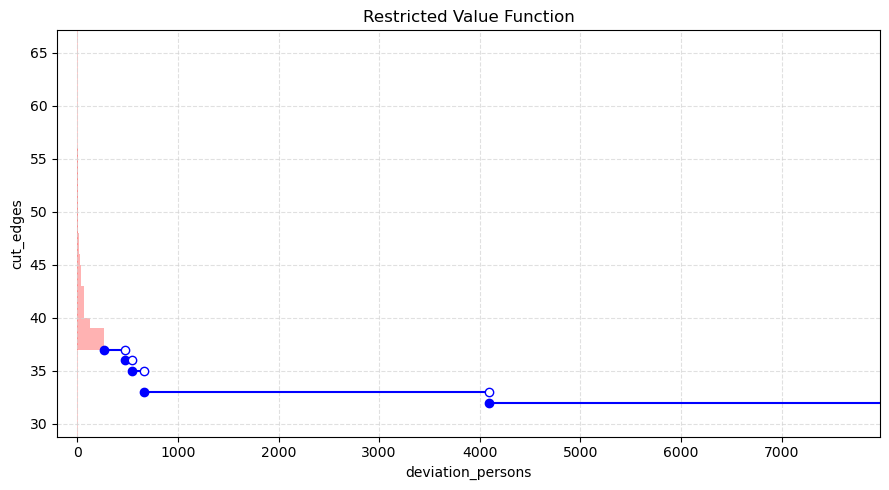

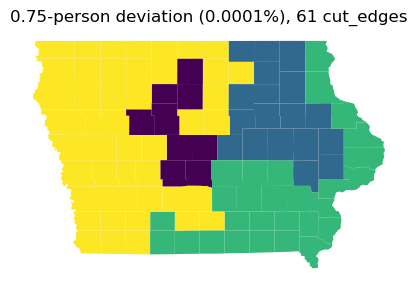

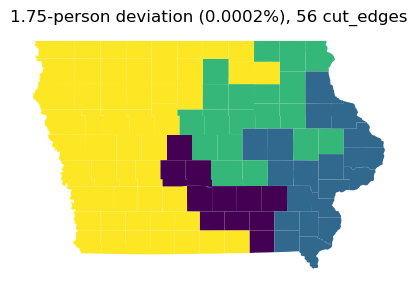

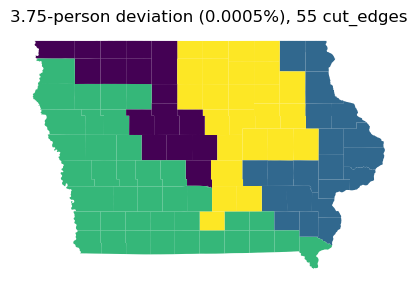

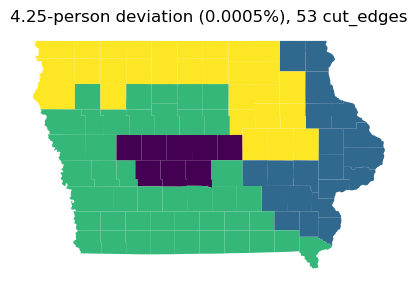

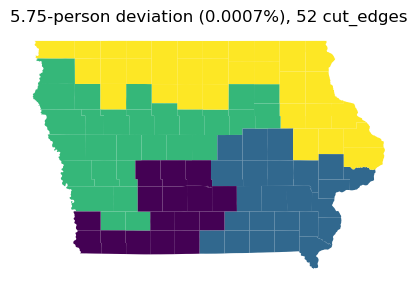

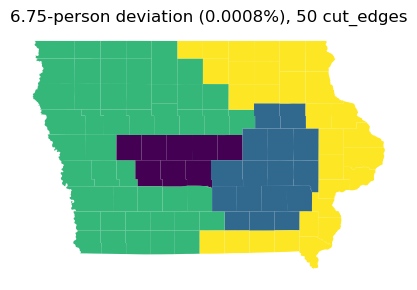

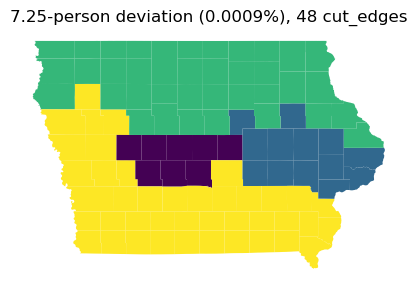

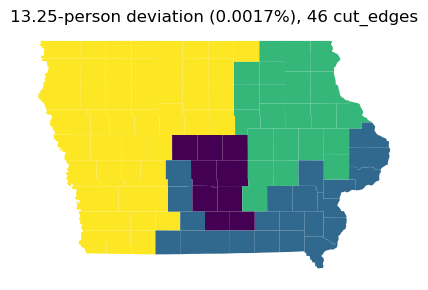

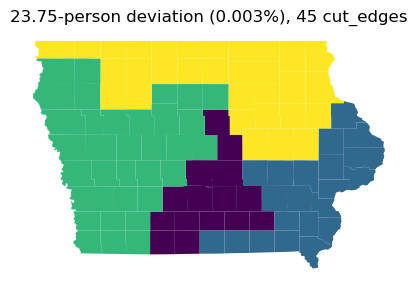

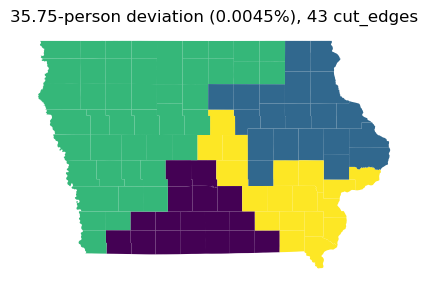

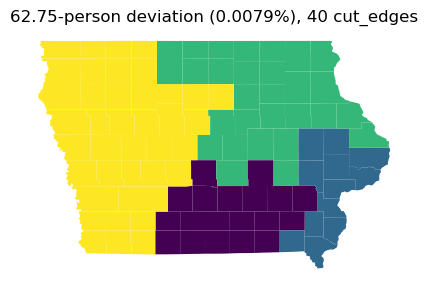

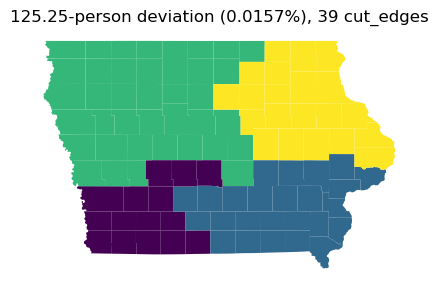

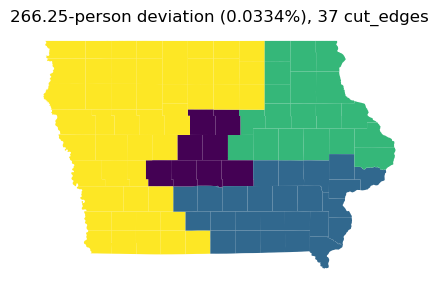

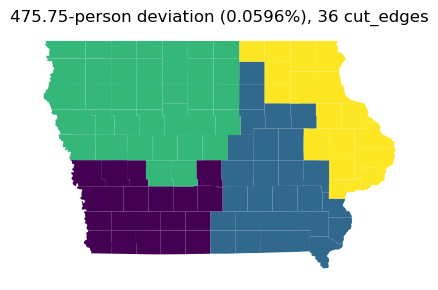

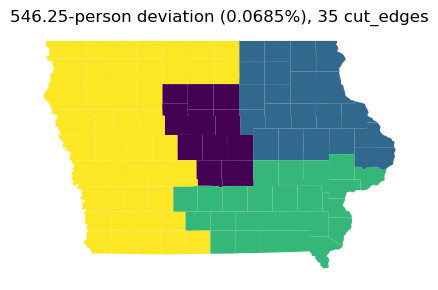

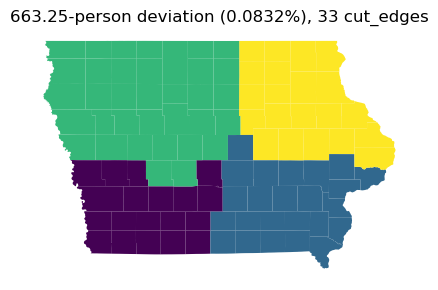

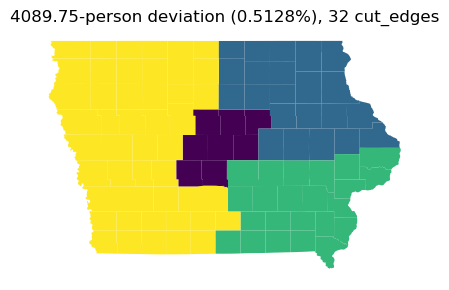

No feasible solution was found within the region: [0, 0.8]

####################################################################################################
Pareto Frontier for state IA,  objective perimeter
####################################################################################################

Pareto front plans: [[[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 6, 7, 10, 11, 15, 29, 34, 45, 51, 61, 69, 75, 77, 80, 85, 88, 98], [2, 3, 12, 18, 24, 25, 26, 28, 38, 39, 44, 46, 47, 54, 56, 60, 67, 71, 72, 82, 83, 86, 87, 90, 94, 95, 96, 97], [1, 9, 13, 14, 16, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 36, 37, 40, 41, 42, 48, 49, 50, 52, 53, 55, 57, 58, 59, 62, 63, 64, 65, 68, 70, 74, 76, 78, 79, 84, 89, 91, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [11, 24, 25, 26, 28, 39, 44, 45, 47, 54, 61, 67, 72, 82, 85, 87, 90, 97, 98], [4, 6, 7, 10, 15, 16, 18, 29, 34, 36, 49, 50, 51, 56, 69, 75, 77, 83, 88], [0, 1, 2, 5, 9, 13, 14, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 37,

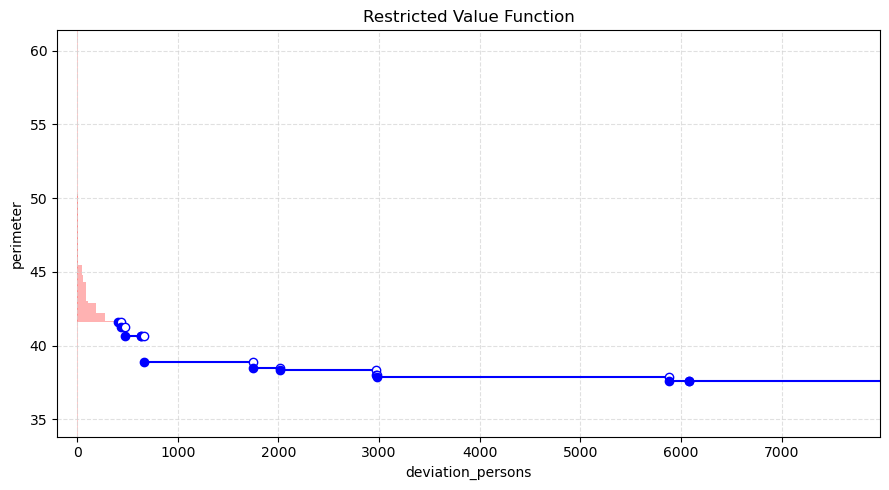

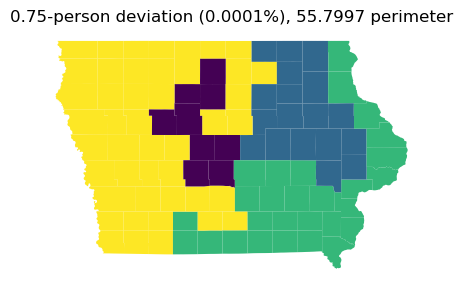

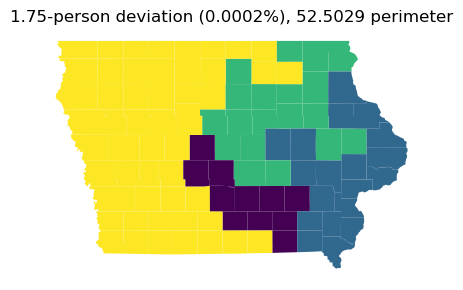

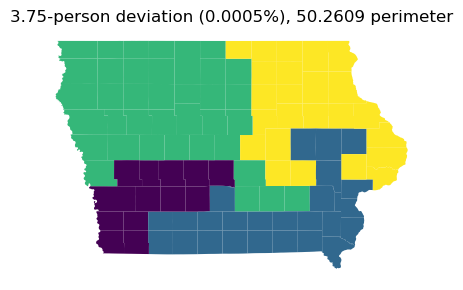

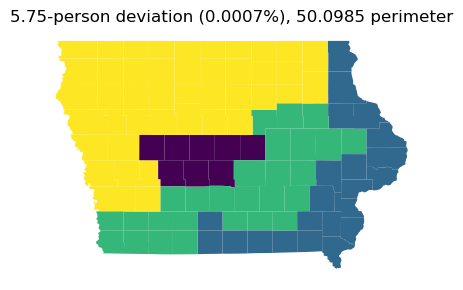

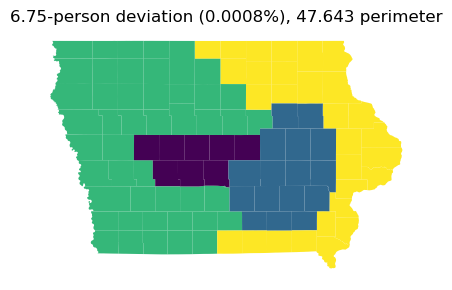

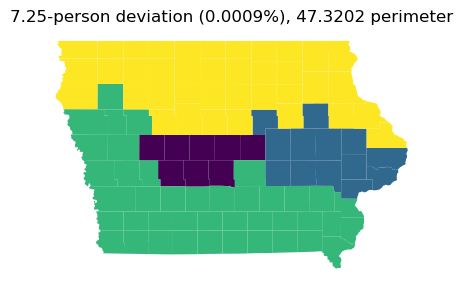

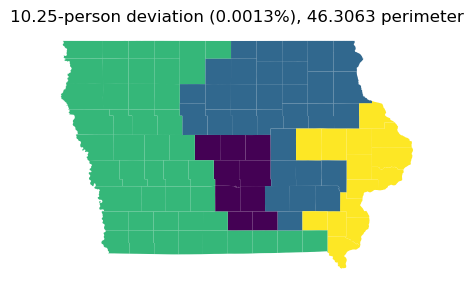

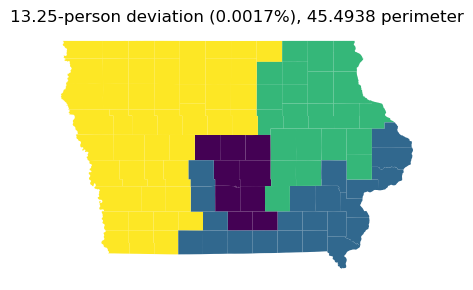

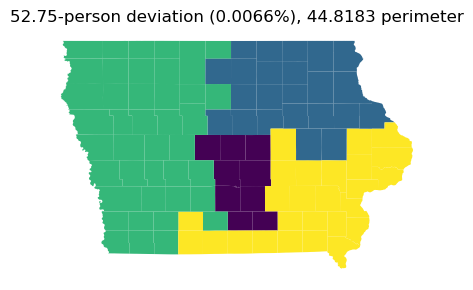

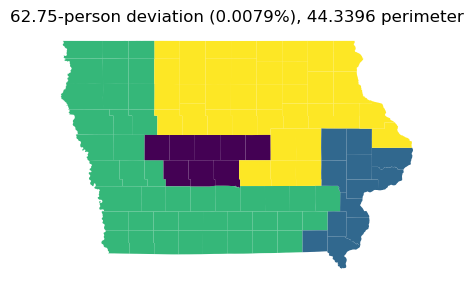

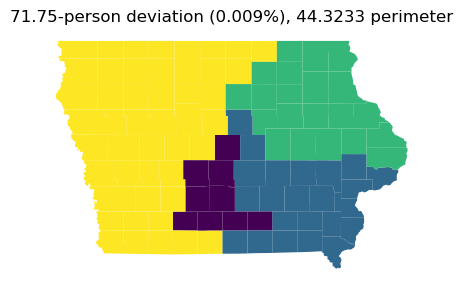

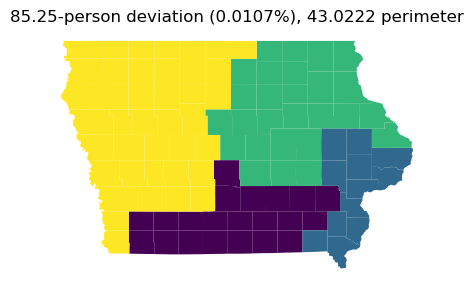

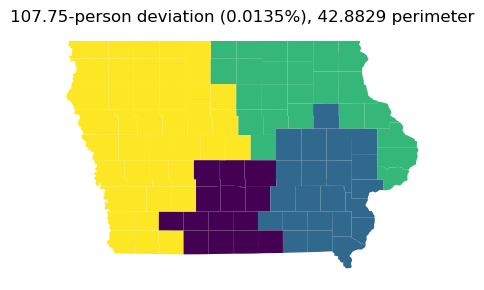

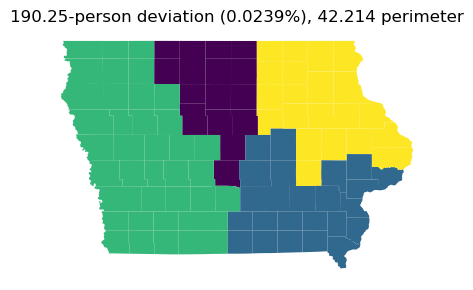

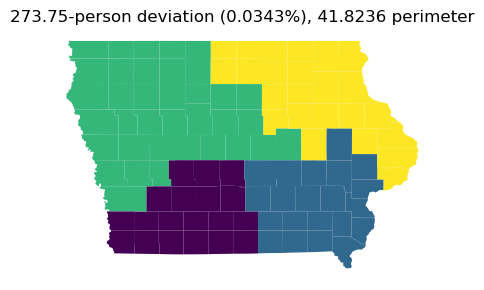

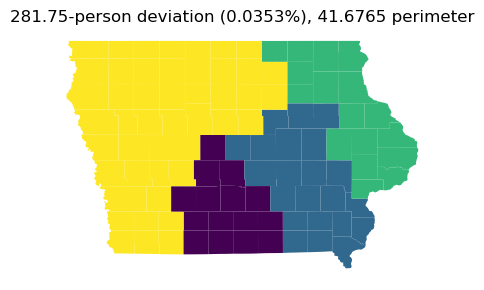

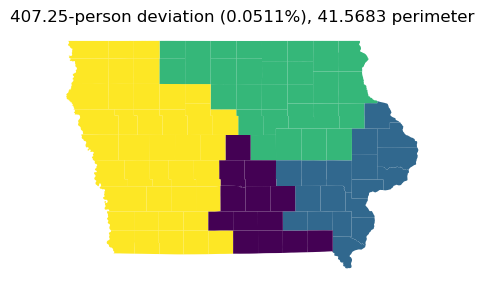

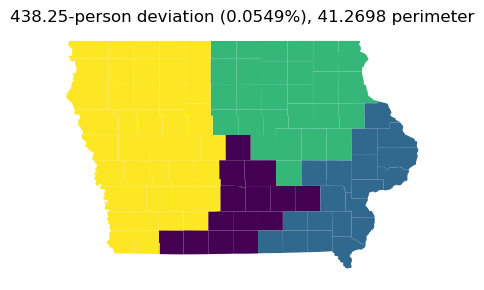

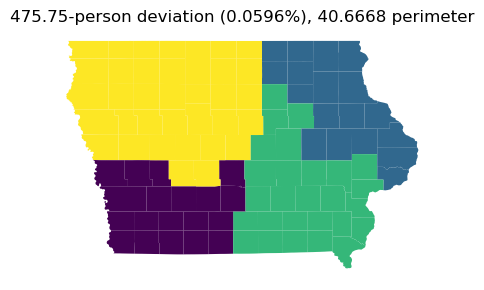

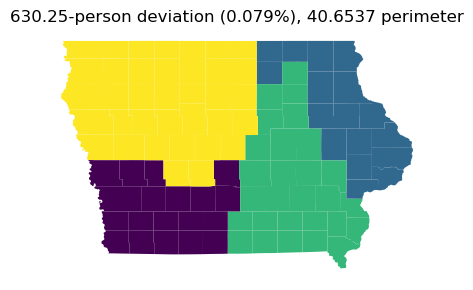

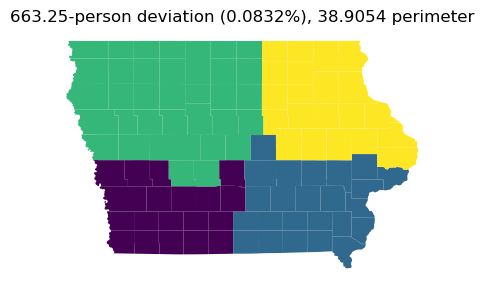

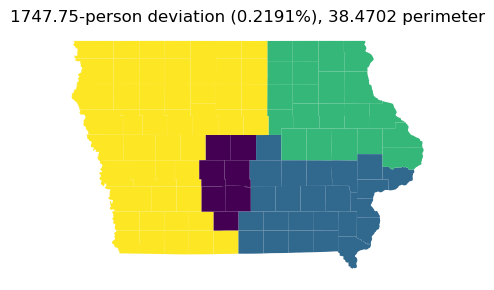

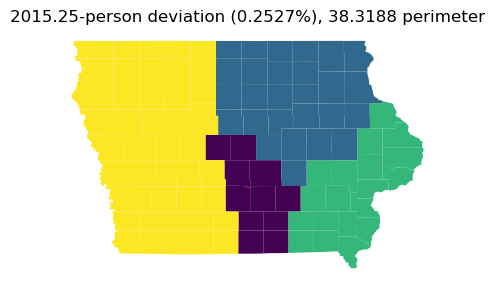

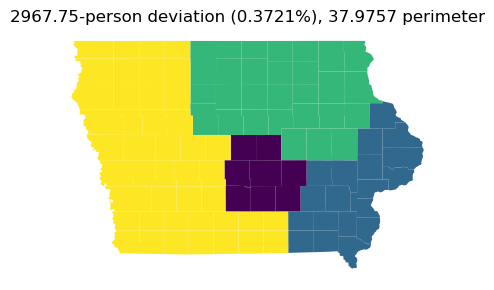

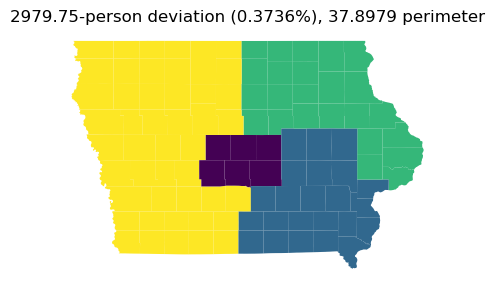

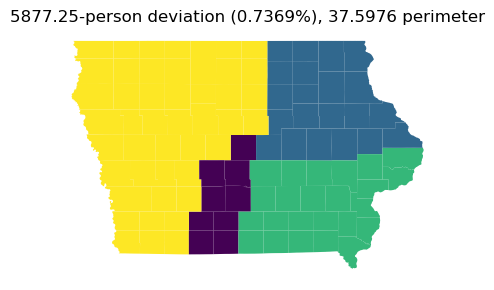

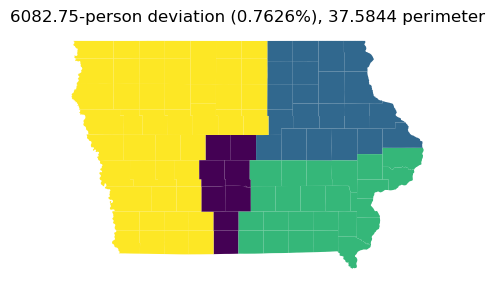

No feasible solution was found within the region: [0, 0.8]

####################################################################################################
Pareto Frontier for state IA,  objective inverse_Polsby_Popper
####################################################################################################

Pareto front plans: [[[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 6, 7, 10, 11, 15, 29, 34, 45, 51, 61, 69, 75, 77, 80, 85, 88, 98], [2, 3, 12, 18, 24, 25, 26, 28, 38, 39, 44, 46, 47, 54, 56, 60, 67, 71, 72, 82, 83, 86, 87, 90, 94, 95, 96, 97], [1, 9, 13, 14, 16, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 36, 37, 40, 41, 42, 48, 49, 50, 52, 53, 55, 57, 58, 59, 62, 63, 64, 65, 68, 70, 74, 76, 78, 79, 84, 89, 91, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [11, 24, 25, 26, 28, 39, 44, 45, 47, 54, 61, 67, 72, 82, 85, 87, 90, 97, 98], [4, 6, 7, 10, 15, 16, 18, 29, 34, 36, 49, 50, 51, 56, 69, 75, 77, 83, 88], [0, 1, 2, 5, 9, 13, 14, 19, 20, 21, 22, 23, 27, 30, 31, 32,

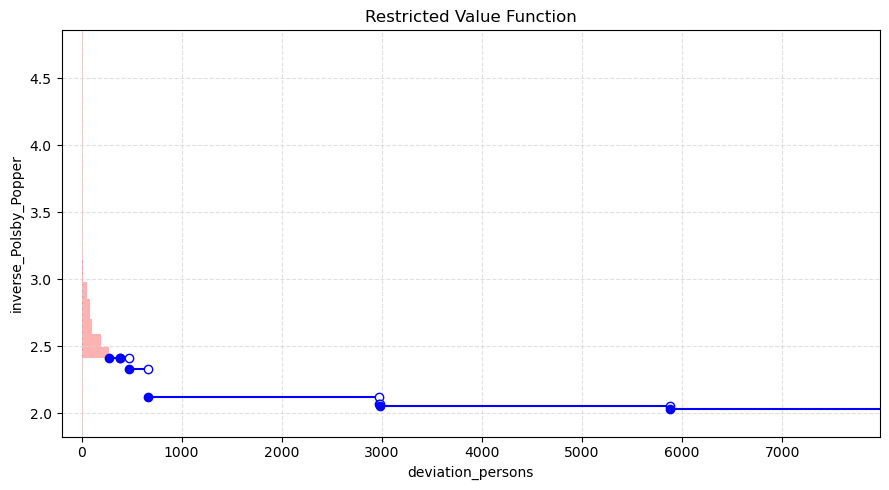

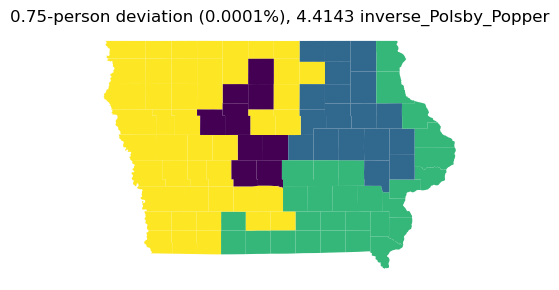

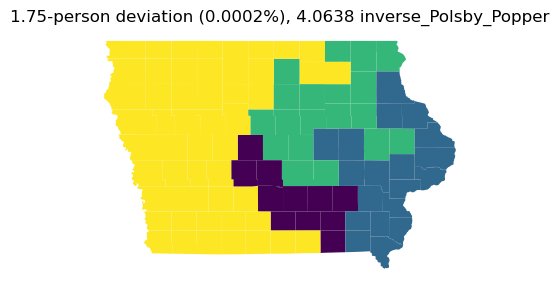

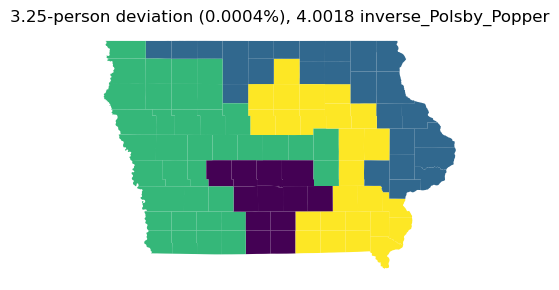

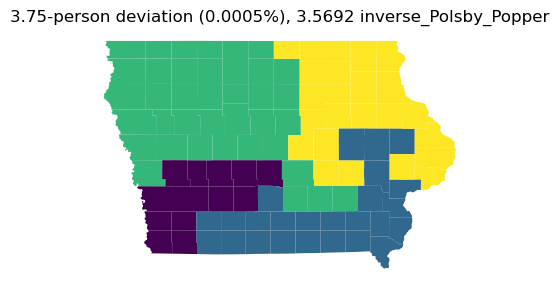

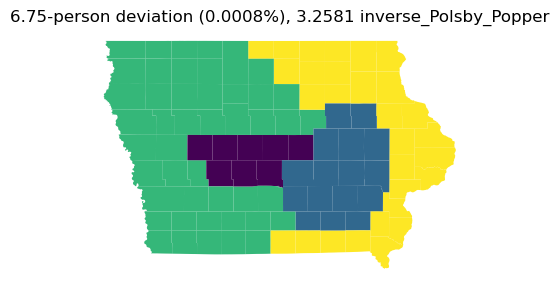

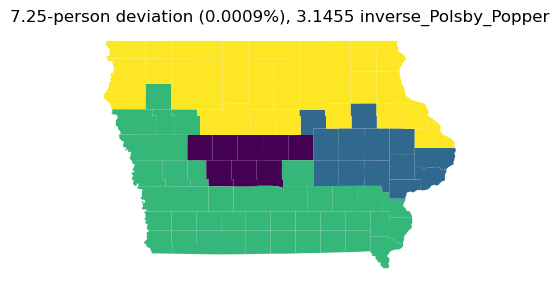

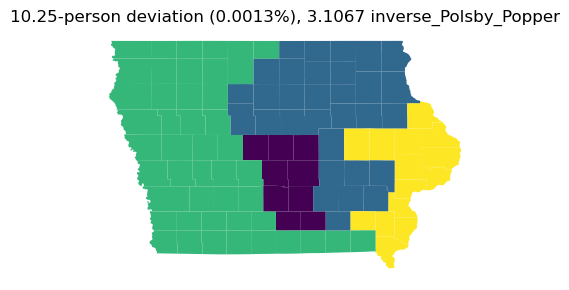

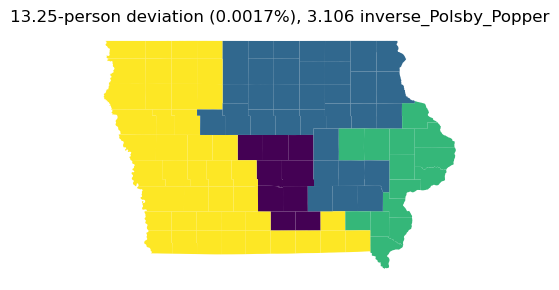

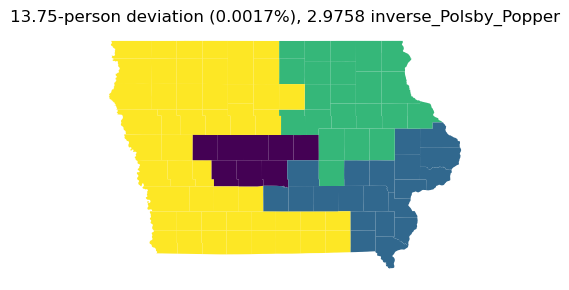

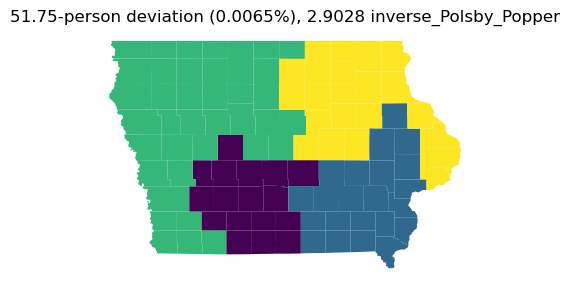

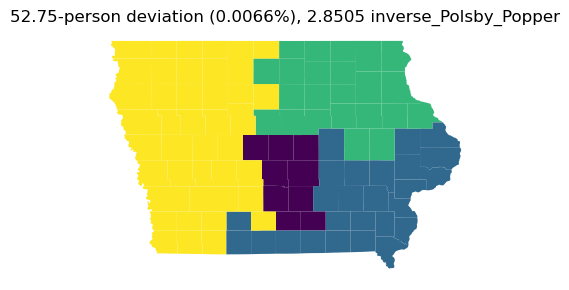

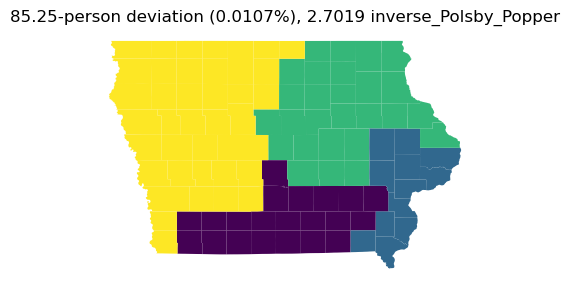

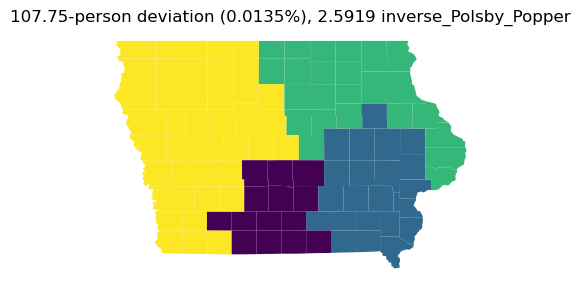

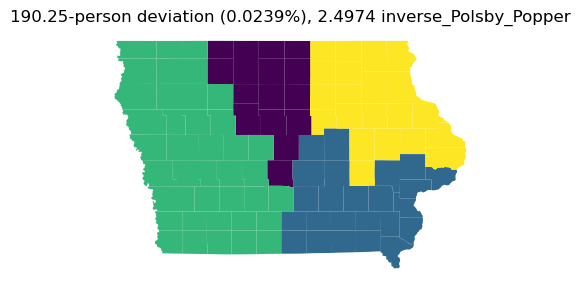

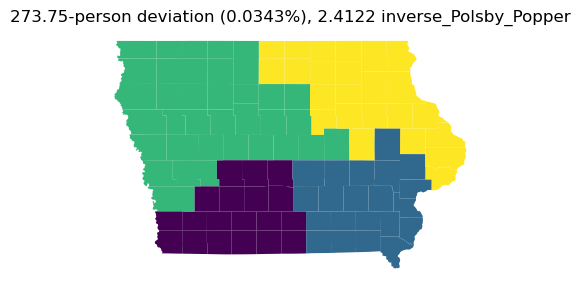

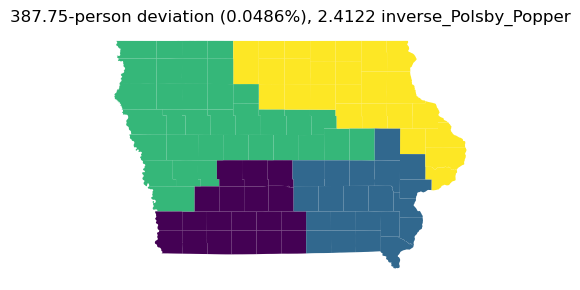

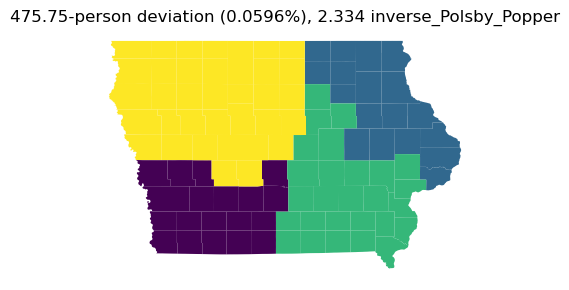

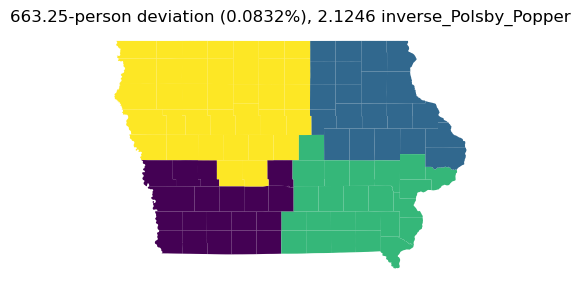

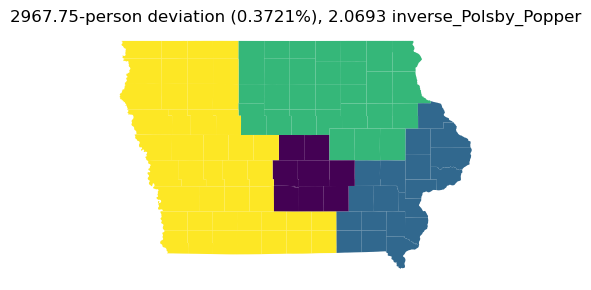

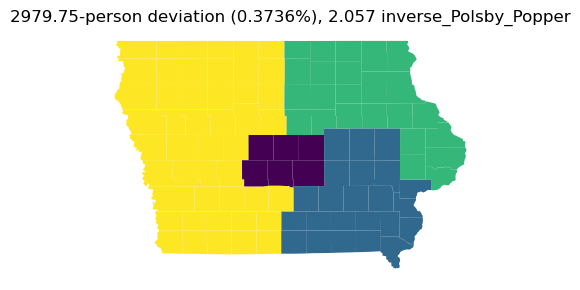

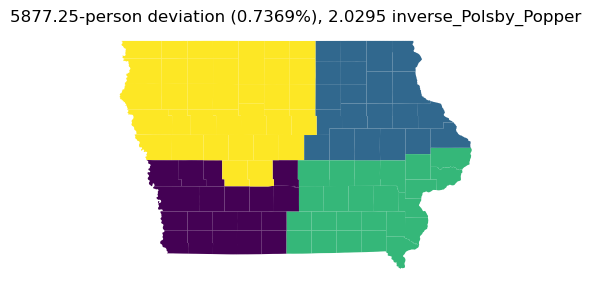

No feasible solution was found within the region: [0, 0.8]

####################################################################################################
Pareto Frontier for state IA,  objective average_Polsby_Popper
####################################################################################################

Pareto front plans: [[[8, 14, 17, 37, 43, 53, 62, 66, 68, 73, 78, 79, 93], [3, 11, 15, 26, 28, 38, 39, 45, 54, 67, 75, 83, 85, 88, 95, 97, 98], [5, 7, 13, 16, 24, 25, 29, 30, 34, 35, 36, 40, 44, 47, 50, 51, 56, 57, 61, 64, 69, 70, 72, 74, 77, 80, 81, 82, 87, 89, 90], [0, 1, 2, 4, 6, 9, 10, 12, 18, 19, 20, 21, 22, 23, 27, 31, 32, 33, 41, 42, 46, 48, 49, 52, 55, 58, 59, 60, 63, 65, 71, 76, 84, 86, 91, 92, 94, 96]], [[4, 8, 10, 17, 37, 53, 62, 93], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [5, 7, 13, 18, 24, 26, 29, 38, 39, 44, 45, 46, 48, 50, 56, 57, 67, 69, 72, 74, 75, 78, 80, 82, 83, 87, 90, 94, 95, 97], [0, 1, 2, 6, 9, 12, 14, 16, 19, 20, 21, 22, 23,

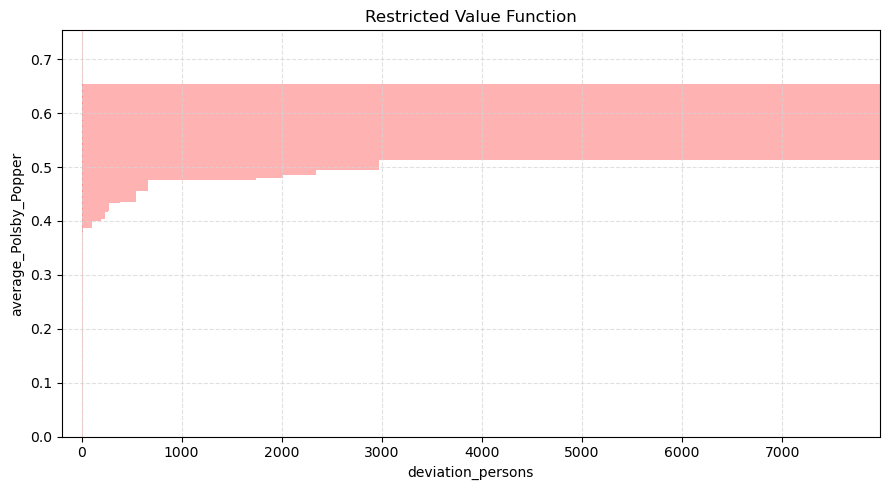

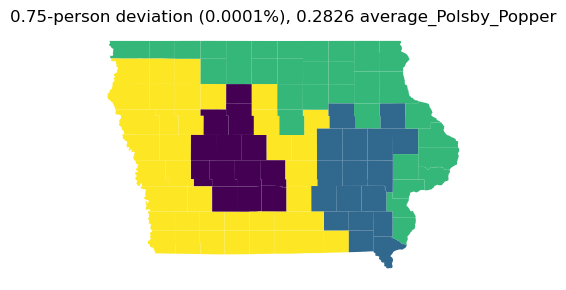

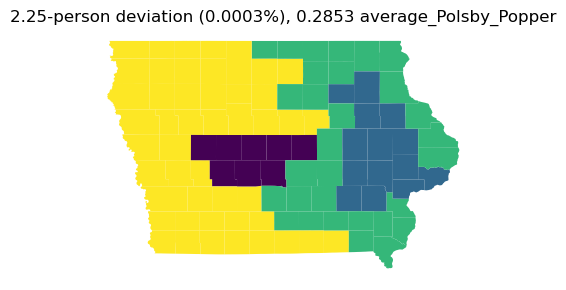

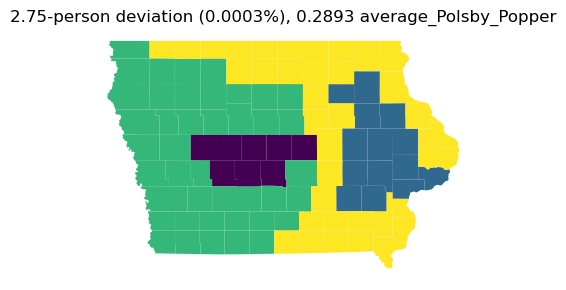

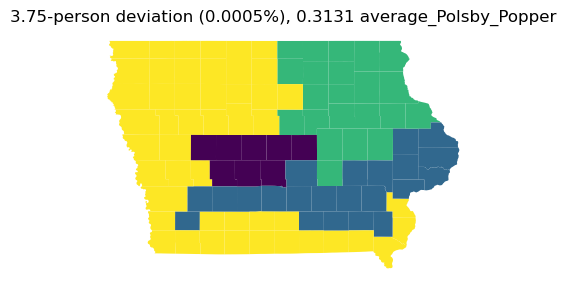

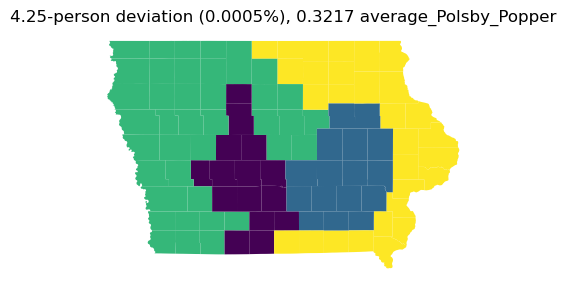

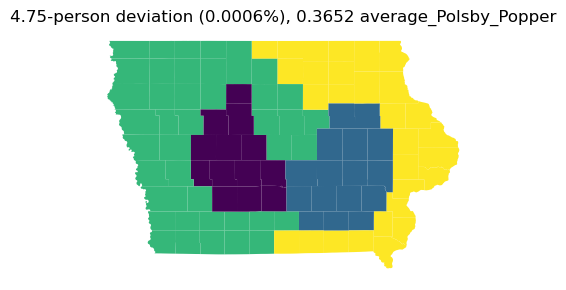

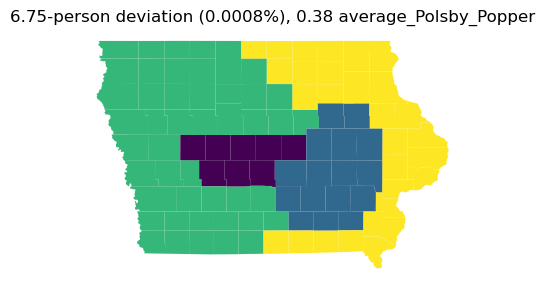

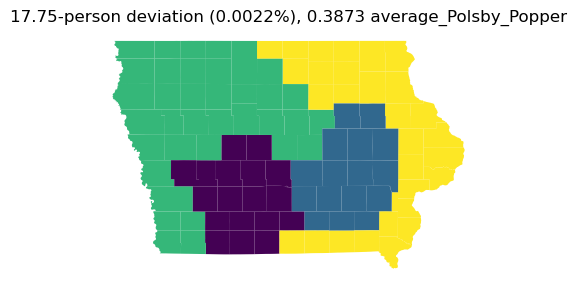

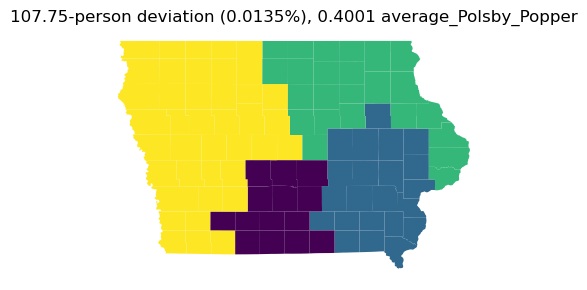

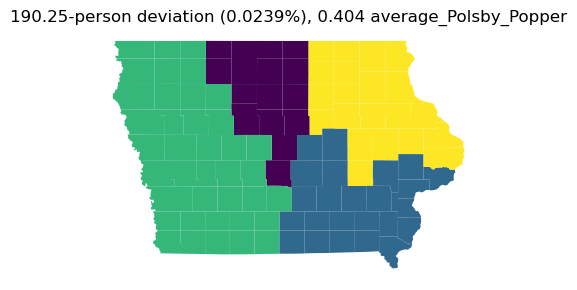

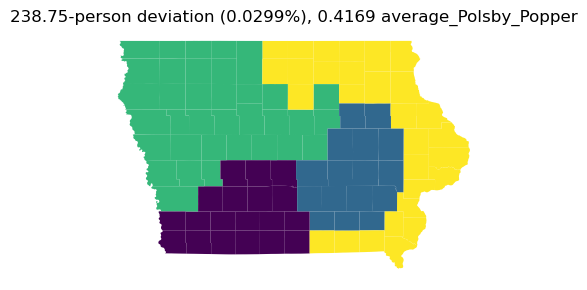

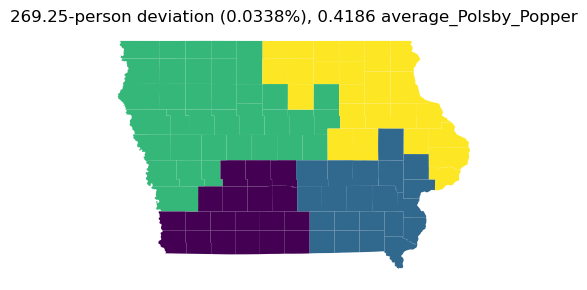

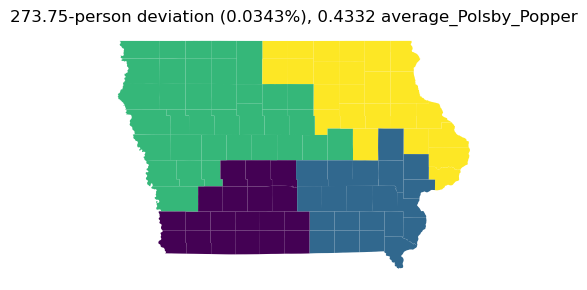

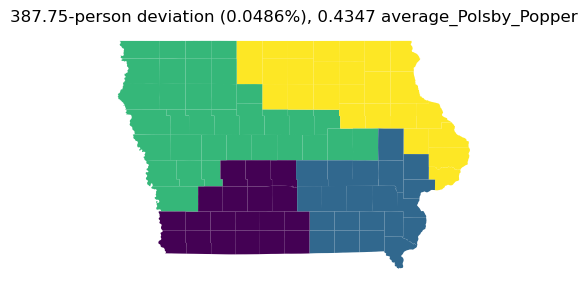

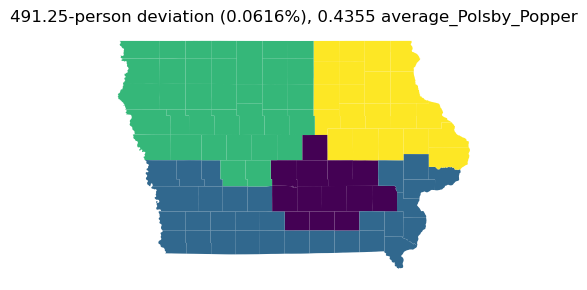

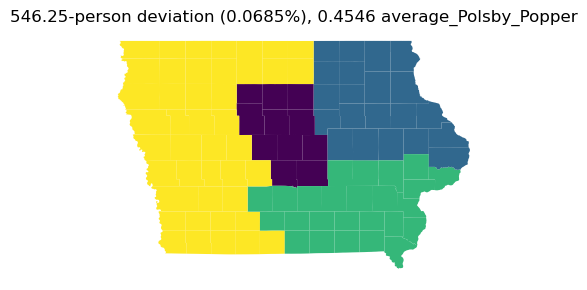

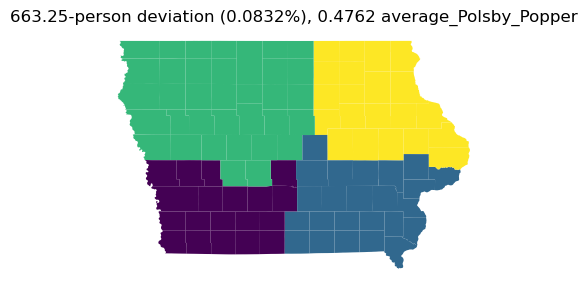

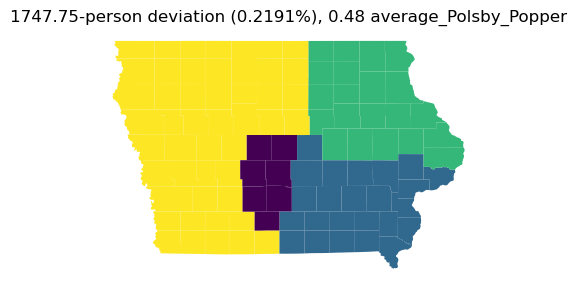

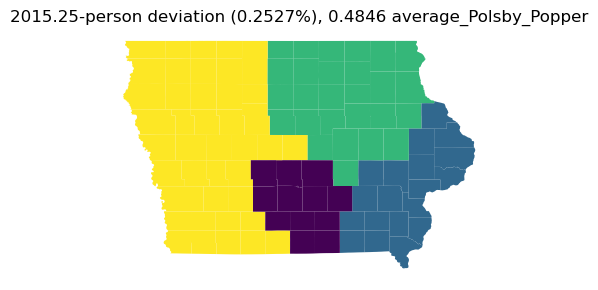

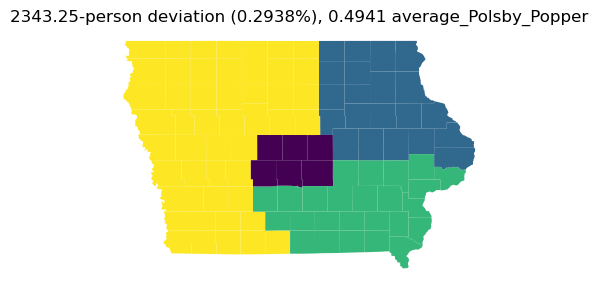

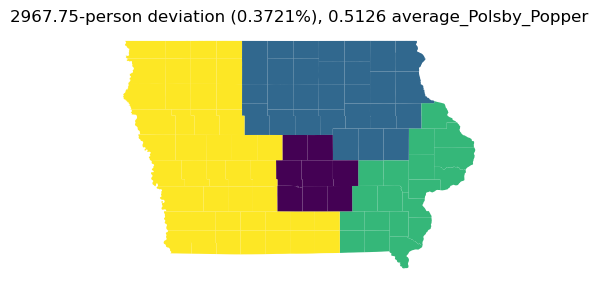

No feasible solution was found within the region: [0, 0.8]

####################################################################################################
Pareto Frontier for state IA,  objective bottleneck_Polsby_Popper
####################################################################################################

Pareto front plans: [[[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 5, 7, 11, 15, 25, 28, 34, 47, 51, 54, 56, 61, 69, 72, 74, 77, 80, 82, 87, 90, 98], [0, 1, 2, 4, 14, 16, 17, 18, 19, 20, 23, 31, 33, 35, 40, 41, 42, 43, 49, 52, 53, 55, 58, 59, 65, 66, 68, 79, 84, 93], [6, 9, 10, 13, 29, 30, 32, 36, 37, 38, 45, 50, 57, 62, 63, 64, 67, 70, 73, 75, 81, 83, 85, 88, 89, 91, 95]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [6, 9, 10, 13, 16, 29, 30, 32, 36, 38, 43, 45, 50, 57, 62, 63, 64, 67, 70, 73, 75, 81, 83, 85, 88, 91, 95], [3, 5, 7, 11, 15, 25, 28, 34, 47, 51, 54, 56, 61, 69, 72, 74, 77

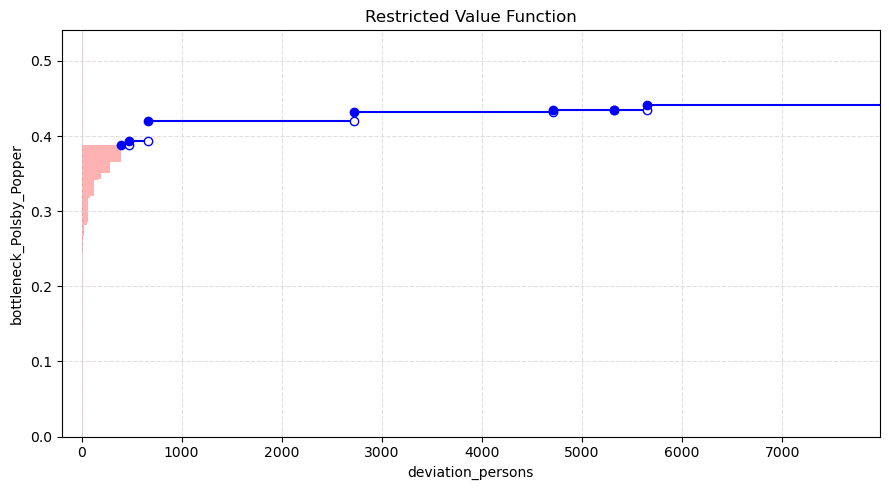

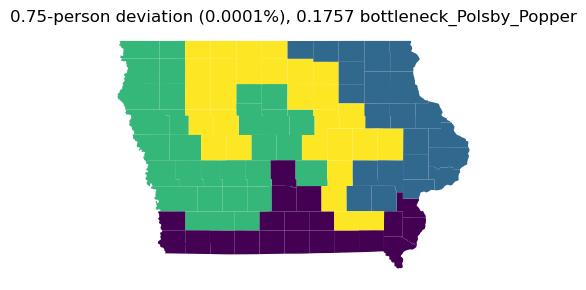

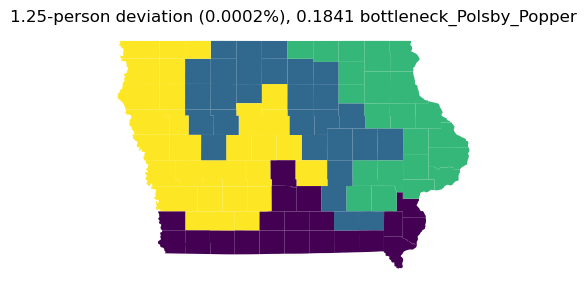

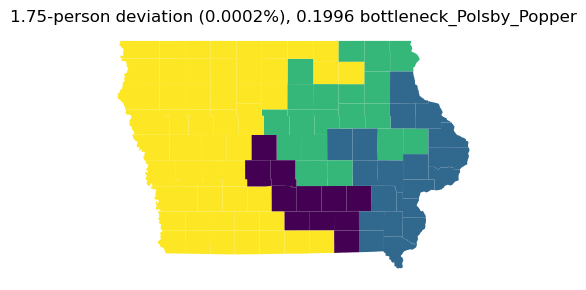

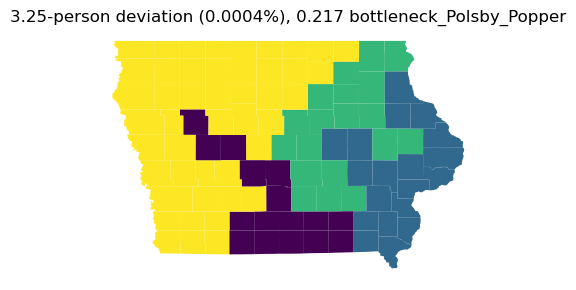

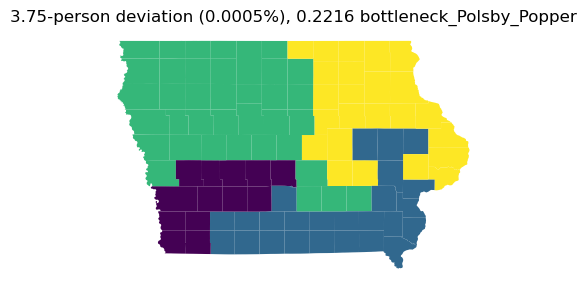

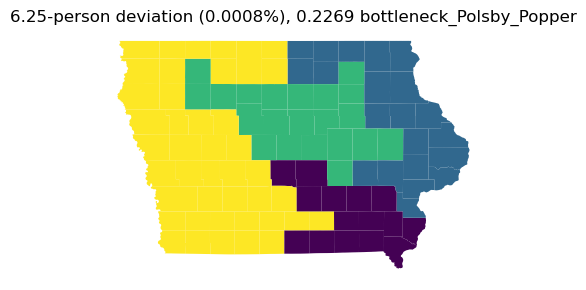

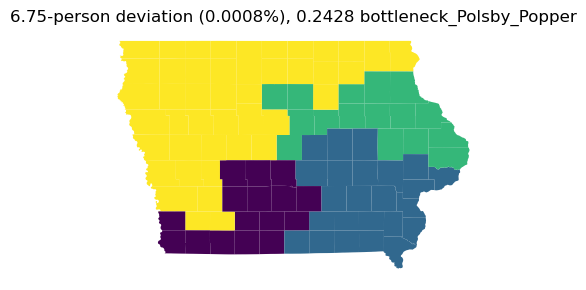

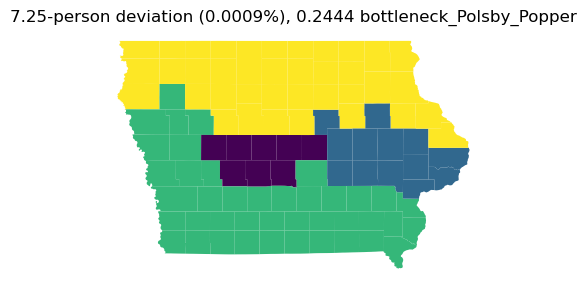

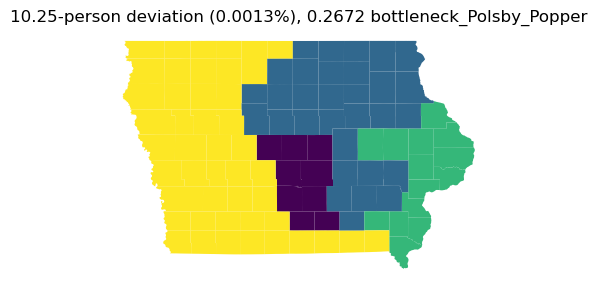

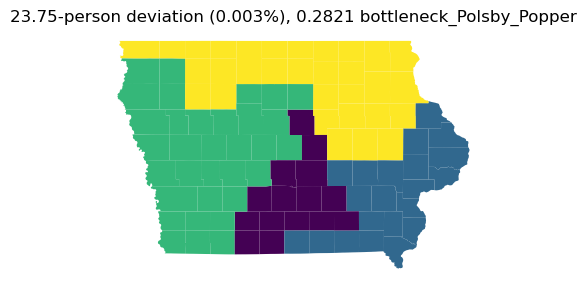

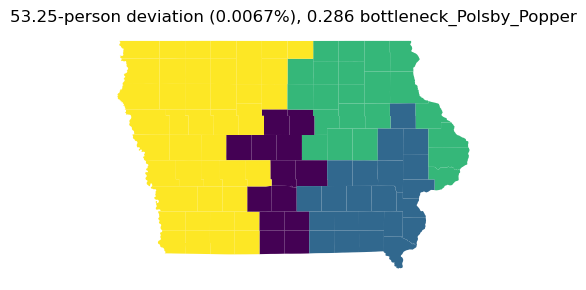

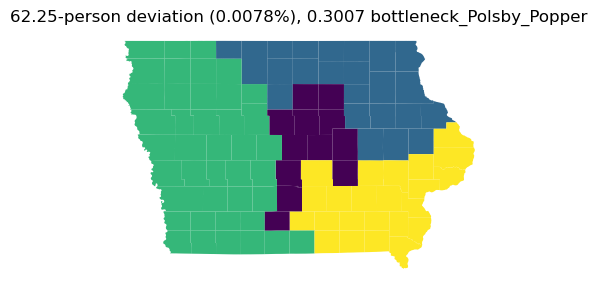

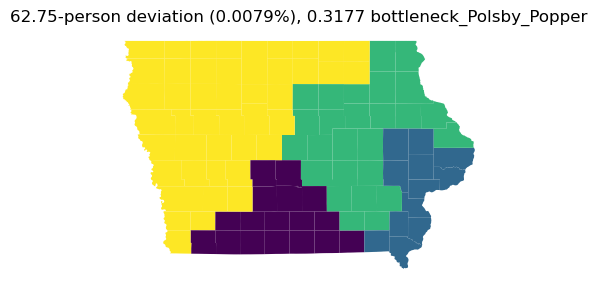

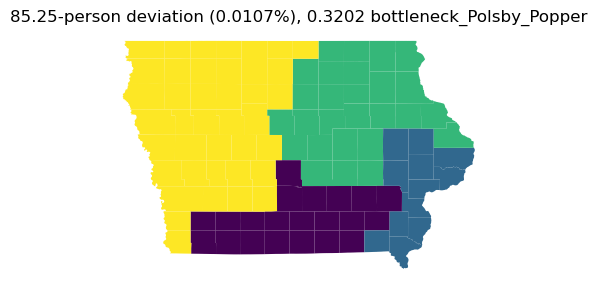

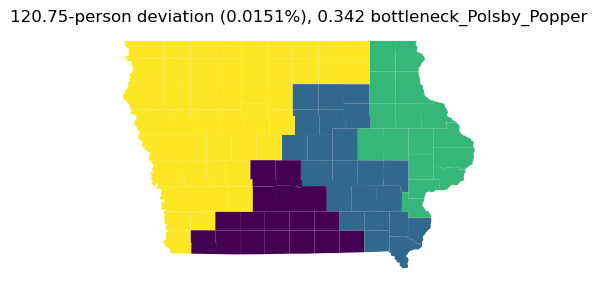

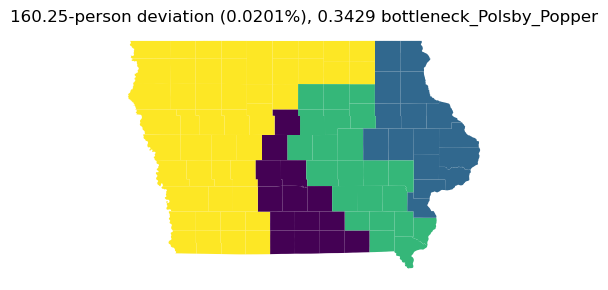

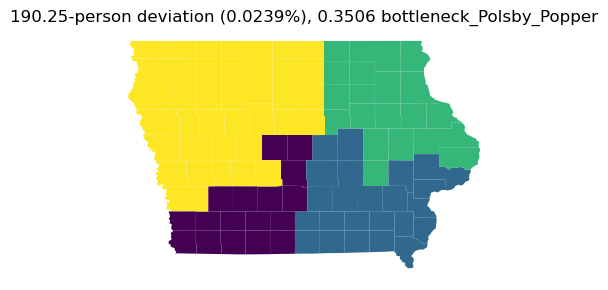

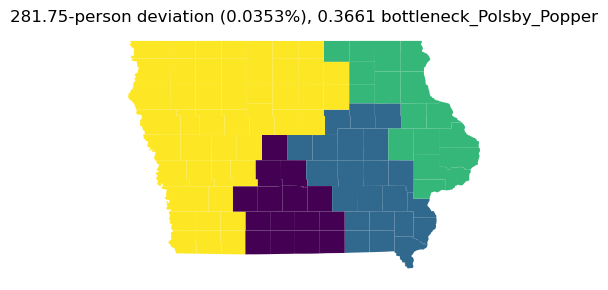

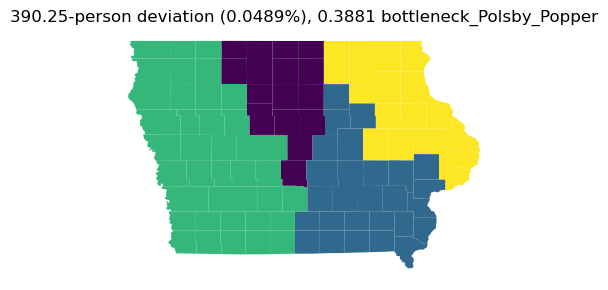

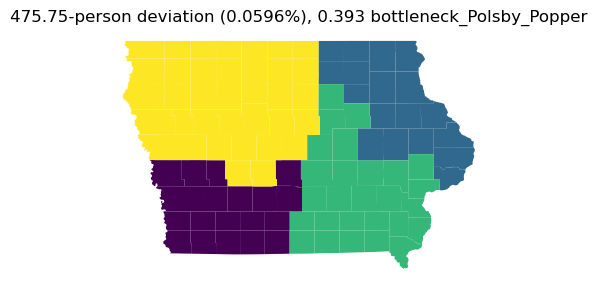

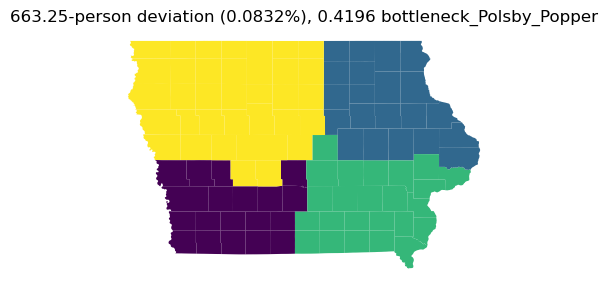

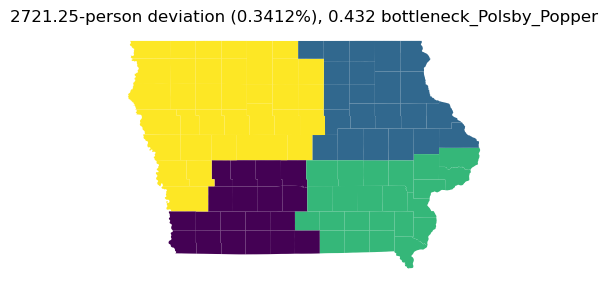

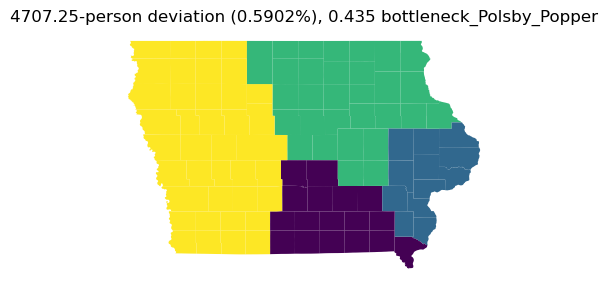

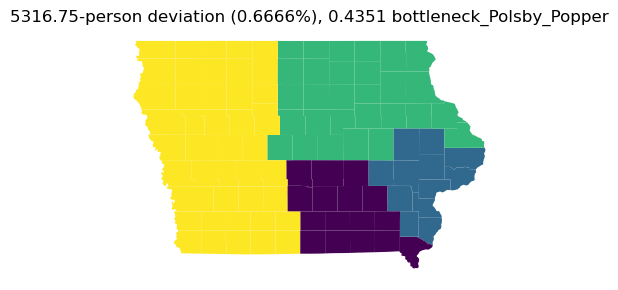

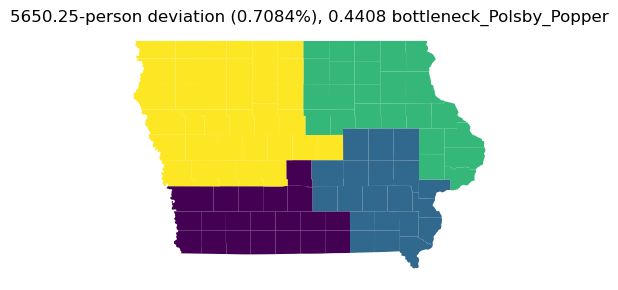

In [7]:
from pareto import plot_pareto_frontiers

epsilon = 1 / (2 * G._k)
for (state, obj_type), result in plans_dict.items():
    
    min_deviation = min(round(r[2], 1) for r in result)
    if min_deviation < epsilon:
        no_solution_region = None
    else:
        no_solution_region = [0, min_deviation]
        print(f"No feasible solution was found within the region: {no_solution_region}")
        
    plot_pareto_frontiers(
                    G,
                    method='epsilon_constraint_method',
                    plans=None,                                   #if method ='epsilon_constraint_method' is None 
                    obj_types=obj_type,                               
                    ideal_population=G._ideal_population,
                    state=state,
                    filepath=filepath,
                    filename2=filename2,
                    no_solution_region=no_solution_region,
                    year=year,
                    result=result                               #if method ='heuristic' is None 
                 )